# MuSe数据集分析 (MuSe Dataset Analysis)

**目标 (Objectives)：**
1. 加载和探索MuSe数据集 (Load and explore MuSe dataset)
2. 分析V-A-D三维标注分布 (Analyze V-A-D 3D annotation distribution)
3. 统计流派和标签信息 (Statistics on genres and tags)
4. 与DEAM数据集对比 (Compare with DEAM dataset)

**日期 (Date)：** 2025年12月XX日  
**数据文件 (Data File)：** `../data/MuSe/muse_v3.csv`


## 1. 导入库和设置 (Import Libraries and Setup)


In [ ]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import ast
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体 (Set Chinese font)
import matplotlib
import platform

# 根据操作系统设置字体 (Set font based on operating system)
if platform.system() == 'Windows':
    # Windows系统字体 (Windows fonts)
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'SimSun', 'KaiTi', 'FangSong', 'Arial Unicode MS']
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'STHeiti', 'Heiti TC']
else:  # Linux
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei', 'Noto Sans CJK SC']

plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题 (Fix minus sign display)

# 测试字体是否可用 (Test if font is available)
try:
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.text(0.5, 0.5, '测试', fontsize=12)
    plt.close(fig)
    print("✅ 中文字体设置成功 (Chinese font configured successfully)")
except:
    print("⚠️ 中文字体可能不可用，将使用英文标题 (Chinese font may not be available, will use English titles)")

# 设置绘图风格 (Set plotting style)
plt.style.use('default')
sns.set_palette("husl")

# 设置随机种子 (Set random seed)
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ 库导入成功！(Libraries imported successfully!)")
print(f"📍 随机种子 (Random seed): {RANDOM_STATE}")


✅ 中文字体设置成功 (Chinese font configured successfully)
✅ 库导入成功！(Libraries imported successfully!)
📍 随机种子 (Random seed): 42


## 2. 加载数据 (Load Data)


In [ ]:
# 设置路径 (Set path)
DATA_FILE = Path('../data/MuSe/muse_v3.csv')

print("=" * 70)
print("📊 加载MuSe数据集 (Loading MuSe Dataset)")
print("=" * 70)

# 加载数据 (Load data)
df = pd.read_csv(DATA_FILE)

print(f"\n✅ 数据加载成功! (Data loaded successfully!)")
print(f"   总行数 (Total rows): {len(df):,}")
print(f"   总列数 (Total columns): {len(df.columns)}")
print(f"\n列名 (Column names): {df.columns.tolist()}")

# 显示前几行 (Display first few rows)
print("\n前5行数据 (First 5 rows):")
df.head()


📊 加载MuSe数据集 (Loading MuSe Dataset)

✅ 数据加载成功! (Data loaded successfully!)
   总行数 (Total rows): 90,001
   总列数 (Total columns): 11

列名 (Column names): ['lastfm_url', 'track', 'artist', 'seeds', 'number_of_emotion_tags', 'valence_tags', 'arousal_tags', 'dominance_tags', 'mbid', 'spotify_id', 'genre']

前5行数据 (First 5 rows):


,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal


## 3. 数据基本信息 (Basic Data Information)


In [ ]:
print("=" * 70)
print("📋 数据基本信息 (Basic Data Information)")
print("=" * 70)

print(f"\n数据形状 (Data shape): {df.shape}")
print(f"\n数据类型 (Data types):")
print(df.dtypes)

print(f"\n缺失值统计 (Missing values statistics):")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    '缺失数量 (Missing count)': missing,
    '缺失百分比 (Missing percentage)': missing_pct
})
missing_df = missing_df[missing_df['缺失数量 (Missing count)'] > 0]
if len(missing_df) > 0:
    print(missing_df)
else:
    print("   ✅ 无缺失值 (No missing values)")

# 检查重复记录 (Check duplicate records)
duplicates = df.duplicated(subset=['track', 'artist']).sum()
print(f"\n重复记录 (track+artist) (Duplicate records): {duplicates}")


📋 数据基本信息 (Basic Data Information)

数据形状 (Data shape): (90001, 11)

数据类型 (Data types):
lastfm_url                 object
track                      object
artist                     object
seeds                      object
number_of_emotion_tags      int64
valence_tags              float64
arousal_tags              float64
dominance_tags            float64
mbid                       object
spotify_id                 object
genre                      object
dtype: object

缺失值统计 (Missing values statistics):
            缺失数量 (Missing count)  缺失百分比 (Missing percentage)
mbid                       28784                       31.98
spotify_id                 28371                       31.52
genre                       6639                        7.38

重复记录 (track+artist) (Duplicate records): 0


## 4. V-A-D三维标注分析 (V-A-D 3D Annotation Analysis)


In [ ]:
print("=" * 70)
print("📊 V-A-D三维标注分析 (V-A-D 3D Annotation Analysis)")
print("=" * 70)

# 分析每个维度 (Analyze each dimension)
for col in ['valence_tags', 'arousal_tags', 'dominance_tags']:
    print(f"\n{col.upper()}:")
    print(f"  范围 (Range): [{df[col].min():.2f}, {df[col].max():.2f}]")
    print(f"  均值 (Mean): {df[col].mean():.2f}")
    print(f"  标准差 (Std): {df[col].std():.2f}")
    print(f"  中位数 (Median): {df[col].median():.2f}")
    print(f"  缺失值 (Missing): {df[col].isnull().sum()}")


📊 V-A-D三维标注分析 (V-A-D 3D Annotation Analysis)

VALENCE_TAGS:
  范围 (Range): [0.23, 8.47]
  均值 (Mean): 5.45
  标准差 (Std): 1.55
  中位数 (Median): 5.65
  缺失值 (Missing): 0

AROUSAL_TAGS:
  范围 (Range): [0.11, 7.27]
  均值 (Mean): 4.32
  标准差 (Std): 1.15
  中位数 (Median): 4.33
  缺失值 (Missing): 0

DOMINANCE_TAGS:
  范围 (Range): [0.23, 7.44]
  均值 (Mean): 5.25
  标准差 (Std): 1.17
  中位数 (Median): 5.46
  缺失值 (Missing): 0


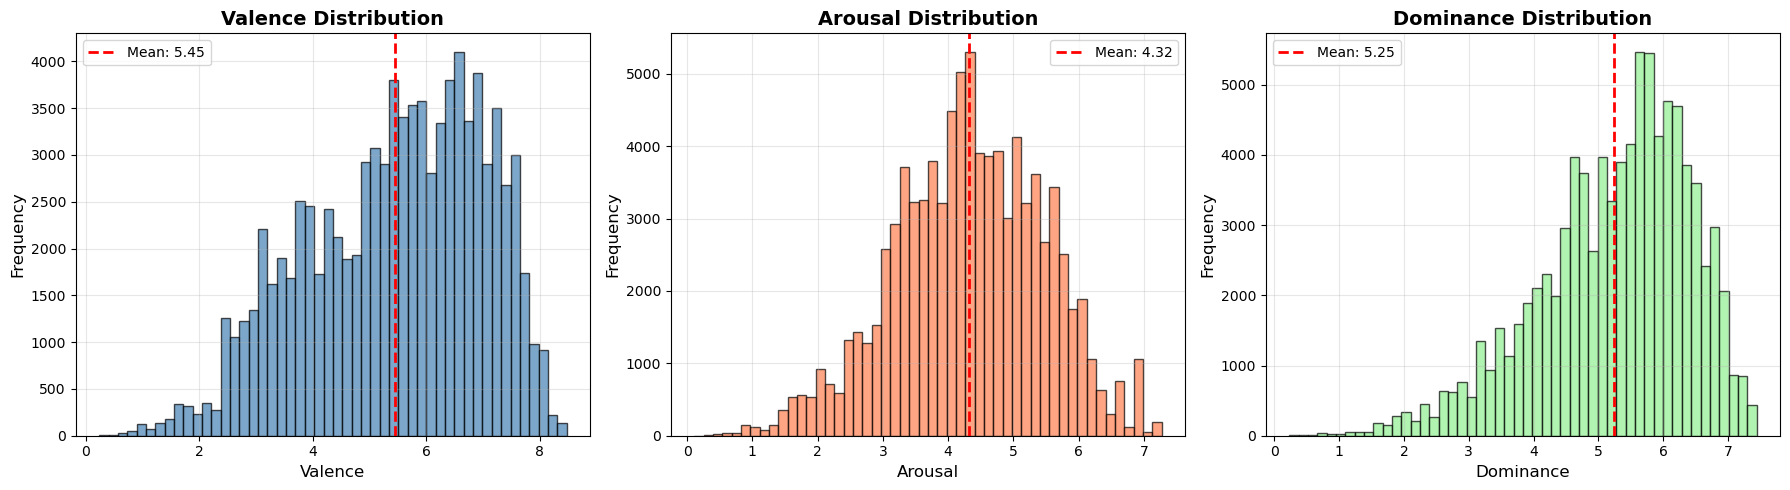

✅ V-A-D分布可视化完成！(V-A-D distribution visualization completed!)


In [ ]:
# 可视化V-A-D分布 (Visualize V-A-D distribution)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df['valence_tags'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].axvline(df['valence_tags'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["valence_tags"].mean():.2f}')
axes[0].set_xlabel('Valence', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Valence Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist(df['arousal_tags'], bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[1].axvline(df['arousal_tags'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["arousal_tags"].mean():.2f}')
axes[1].set_xlabel('Arousal', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Arousal Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

axes[2].hist(df['dominance_tags'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[2].axvline(df['dominance_tags'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["dominance_tags"].mean():.2f}')
axes[2].set_xlabel('Dominance', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Dominance Distribution', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ V-A-D分布可视化完成！(V-A-D distribution visualization completed!)")


## 5. V-A-D相关性分析 (V-A-D Correlation Analysis)


🔗 V-A-D相关性矩阵 (V-A-D Correlation Matrix)
                valence_tags  arousal_tags  dominance_tags
valence_tags        1.000000      0.405396        0.861876
arousal_tags        0.405396      1.000000        0.469441
dominance_tags      0.861876      0.469441        1.000000


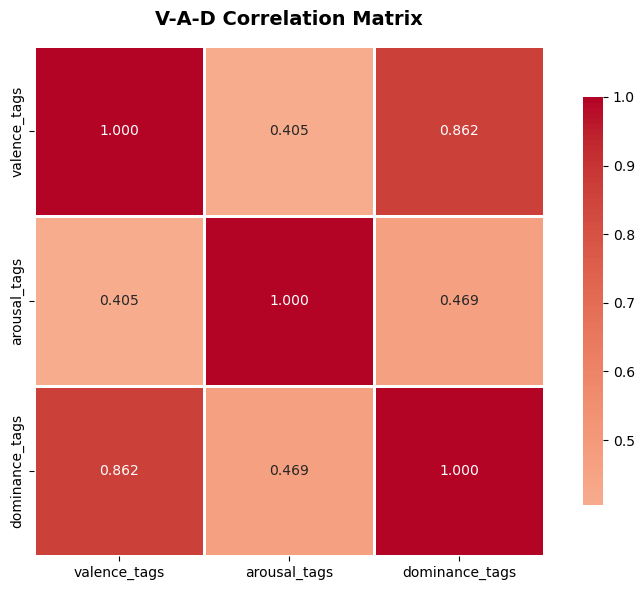


💡 解读 (Interpretation):
  • 相关系数接近1: 强正相关（一个高，另一个也高）(Correlation close to 1: Strong positive correlation)
  • 相关系数接近-1: 强负相关（一个高，另一个低）(Correlation close to -1: Strong negative correlation)
  • 相关系数接近0: 几乎无关 (Correlation close to 0: Almost independent)


In [ ]:
# 计算V-A-D相关性 (Calculate V-A-D correlations)
vad_cols = ['valence_tags', 'arousal_tags', 'dominance_tags']
corr_matrix = df[vad_cols].corr()

print("=" * 70)
print("🔗 V-A-D相关性矩阵 (V-A-D Correlation Matrix)")
print("=" * 70)
print(corr_matrix)

# 可视化相关性 (Visualize correlations)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('V-A-D Correlation Matrix', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

print("\n💡 解读 (Interpretation):")
print("  • 相关系数接近1: 强正相关（一个高，另一个也高）(Correlation close to 1: Strong positive correlation)")
print("  • 相关系数接近-1: 强负相关（一个高，另一个低）(Correlation close to -1: Strong negative correlation)")
print("  • 相关系数接近0: 几乎无关 (Correlation close to 0: Almost independent)")


## 6. 采样2000首歌曲 ⭐ (Sample 2000 Songs)

**目的 (Purpose)：** 从90,002首歌曲中随机采样2,000首，用于快速验证和特征提取 (Randomly sample 2,000 songs from 90,002 songs for quick validation and feature extraction)


In [ ]:
# 采样2000首歌曲 (Sample 2000 songs)
SAMPLE_SIZE = 2000

print("=" * 70)
print(f"🎲 采样 {SAMPLE_SIZE} 首歌曲 (Sampling {SAMPLE_SIZE} songs)")
print("=" * 70)

# 随机采样 (Random sampling)
df_sampled = df.sample(n=SAMPLE_SIZE, random_state=RANDOM_STATE).reset_index(drop=True)

print(f"\n✅ 采样完成! (Sampling completed!)")
print(f"   原始数据 (Original data): {len(df):,} 首 (songs)")
print(f"   采样后 (After sampling): {len(df_sampled):,} 首 (songs)")
print(f"   采样比例 (Sampling ratio): {len(df_sampled)/len(df)*100:.2f}%")

# 保存采样后的数据 (Save sampled data)
OUTPUT_DIR = Path('../data/MuSe/processed')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

output_file = OUTPUT_DIR / f'muse_sampled_{SAMPLE_SIZE}.csv'
df_sampled.to_csv(output_file, index=False)

print(f"\n💾 采样数据已保存 (Sampled data saved):")
print(f"   {output_file}")

# 显示采样后的数据统计 (Display statistics of sampled data)
print(f"\n📊 采样后的V-A-D统计 (V-A-D statistics after sampling):")
print(df_sampled[['valence_tags', 'arousal_tags', 'dominance_tags']].describe())


🎲 采样 2000 首歌曲 (Sampling 2000 songs)

✅ 采样完成! (Sampling completed!)
   原始数据 (Original data): 90,001 首 (songs)
   采样后 (After sampling): 2,000 首 (songs)
   采样比例 (Sampling ratio): 2.22%

💾 采样数据已保存 (Sampled data saved):
   ..\data\MuSe\processed\muse_sampled_2000.csv

📊 采样后的V-A-D统计 (V-A-D statistics after sampling):
       valence_tags  arousal_tags  dominance_tags
count   2000.000000   2000.000000     2000.000000
mean       5.413732      4.291717        5.215467
std        1.565692      1.160652        1.197328
min        0.639737      0.688416        0.677368
25%        4.179875      3.505833        4.500000
50%        5.616910      4.290000        5.452500
75%        6.714000      5.140313        6.117633
max        8.470000      7.270000        7.440000


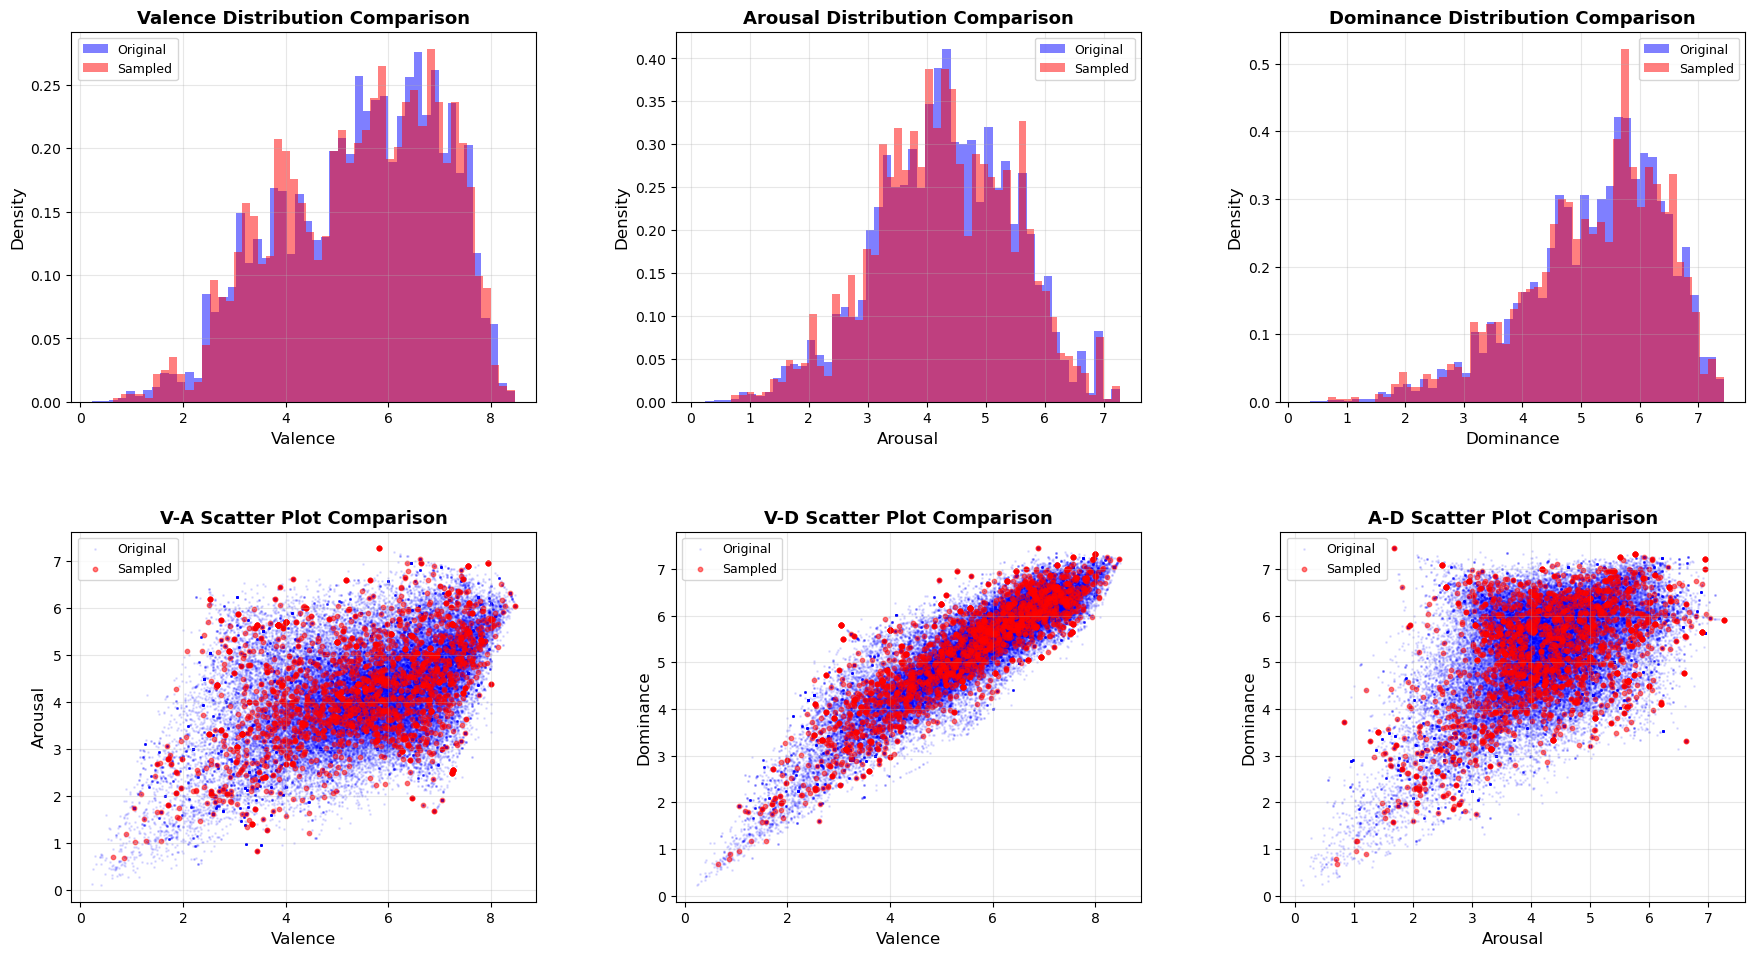

✅ 采样前后分布对比完成！(Distribution comparison completed!)

💡 如果采样数据的分布和原始数据相似，说明采样是合理的 (If sampled distribution is similar to original, sampling is reasonable)


In [ ]:
# 对比采样前后的分布 (Compare distributions before and after sampling)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.35, wspace=0.3, left=0.05, right=0.98, top=0.95, bottom=0.08)

# Valence对比 (Valence comparison)
axes[0, 0].hist(df['valence_tags'], bins=50, alpha=0.5, color='blue', label='Original', density=True)
axes[0, 0].hist(df_sampled['valence_tags'], bins=50, alpha=0.5, color='red', label='Sampled', density=True)
axes[0, 0].set_xlabel('Valence', fontsize=12)
axes[0, 0].set_ylabel('Density', fontsize=12)
axes[0, 0].set_title('Valence Distribution Comparison', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(alpha=0.3)

# Arousal对比 (Arousal comparison)
axes[0, 1].hist(df['arousal_tags'], bins=50, alpha=0.5, color='blue', label='Original', density=True)
axes[0, 1].hist(df_sampled['arousal_tags'], bins=50, alpha=0.5, color='red', label='Sampled', density=True)
axes[0, 1].set_xlabel('Arousal', fontsize=12)
axes[0, 1].set_ylabel('Density', fontsize=12)
axes[0, 1].set_title('Arousal Distribution Comparison', fontsize=13, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(alpha=0.3)

# Dominance对比 (Dominance comparison)
axes[0, 2].hist(df['dominance_tags'], bins=50, alpha=0.5, color='blue', label='Original', density=True)
axes[0, 2].hist(df_sampled['dominance_tags'], bins=50, alpha=0.5, color='red', label='Sampled', density=True)
axes[0, 2].set_xlabel('Dominance', fontsize=12)
axes[0, 2].set_ylabel('Density', fontsize=12)
axes[0, 2].set_title('Dominance Distribution Comparison', fontsize=13, fontweight='bold')
axes[0, 2].legend(fontsize=9)
axes[0, 2].grid(alpha=0.3)

# V-A散点图对比 (V-A scatter plot comparison)
axes[1, 0].scatter(df['valence_tags'], df['arousal_tags'], alpha=0.1, s=1, color='blue', label='Original')
axes[1, 0].scatter(df_sampled['valence_tags'], df_sampled['arousal_tags'], alpha=0.5, s=10, color='red', label='Sampled')
axes[1, 0].set_xlabel('Valence', fontsize=12)
axes[1, 0].set_ylabel('Arousal', fontsize=12)
axes[1, 0].set_title('V-A Scatter Plot Comparison', fontsize=13, fontweight='bold')
axes[1, 0].legend(fontsize=9)
axes[1, 0].grid(alpha=0.3)

# V-D散点图对比 (V-D scatter plot comparison)
axes[1, 1].scatter(df['valence_tags'], df['dominance_tags'], alpha=0.1, s=1, color='blue', label='Original')
axes[1, 1].scatter(df_sampled['valence_tags'], df_sampled['dominance_tags'], alpha=0.5, s=10, color='red', label='Sampled')
axes[1, 1].set_xlabel('Valence', fontsize=12)
axes[1, 1].set_ylabel('Dominance', fontsize=12)
axes[1, 1].set_title('V-D Scatter Plot Comparison', fontsize=13, fontweight='bold')
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(alpha=0.3)

# A-D散点图对比 (A-D scatter plot comparison)
axes[1, 2].scatter(df['arousal_tags'], df['dominance_tags'], alpha=0.1, s=1, color='blue', label='Original')
axes[1, 2].scatter(df_sampled['arousal_tags'], df_sampled['dominance_tags'], alpha=0.5, s=10, color='red', label='Sampled')
axes[1, 2].set_xlabel('Arousal', fontsize=12)
axes[1, 2].set_ylabel('Dominance', fontsize=12)
axes[1, 2].set_title('A-D Scatter Plot Comparison', fontsize=13, fontweight='bold')
axes[1, 2].legend(fontsize=9)
axes[1, 2].grid(alpha=0.3)

plt.show()

print("✅ 采样前后分布对比完成！(Distribution comparison completed!)")
print("\n💡 如果采样数据的分布和原始数据相似，说明采样是合理的 (If sampled distribution is similar to original, sampling is reasonable)")


## 7. 情感标签分析 (Emotion Tag Analysis)


🏷️ 情感标签分析 (Emotion Tag Analysis)

总标签数 (Total tags): 2,812
唯一标签数 (Unique tags): 232

TOP 20 最常见标签 (TOP 20 Most Common Tags):
   1. gloomy              :   37 次 (1.8%)
   2. mysterious          :   31 次 (1.6%)
   3. cold                :   30 次 (1.5%)
   4. romantic            :   30 次 (1.5%)
   5. mystical            :   29 次 (1.5%)
   6. lonely              :   29 次 (1.5%)
   7. thoughtful          :   29 次 (1.5%)
   8. nocturnal           :   28 次 (1.4%)
   9. sweet               :   28 次 (1.4%)
  10. witty               :   28 次 (1.4%)
  11. sad                 :   27 次 (1.4%)
  12. eccentric           :   27 次 (1.4%)
  13. wistful             :   27 次 (1.4%)
  14. sarcastic           :   27 次 (1.4%)
  15. organic             :   27 次 (1.4%)
  16. fierce              :   27 次 (1.4%)
  17. sacred              :   27 次 (1.4%)
  18. sentimental         :   26 次 (1.3%)
  19. sleazy              :   26 次 (1.3%)
  20. sophisticated       :   26 次 (1.3%)


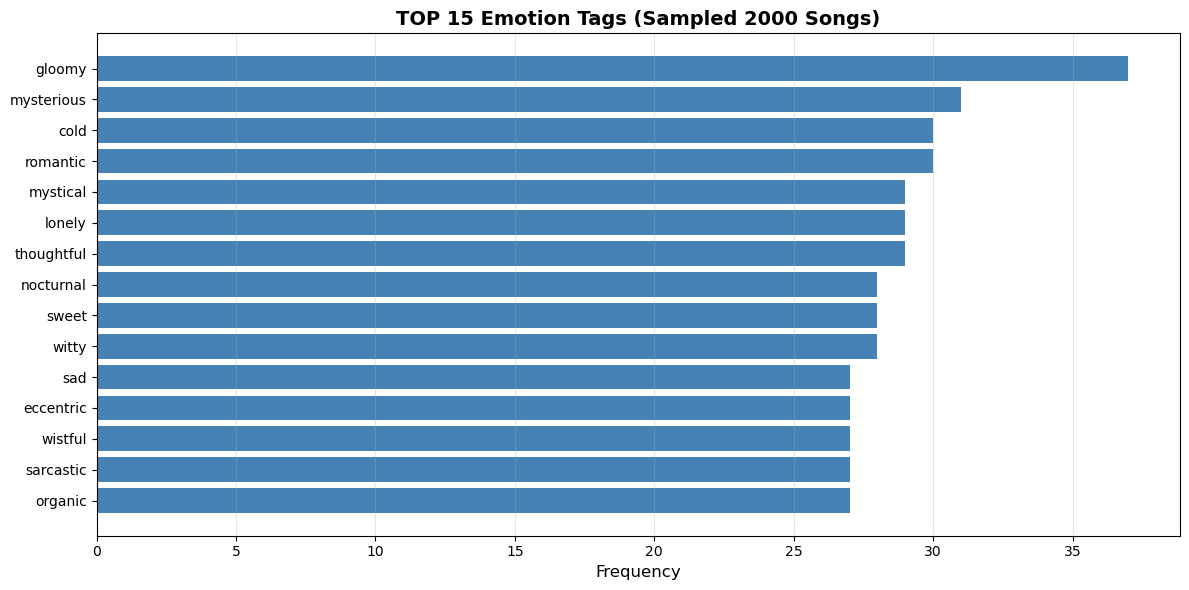

In [ ]:
# 解析seeds列（情感标签）(Parse seeds column - emotion tags)
print("=" * 70)
print("🏷️ 情感标签分析 (Emotion Tag Analysis)")
print("=" * 70)

# 解析标签 (Parse tags)
all_tags = []
for tags_str in df_sampled['seeds'].dropna():
    try:
        if isinstance(tags_str, str):
            tags = ast.literal_eval(tags_str)
            if isinstance(tags, list):
                all_tags.extend([tag.strip() for tag in tags if tag.strip()])
    except:
        continue

if all_tags:
    tag_counts = Counter(all_tags)
    print(f"\n总标签数 (Total tags): {len(all_tags):,}")
    print(f"唯一标签数 (Unique tags): {len(tag_counts)}")
    print(f"\nTOP 20 最常见标签 (TOP 20 Most Common Tags):")
    for i, (tag, count) in enumerate(tag_counts.most_common(20), 1):
        print(f"  {i:2d}. {tag:20s}: {count:4d} 次 ({count/len(df_sampled)*100:.1f}%)")
    
    # 可视化TOP标签 (Visualize top tags)
    top_tags = dict(tag_counts.most_common(15))
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_tags)), list(top_tags.values()), color='steelblue')
    plt.yticks(range(len(top_tags)), list(top_tags.keys()))
    plt.xlabel('Frequency', fontsize=12)
    plt.title('TOP 15 Emotion Tags (Sampled 2000 Songs)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 无法解析标签 (Unable to parse tags)")


## 8. 流派分析 (Genre Analysis)


🎸 流派分析（采样2000首）(Genre Analysis - Sampled 2000 Songs)

总流派数 (Total genres): 231

TOP 20 流派 (TOP 20 Genres):
   1. indie                         : 141 首 (7.0%)
   2. electronic                    : 134 首 (6.7%)
   3. pop                           : 124 首 (6.2%)
   4. rock                          : 118 首 (5.9%)
   5. hip-hop                       :  61 首 (3.0%)
   6. folk                          :  58 首 (2.9%)
   7. ambient                       :  52 首 (2.6%)
   8. alternative                   :  50 首 (2.5%)
   9. soundtrack                    :  42 首 (2.1%)
  10. soul                          :  38 首 (1.9%)
  11. jazz                          :  35 首 (1.8%)
  12. experimental                  :  30 首 (1.5%)
  13. piano                         :  25 首 (1.2%)
  14. noise                         :  23 首 (1.1%)
  15. alternative rock              :  23 首 (1.1%)
  16. classic rock                  :  23 首 (1.1%)
  17. acoustic                      :  23 首 (1.1%)
  18. classical           

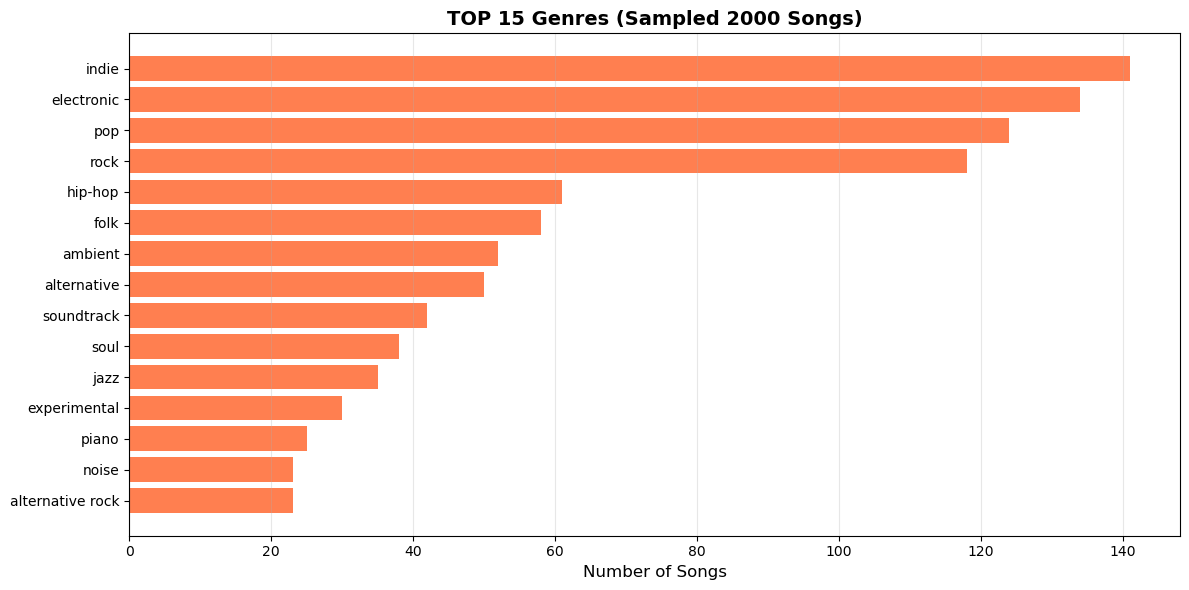


📊 不同流派的V-A-D平均值（TOP 10流派）(V-A-D Average by Genre - TOP 10):
             valence_tags  arousal_tags  dominance_tags
genre                                                  
alternative          5.55          4.15            5.28
ambient              5.05          3.77            4.70
electronic           5.58          4.40            5.21
folk                 5.27          3.68            5.20
hip-hop              5.50          4.35            5.40
indie                5.79          4.15            5.42
pop                  6.28          4.71            5.75
rock                 5.33          4.44            5.37
soul                 6.26          4.51            5.89
soundtrack           5.18          4.44            5.00


In [ ]:
if 'genre' in df_sampled.columns:
    print("=" * 70)
    print("🎸 流派分析（采样2000首）(Genre Analysis - Sampled 2000 Songs)")
    print("=" * 70)
    
    genre_counts = df_sampled['genre'].value_counts()
    print(f"\n总流派数 (Total genres): {len(genre_counts)}")
    print(f"\nTOP 20 流派 (TOP 20 Genres):")
    for i, (genre, count) in enumerate(genre_counts.head(20).items(), 1):
        print(f"  {i:2d}. {genre:30s}: {count:3d} 首 ({count/len(df_sampled)*100:.1f}%)")
    
    # 可视化TOP流派 (Visualize top genres)
    top_genres = dict(genre_counts.head(15))
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_genres)), list(top_genres.values()), color='coral')
    plt.yticks(range(len(top_genres)), list(top_genres.keys()))
    plt.xlabel('Number of Songs', fontsize=12)
    plt.title('TOP 15 Genres (Sampled 2000 Songs)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 分析不同流派的V-A-D特征 (Analyze V-A-D features by genre)
    print(f"\n📊 不同流派的V-A-D平均值（TOP 10流派）(V-A-D Average by Genre - TOP 10):")
    top_10_genres = genre_counts.head(10).index
    genre_vad = df_sampled[df_sampled['genre'].isin(top_10_genres)].groupby('genre')[
        ['valence_tags', 'arousal_tags', 'dominance_tags']
    ].mean().round(2)
    print(genre_vad)


## 9. 艺术家分析 (Artist Analysis)


In [ ]:
if 'artist' in df_sampled.columns:
    print("=" * 70)
    print("👤 艺术家分析（采样2000首）(Artist Analysis - Sampled 2000 Songs)")
    print("=" * 70)
    
    artist_counts = df_sampled['artist'].value_counts()
    print(f"\n总艺术家数 (Total artists): {len(artist_counts)}")
    print(f"\nTOP 20 艺术家 (TOP 20 Artists):")
    for i, (artist, count) in enumerate(artist_counts.head(20).items(), 1):
        print(f"  {i:2d}. {artist:40s}: {count:2d} 首 (songs)")
    
    # 统计每个艺术家的平均歌曲数 (Statistics on average songs per artist)
    print(f"\n平均每个艺术家的歌曲数 (Average songs per artist): {artist_counts.mean():.2f}")
    print(f"中位数 (Median): {artist_counts.median():.0f}")
    print(f"最多歌曲的艺术家 (Artist with most songs): {artist_counts.index[0]} ({artist_counts.iloc[0]} 首 (songs))")


👤 艺术家分析（采样2000首）(Artist Analysis - Sampled 2000 Songs)

总艺术家数 (Total artists): 1713

TOP 20 艺术家 (TOP 20 Artists):
   1. Skerror                                 :  8 首 (songs)
   2. Robbie Williams                         :  6 首 (songs)
   3. Janet Jackson                           :  6 首 (songs)
   4. The Beatles                             :  6 首 (songs)
   5. Tori Amos                               :  5 首 (songs)
   6. 志方あきこ                                   :  5 首 (songs)
   7. Depeche Mode                            :  5 首 (songs)
   8. They Might Be Giants                    :  5 首 (songs)
   9. Shakira                                 :  4 首 (songs)
  10. Warren Zevon                            :  4 首 (songs)
  11. Bright Eyes                             :  4 首 (songs)
  12. The Flaming Lips                        :  4 首 (songs)
  13. Azure Ray                               :  4 首 (songs)
  14. Ulver                                   :  4 首 (songs)
  15. Lush                      

## 10. 标签数量分析 (Tag Count Analysis)


📊 情感标签数量分析（采样2000首）(Emotion Tag Count Analysis - Sampled 2000 Songs)

标签数量统计 (Tag count statistics):
  均值 (Mean): 4.04
  中位数 (Median): 2
  最小值 (Min): 1
  最大值 (Max): 40


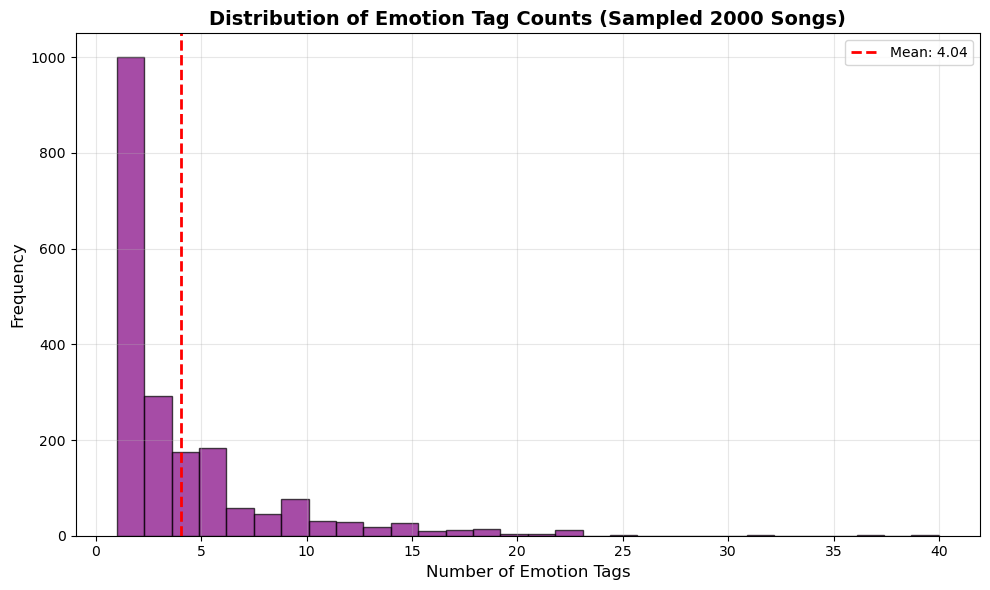

In [ ]:
if 'number_of_emotion_tags' in df_sampled.columns:
    print("=" * 70)
    print("📊 情感标签数量分析（采样2000首）(Emotion Tag Count Analysis - Sampled 2000 Songs)")
    print("=" * 70)
    
    print(f"\n标签数量统计 (Tag count statistics):")
    print(f"  均值 (Mean): {df_sampled['number_of_emotion_tags'].mean():.2f}")
    print(f"  中位数 (Median): {df_sampled['number_of_emotion_tags'].median():.0f}")
    print(f"  最小值 (Min): {df_sampled['number_of_emotion_tags'].min():.0f}")
    print(f"  最大值 (Max): {df_sampled['number_of_emotion_tags'].max():.0f}")
    
    # 可视化标签数量分布 (Visualize tag count distribution)
    plt.figure(figsize=(10, 6))
    plt.hist(df_sampled['number_of_emotion_tags'], bins=30, alpha=0.7, color='purple', edgecolor='black')
    plt.axvline(df_sampled['number_of_emotion_tags'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df_sampled["number_of_emotion_tags"].mean():.2f}')
    plt.xlabel('Number of Emotion Tags', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Emotion Tag Counts (Sampled 2000 Songs)', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


## 11. 与DEAM数据集对比 (Comparison with DEAM Dataset)


📊 MuSe vs DEAM 对比 (MuSe vs DEAM Comparison)

数据集规模 (Dataset scale):
  MuSe (原始) (Original): 90,001 首 (songs)
  MuSe (采样) (Sampled): 2,000 首 (songs)
  DEAM: 1,802 首 (songs)

Valence对比 (Valence comparison):
  MuSe (采样) (Sampled): [0.64, 8.47], 均值 (mean)=5.41
  DEAM: [1.60, 8.40], 均值 (mean)=4.90

Arousal对比 (Arousal comparison):
  MuSe (采样) (Sampled): [0.69, 7.27], 均值 (mean)=4.29
  DEAM: [1.60, 8.10], 均值 (mean)=4.81

Dominance (MuSe特有) (MuSe-specific):
  MuSe (采样) (Sampled): [0.68, 7.44], 均值 (mean)=5.22


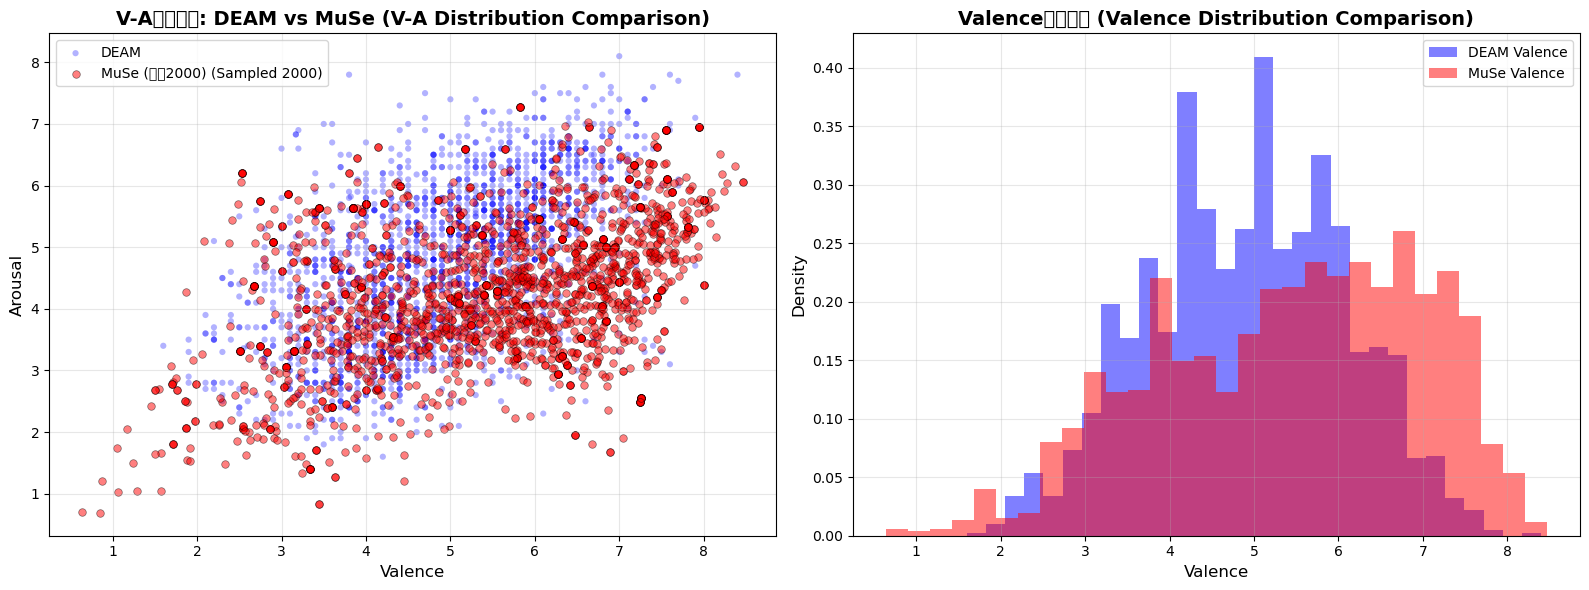

In [ ]:
# 加载DEAM数据用于对比 (Load DEAM data for comparison)
try:
    deam_annotations_dir = Path('../data/DEAM/DEAM_Annotations/annotations/annotations averaged per song/song_level')
    deam_df1 = pd.read_csv(deam_annotations_dir / 'static_annotations_averaged_songs_1_2000.csv')
    deam_df2 = pd.read_csv(deam_annotations_dir / 'static_annotations_averaged_songs_2000_2058.csv')
    deam_df = pd.concat([deam_df1, deam_df2], ignore_index=True)
    deam_df.columns = deam_df.columns.str.strip()
    
    print("=" * 70)
    print("📊 MuSe vs DEAM 对比 (MuSe vs DEAM Comparison)")
    print("=" * 70)
    
    print(f"\n数据集规模 (Dataset scale):")
    print(f"  MuSe (原始) (Original): {len(df):,} 首 (songs)")
    print(f"  MuSe (采样) (Sampled): {len(df_sampled):,} 首 (songs)")
    print(f"  DEAM: {len(deam_df):,} 首 (songs)")
    
    print(f"\nValence对比 (Valence comparison):")
    print(f"  MuSe (采样) (Sampled): [{df_sampled['valence_tags'].min():.2f}, {df_sampled['valence_tags'].max():.2f}], 均值 (mean)={df_sampled['valence_tags'].mean():.2f}")
    if 'valence_mean' in deam_df.columns:
        print(f"  DEAM: [{deam_df['valence_mean'].min():.2f}, {deam_df['valence_mean'].max():.2f}], 均值 (mean)={deam_df['valence_mean'].mean():.2f}")
    
    print(f"\nArousal对比 (Arousal comparison):")
    print(f"  MuSe (采样) (Sampled): [{df_sampled['arousal_tags'].min():.2f}, {df_sampled['arousal_tags'].max():.2f}], 均值 (mean)={df_sampled['arousal_tags'].mean():.2f}")
    if 'arousal_mean' in deam_df.columns:
        print(f"  DEAM: [{deam_df['arousal_mean'].min():.2f}, {deam_df['arousal_mean'].max():.2f}], 均值 (mean)={deam_df['arousal_mean'].mean():.2f}")
    
    print(f"\nDominance (MuSe特有) (MuSe-specific):")
    print(f"  MuSe (采样) (Sampled): [{df_sampled['dominance_tags'].min():.2f}, {df_sampled['dominance_tags'].max():.2f}], 均值 (mean)={df_sampled['dominance_tags'].mean():.2f}")
    
    # 可视化对比 (Visualize comparison)
    if 'valence_mean' in deam_df.columns and 'arousal_mean' in deam_df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # V-A散点图对比 (V-A scatter plot comparison)
        axes[0].scatter(deam_df['valence_mean'], deam_df['arousal_mean'], 
                       alpha=0.3, s=20, color='blue', label='DEAM', edgecolors='none')
        axes[0].scatter(df_sampled['valence_tags'], df_sampled['arousal_tags'], 
                       alpha=0.5, s=30, color='red', label='MuSe (采样2000) (Sampled 2000)', edgecolors='black', linewidth=0.5)
        axes[0].set_xlabel('Valence', fontsize=12)
        axes[0].set_ylabel('Arousal', fontsize=12)
        axes[0].set_title('V-A分布对比: DEAM vs MuSe (V-A Distribution Comparison)', fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(alpha=0.3)
        
        # 分布直方图对比 (Distribution histogram comparison)
        axes[1].hist(deam_df['valence_mean'], bins=30, alpha=0.5, color='blue', label='DEAM Valence', density=True)
        axes[1].hist(df_sampled['valence_tags'], bins=30, alpha=0.5, color='red', label='MuSe Valence', density=True)
        axes[1].set_xlabel('Valence', fontsize=12)
        axes[1].set_ylabel('Density', fontsize=12)
        axes[1].set_title('Valence分布对比 (Valence Distribution Comparison)', fontsize=14, fontweight='bold')
        axes[1].legend()
        axes[1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
except Exception as e:
    print(f"⚠️ 无法加载DEAM数据 (Unable to load DEAM data): {e}")
    print("   请确保DEAM数据集已下载到 ../data/DEAM/ 目录 (Please ensure DEAM dataset is downloaded to ../data/DEAM/ directory)")


## 12. 数据质量检查 (Data Quality Check)


In [ ]:
print("=" * 70)
print("✅ 数据质量检查（采样2000首）(Data Quality Check - Sampled 2000 Songs)")
print("=" * 70)

# 检查V-A-D值是否在合理范围（通常1-9或0-1）(Check if V-A-D values are in reasonable range)
print(f"\nV-A-D值范围检查 (V-A-D value range check):")
for col in ['valence_tags', 'arousal_tags', 'dominance_tags']:
    min_val = df_sampled[col].min()
    max_val = df_sampled[col].max()
    print(f"  {col}: [{min_val:.2f}, {max_val:.2f}]", end="")
    if min_val < 0 or max_val > 10:
        print(" ⚠️ 超出常见范围 (Out of common range)")
    else:
        print(" ✅ 合理范围 (Reasonable range)")

# 检查异常值（使用IQR方法）(Check outliers using IQR method)
print(f"\n异常值检查 (IQR方法) (Outlier check - IQR method):")
for col in ['valence_tags', 'arousal_tags', 'dominance_tags']:
    Q1 = df_sampled[col].quantile(0.25)
    Q3 = df_sampled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df_sampled[col] < lower_bound) | (df_sampled[col] > upper_bound)).sum()
    print(f"  {col}: {outliers} 个异常值 ({outliers/len(df_sampled)*100:.2f}%) (outliers)")

# 检查Spotify ID可用性 (Check Spotify ID availability)
if 'spotify_id' in df_sampled.columns:
    spotify_available = df_sampled['spotify_id'].notna().sum()
    print(f"\nSpotify ID可用性 (Spotify ID availability):")
    print(f"  有Spotify ID (With Spotify ID): {spotify_available}/{len(df_sampled)} ({spotify_available/len(df_sampled)*100:.1f}%)")
    print(f"  💡 这些歌曲可以通过Spotify API获取音频 (These songs can get audio via Spotify API)")

# 检查mbid可用性 (Check mbid availability)
if 'mbid' in df_sampled.columns:
    mbid_available = df_sampled['mbid'].notna().sum()
    print(f"\nMusicBrainz ID可用性 (MusicBrainz ID availability):")
    print(f"  有mbid (With mbid): {mbid_available}/{len(df_sampled)} ({mbid_available/len(df_sampled)*100:.1f}%)")


✅ 数据质量检查（采样2000首）(Data Quality Check - Sampled 2000 Songs)

V-A-D值范围检查 (V-A-D value range check):
  valence_tags: [0.64, 8.47] ✅ 合理范围 (Reasonable range)
  arousal_tags: [0.69, 7.27] ✅ 合理范围 (Reasonable range)
  dominance_tags: [0.68, 7.44] ✅ 合理范围 (Reasonable range)

异常值检查 (IQR方法) (Outlier check - IQR method):
  valence_tags: 0 个异常值 (0.00%) (outliers)
  arousal_tags: 7 个异常值 (0.35%) (outliers)
  dominance_tags: 30 个异常值 (1.50%) (outliers)

Spotify ID可用性 (Spotify ID availability):
  有Spotify ID (With Spotify ID): 1390/2000 (69.5%)
  💡 这些歌曲可以通过Spotify API获取音频 (These songs can get audio via Spotify API)

MusicBrainz ID可用性 (MusicBrainz ID availability):
  有mbid (With mbid): 1347/2000 (67.3%)


## 13. 采样数据预览 (Sampled Data Preview)


In [ ]:
# 显示采样后的数据预览 (Display sampled data preview)
print("=" * 70)
print("📋 采样2000首歌曲的数据预览 (Sampled 2000 Songs Data Preview)")
print("=" * 70)

print(f"\n前10首歌曲 (First 10 songs):")
display_cols = ['track', 'artist', 'genre', 'valence_tags', 'arousal_tags', 'dominance_tags', 'spotify_id']
available_cols = [col for col in display_cols if col in df_sampled.columns]
df_sampled[available_cols].head(10)


📋 采样2000首歌曲的数据预览 (Sampled 2000 Songs Data Preview)

前10首歌曲 (First 10 songs):


,track,artist,genre,valence_tags,arousal_tags,dominance_tags,spotify_id
0,Falling In Love Again,Blackstreet,hip hop,7.353333,6.370000,6.306667,43xxANU5jlPlHj6PynW6ca
1,Blasphemer,Lucifers Crossing,metal,3.172857,4.494286,3.468571,NaN
2,Justify My Love (porno mix) Rare,Madonna,NaN,6.640000,6.950000,7.000000,NaN
3,One,Aimee Mann,soundtrack,4.683675,3.500171,5.018205,5e7OZ8PyDJYQdGAiidCPad
4,Roads Untraveled,Linkin Park,alternative rock,3.652632,3.982105,4.387368,1dYw8HTRJnFpeEeMtXj99a
5,Two Skaters,Nits,pop,2.860000,2.045000,2.555000,1N7i5FGCibqWxTBwFeeGLC
6,I'll be seeing you,Frank Sinatra,jazz,7.336214,4.502524,6.493689,7Gvf7lC6lV1x5Ul3eVePdH
7,Teen Angel,Frankie Lymon and The Teenagers,NaN,3.610000,3.010000,3.145000,NaN
8,City Theme,Vanessa-Mae,classical,6.460000,5.410000,6.950000,NaN
9,"Pedraforca, Terra De Bruixes",Narsilion,soundtrack,5.288261,4.629565,4.901304,56aOAZxOv6tKdSCTz9XwlS


## 14. 总结 (Summary)


In [ ]:
print("=" * 70)
print("🎉 MuSe数据集分析总结 (MuSe Dataset Analysis Summary)")
print("=" * 70)

print(f"\n✅ 数据集规模 (Dataset scale):")
print(f"  • 原始数据 (Original data): {len(df):,} 首 (songs)")
print(f"  • 采样数据 (Sampled data): {len(df_sampled):,} 首 (songs)")
print(f"  • 采样比例 (Sampling ratio): {len(df_sampled)/len(df)*100:.2f}%")

print(f"\n✅ 标注信息（采样2000首）(Annotation info - Sampled 2000 songs):")
print(f"  • Valence范围 (Range): [{df_sampled['valence_tags'].min():.2f}, {df_sampled['valence_tags'].max():.2f}], 均值 (mean)={df_sampled['valence_tags'].mean():.2f}")
print(f"  • Arousal范围 (Range): [{df_sampled['arousal_tags'].min():.2f}, {df_sampled['arousal_tags'].max():.2f}], 均值 (mean)={df_sampled['arousal_tags'].mean():.2f}")
print(f"  • Dominance范围 (Range): [{df_sampled['dominance_tags'].min():.2f}, {df_sampled['dominance_tags'].max():.2f}], 均值 (mean)={df_sampled['dominance_tags'].mean():.2f}")

if 'genre' in df_sampled.columns:
    print(f"\n✅ 流派信息 (Genre info):")
    print(f"  • 总流派数 (Total genres): {df_sampled['genre'].nunique()}")

if 'artist' in df_sampled.columns:
    print(f"\n✅ 艺术家信息 (Artist info):")
    print(f"  • 总艺术家数 (Total artists): {df_sampled['artist'].nunique()}")

if 'spotify_id' in df_sampled.columns:
    spotify_count = df_sampled['spotify_id'].notna().sum()
    print(f"\n✅ Spotify ID:")
    print(f"  • 有Spotify ID (With Spotify ID): {spotify_count}/{len(df_sampled)} ({spotify_count/len(df_sampled)*100:.1f}%)")
    print(f"  • 💡 这些歌曲可以通过Spotify API获取音频 (These songs can get audio via Spotify API)")

print(f"\n💾 输出文件 (Output files):")
print(f"  • 采样数据 (Sampled data): {output_file}")

print(f"\n🚀 下一步 (Next steps):")
print(f"  → 创建MuSeDataset数据加载器类 (Create MuSeDataset data loader class)")
print(f"  → 通过Spotify API获取音频文件（如果有API key）(Get audio files via Spotify API if API key available)")
print(f"  → 提取音频特征（MFCC, Chroma, Spectral等）(Extract audio features: MFCC, Chroma, Spectral, etc.)")
print(f"  → 训练基线模型（V, A, D三个维度）(Train baseline models for V, A, D dimensions)")
print(f"  → 与DEAM结果对比 (Compare with DEAM results)")

print("\n" + "=" * 70)
print("✅ 数据分析完成！可以开始下一步了！(Data analysis completed! Ready for next steps!)")
print("=" * 70)


🎉 MuSe数据集分析总结 (MuSe Dataset Analysis Summary)

✅ 数据集规模 (Dataset scale):
  • 原始数据 (Original data): 90,001 首 (songs)
  • 采样数据 (Sampled data): 2,000 首 (songs)
  • 采样比例 (Sampling ratio): 2.22%

✅ 标注信息（采样2000首）(Annotation info - Sampled 2000 songs):
  • Valence范围 (Range): [0.64, 8.47], 均值 (mean)=5.41
  • Arousal范围 (Range): [0.69, 7.27], 均值 (mean)=4.29
  • Dominance范围 (Range): [0.68, 7.44], 均值 (mean)=5.22

✅ 流派信息 (Genre info):
  • 总流派数 (Total genres): 231

✅ 艺术家信息 (Artist info):
  • 总艺术家数 (Total artists): 1713

✅ Spotify ID:
  • 有Spotify ID (With Spotify ID): 1390/2000 (69.5%)
  • 💡 这些歌曲可以通过Spotify API获取音频 (These songs can get audio via Spotify API)

💾 输出文件 (Output files):
  • 采样数据 (Sampled data): ..\data\MuSe\processed\muse_sampled_2000.csv

🚀 下一步 (Next steps):
  → 创建MuSeDataset数据加载器类 (Create MuSeDataset data loader class)
  → 通过Spotify API获取音频文件（如果有API key）(Get audio files via Spotify API if API key available)
  → 提取音频特征（MFCC, Chroma, Spectral等）(Extract audio features: MFCC, Chroma, Spectr

## 🎵 音频下载测试 (Audio Download Test)

**目标：** 使用 yt-dlp 从 YouTube 下载歌曲的 30-60 秒音频片段

**方法：**
- 使用 `yt-dlp` 搜索并下载音频
- 只下载 30-60 秒片段（节省时间和空间）
- 先测试 10 首歌曲，验证流程
- 转换为 MP3 格式

**注意：**
- 需要安装 `yt-dlp`: `pip install yt-dlp`
- 需要 `ffmpeg` 支持音频转换
- 仅用于学术研究目的


In [26]:
# 检查 yt-dlp 是否已安装 (Check if yt-dlp is installed)
try:
    import yt_dlp
    from yt_dlp.utils import download_range_func
    print("✅ yt-dlp 已安装")
except ImportError:
    print("❌ yt-dlp 未安装")
    print("\n请先安装:")
    print("   pip install yt-dlp")
    print("\n或者:")
    print("   conda install -c conda-forge yt-dlp")


✅ yt-dlp 已安装


In [33]:
import time

print("=" * 70)
print("🎵 开始音频批量下载 (Starting Audio Batch Download)")
print("=" * 70)

# 1. 加载 1000 首采样数据
sampled_1000_file = Path('../data/MuSe/processed/muse_sampled_1000.csv')
if sampled_1000_file.exists():
    df_download = pd.read_csv(sampled_1000_file)
    print(f"✅ 加载采样数据: {sampled_1000_file}")
    print(f"   总数: {len(df_download)} 首")
else:
    print(f"⚠️  muse_sampled_1000.csv 不存在，使用当前的采样数据")
    df_download = df_sampled.copy()

# 2. 设置保存路径 (Set save path)
# 为1000首歌曲创建专门的文件夹
AUDIO_OUTPUT_DIR = Path('../data/MuSe/audio_clips_1000')
AUDIO_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
print(f"\n📂 音频保存目录: {AUDIO_OUTPUT_DIR}")

# 3. 准备下载数据
# 下载全部 1000 首（如果想测试，可以改为 df_download.head(50)）
DOWNLOAD_COUNT = None  # None = 全部下载，或设置数字如 50, 100 进行测试
if DOWNLOAD_COUNT:
    test_df = df_download.head(DOWNLOAD_COUNT).copy()
    print(f"🧪 测试模式: 下载前 {DOWNLOAD_COUNT} 首")
else:
    test_df = df_download.copy()
    print(f"🚀 完整模式: 下载全部 {len(test_df)} 首")

print(f"\n估计时间: 约 {len(test_df) * 10 / 60:.0f} 分钟")
print(f"预计文件大小: 约 {len(test_df) * 1.5:.0f} MB (假设每首 1.5MB)")

# 显示前10首歌曲
print(f"\n前10首歌曲预览:")
for idx, row in test_df.head(10).iterrows():
    print(f"   {idx+1:4d}. {row['artist']} - {row['track']}")


🎵 开始音频批量下载 (Starting Audio Batch Download)
✅ 加载采样数据: ..\data\MuSe\processed\muse_sampled_1000.csv
   总数: 1000 首

📂 音频保存目录: ..\data\MuSe\audio_clips_1000
🚀 完整模式: 下载全部 1000 首

估计时间: 约 167 分钟
预计文件大小: 约 1500 MB (假设每首 1.5MB)

前10首歌曲预览:
      1. Blackstreet - Falling In Love Again
      2. Lucifers Crossing - Blasphemer
      3. Madonna - Justify My Love (porno mix) Rare
      4. Aimee Mann - One
      5. Linkin Park - Roads Untraveled
      6. Nits - Two Skaters
      7. Frank Sinatra - I'll be seeing you
      8. Frankie Lymon and The Teenagers - Teen Angel
      9. Vanessa-Mae - City Theme
     10. Narsilion - Pedraforca, Terra De Bruixes


In [34]:
# 3. 定义下载函数 (Define download function)
def download_clip(row, output_dir):
    """
    搜索并下载歌曲的 30s-60s 片段
    Search and download 30s-60s segment of the song
    """
    # 构造搜索关键词：歌手 - 歌名 (Construct search query)
    search_query = f"{row['artist']} - {row['track']} audio"
    
    # 确定文件名 (Determine filename)
    # 格式：序号-歌手-歌名.mp3 (清理非法字符)
    # 清理文件名中的非法字符，只保留字母、数字、空格、横线和下划线
    safe_artist = "".join(c for c in str(row['artist']) if c.isalnum() or c in (' ', '-', '_')).strip()[:30]
    safe_track = "".join(c for c in str(row['track']) if c.isalnum() or c in (' ', '-', '_')).strip()[:30]
    
    # 使用序号-歌手-歌名格式（序号从1开始，补齐4位）
    save_filename = f"{row.name+1:04d}-{safe_artist}-{safe_track}"
    save_path = output_dir / save_filename
    
    # 检查文件是否已存在 (Check if file exists)
    if (save_path.with_suffix('.mp3')).exists():
        print(f"   ⏭️  已存在 (Skipping): {save_filename}.mp3")
        return True
    
    # 配置 yt-dlp (Configure yt-dlp)
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': str(save_path),  # 输出路径模板
        'default_search': 'ytsearch1',  # 自动在 YouTube 搜索并下载第一个结果
        'noplaylist': True,
        'quiet': True,  # 减少输出噪音
        'no_warnings': True,
        
        # --- 核心：只下载 30s 到 60s ---
        'download_ranges': download_range_func(None, [(30, 60)]),
        'force_keyframes_at_cuts': True,  # 强制关键帧剪切，保证时间精准
        # 注意：部分视频可能短于60秒，导致实际片段不足30秒
        # 下载后请运行 Cell 40 进行数据清理和重新编号
        # -----------------------------
        
        # 后处理：转换为 mp3
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
            'preferredquality': '192',
        }],
    }
    
    try:
        print(f"   ⬇️  正在下载 (Downloading): {save_filename}.mp3")
        print(f"      搜索: {row['artist']} - {row['track']}")
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([search_query])
        return True
    except Exception as e:
        print(f"   ❌ 下载失败 (Failed): {save_filename}.mp3 | Error: {str(e)[:50]}...")
        return False

print("✅ 下载函数已定义 (Download function defined)")
print("📝 文件命名格式: 序号-歌手-歌名.mp3")
print("   示例: 0001-Blackstreet-Falling In Love Again.mp3")
print("\n⚠️  重要提示:")
print("   • 下载 30-60 秒片段，部分视频可能过短")
print("   • 下载完成后请运行 Cell 40（数据清理和重新编号）")
print("   • 会自动删除时长不足的音频并重新编号")


✅ 下载函数已定义 (Download function defined)
📝 文件命名格式: 序号-歌手-歌名.mp3
   示例: 0001-Blackstreet-Falling In Love Again.mp3

⚠️  重要提示:
   • 下载 30-60 秒片段，部分视频可能过短
   • 下载完成后请运行 Cell 40（数据清理和重新编号）
   • 会自动删除时长不足的音频并重新编号


In [35]:
# 4. 执行批量下载 (Execute batch download)
success_count = 0
fail_count = 0
start_time = time.time()

print("\n" + "=" * 70)
print(f"🚀 开始下载 {len(test_df)} 首歌曲...")
print("=" * 70)
print()
print("💡 提示:")
print("   • 每首歌约需 10-15 秒")
print("   • 可随时中断（Ctrl+C），已下载的文件会保留")
print("   • 重新运行会自动跳过已下载的文件")
print()

# 显示进度
from tqdm import tqdm

for idx, (index, row) in enumerate(tqdm(test_df.iterrows(), total=len(test_df), desc="下载进度")):
    # 为了避免请求过快被封 IP，每首歌之间暂停 1.5-2 秒
    if idx > 0:
        time.sleep(1.5)
        
    result = download_clip(row, AUDIO_OUTPUT_DIR)
    if result:
        success_count += 1
    else:
        fail_count += 1
    
    # 每下载50首显示一次中间统计
    if (idx + 1) % 50 == 0:
        elapsed = time.time() - start_time
        avg_time = elapsed / (idx + 1)
        remaining = avg_time * (len(test_df) - idx - 1)
        print(f"\n📊 进度统计 ({idx + 1}/{len(test_df)}):")
        print(f"   成功: {success_count}, 失败: {fail_count}")
        print(f"   已用时: {elapsed/60:.1f}分钟, 预计剩余: {remaining/60:.1f}分钟")

end_time = time.time()
duration = end_time - start_time

print("\n" + "=" * 70)
print("✅ 下载完成 (Download Completed)")
print("=" * 70)
print(f"📊 统计结果 (Statistics):")
print(f"   成功 (Success): {success_count} / {len(test_df)} ({success_count/len(test_df)*100:.1f}%)")
print(f"   失败 (Failed): {fail_count} / {len(test_df)} ({fail_count/len(test_df)*100:.1f}%)")
print(f"   总耗时 (Total time): {duration/60:.1f} 分钟")
print(f"   平均速度 (Avg speed): {duration/len(test_df):.1f} 秒/首")
print(f"📁 文件位置: {AUDIO_OUTPUT_DIR.resolve()}")
print(f"\n⚠️  重要: 请运行下一个 Cell (Cell 40) 进行数据清理和重新编号！")



🚀 开始下载 1000 首歌曲...

💡 提示:
   • 每首歌约需 10-15 秒
   • 可随时中断（Ctrl+C），已下载的文件会保留
   • 重新运行会自动跳过已下载的文件



下载进度:   0%|          | 0/1000 [00:00<?, ?it/s]

   ⬇️  正在下载 (Downloading): 0001-Blackstreet-Falling In Love Again.mp3
      搜索: Blackstreet - Falling In Love Again


下载进度:   0%|          | 1/1000 [00:09<2:36:45,  9.41s/it]

   ⬇️  正在下载 (Downloading): 0002-Lucifers Crossing-Blasphemer.mp3
      搜索: Lucifers Crossing - Blasphemer


下载进度:   0%|          | 2/1000 [00:19<2:44:33,  9.89s/it]

   ⬇️  正在下载 (Downloading): 0003-Madonna-Justify My Love porno mix Rare.mp3
      搜索: Madonna - Justify My Love (porno mix) Rare


下载进度:   0%|          | 3/1000 [00:30<2:48:14, 10.12s/it]

   ⬇️  正在下载 (Downloading): 0004-Aimee Mann-One.mp3
      搜索: Aimee Mann - One


下载进度:   0%|          | 4/1000 [00:41<2:55:20, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0005-Linkin Park-Roads Untraveled.mp3
      搜索: Linkin Park - Roads Untraveled


下载进度:   0%|          | 5/1000 [00:51<2:54:22, 10.52s/it]

   ⬇️  正在下载 (Downloading): 0006-Nits-Two Skaters.mp3
      搜索: Nits - Two Skaters


下载进度:   1%|          | 6/1000 [01:01<2:50:42, 10.30s/it]

   ⬇️  正在下载 (Downloading): 0007-Frank Sinatra-Ill be seeing you.mp3
      搜索: Frank Sinatra - I'll be seeing you


下载进度:   1%|          | 7/1000 [01:11<2:50:10, 10.28s/it]

   ⬇️  正在下载 (Downloading): 0008-Frankie Lymon and The Teenager-Teen Angel.mp3
      搜索: Frankie Lymon and The Teenagers - Teen Angel


下载进度:   1%|          | 8/1000 [01:21<2:47:21, 10.12s/it]

   ⬇️  正在下载 (Downloading): 0009-Vanessa-Mae-City Theme.mp3
      搜索: Vanessa-Mae - City Theme


下载进度:   1%|          | 9/1000 [01:31<2:48:04, 10.18s/it]

   ⬇️  正在下载 (Downloading): 0010-Narsilion-Pedraforca Terra De Bruixes.mp3
      搜索: Narsilion - Pedraforca, Terra De Bruixes


下载进度:   1%|          | 10/1000 [01:41<2:47:18, 10.14s/it]

   ⬇️  正在下载 (Downloading): 0011-T-Bone Walker-Blues For Marili  LP Version.mp3
      搜索: T-Bone Walker - Blues For Marili ( LP Version )


下载进度:   1%|          | 11/1000 [01:53<2:52:36, 10.47s/it]

   ⬇️  正在下载 (Downloading): 0012-The Harvest Ministers-When You Have A Faint Heart.mp3
      搜索: The Harvest Ministers - When You Have A Faint Heart


下载进度:   1%|          | 12/1000 [02:04<2:56:43, 10.73s/it]

   ⬇️  正在下载 (Downloading): 0013-Poison-OnceBittenTwiceShy.mp3
      搜索: Poison - OnceBittenTwiceShy


下载进度:   1%|▏         | 13/1000 [02:15<2:58:19, 10.84s/it]

   ⬇️  正在下载 (Downloading): 0014-The Faint-Desperate Guys.mp3
      搜索: The Faint - Desperate Guys


下载进度:   1%|▏         | 14/1000 [02:25<2:54:59, 10.65s/it]

   ⬇️  正在下载 (Downloading): 0015-Beautiful Creatures-1 AM.mp3
      搜索: Beautiful Creatures - 1 A.M.


下载进度:   2%|▏         | 15/1000 [02:37<3:00:14, 10.98s/it]

   ⬇️  正在下载 (Downloading): 0016-Puressence-The Feeling.mp3
      搜索: Puressence - The Feeling


下载进度:   2%|▏         | 16/1000 [02:48<3:00:20, 11.00s/it]

   ⬇️  正在下载 (Downloading): 0017-Marillion-Beyond You.mp3
      搜索: Marillion - Beyond You


下载进度:   2%|▏         | 17/1000 [02:58<2:57:07, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0018-Stereolab-Tomorrow Is Already Here.mp3
      搜索: Stereolab - Tomorrow Is Already Here


下载进度:   2%|▏         | 18/1000 [03:08<2:52:46, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0019-Richard Ashcroft-On A Beach.mp3
      搜索: Richard Ashcroft - On A Beach


下载进度:   2%|▏         | 19/1000 [03:20<2:58:18, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0020-Joe Cuba-El Pito.mp3
      搜索: Joe Cuba - El Pito


下载进度:   2%|▏         | 20/1000 [03:31<2:56:21, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0021-The Narcotic Daffodils-Riding The Drag.mp3
      搜索: The Narcotic Daffodils - Riding The Drag


下载进度:   2%|▏         | 21/1000 [03:41<2:53:49, 10.65s/it]

   ⬇️  正在下载 (Downloading): 0022-Pharoah Sanders-Shukuru.mp3
      搜索: Pharoah Sanders - Shukuru


下载进度:   2%|▏         | 22/1000 [03:53<2:58:12, 10.93s/it]

   ⬇️  正在下载 (Downloading): 0023-Santana-Lets Get Ourselves Together Mi.mp3
      搜索: Santana - Let's Get Ourselves Together (Millenium Mix)


下载进度:   2%|▏         | 23/1000 [04:04<3:00:07, 11.06s/it]

   ⬇️  正在下载 (Downloading): 0024-G Love  Special Sauce-The Things That I Used To Do.mp3
      搜索: G. Love & Special Sauce - The Things That I Used To Do


下载进度:   2%|▏         | 24/1000 [04:15<3:00:29, 11.10s/it]

   ⬇️  正在下载 (Downloading): 0025-Thee More Shallows-Walk of Shame.mp3
      搜索: Thee More Shallows - Walk of Shame


下载进度:   2%|▎         | 25/1000 [04:26<2:56:56, 10.89s/it]

   ⬇️  正在下载 (Downloading): 0026-Weird Al Yankovic-Cable TV.mp3
      搜索: "Weird Al" Yankovic - Cable TV


下载进度:   3%|▎         | 26/1000 [04:37<2:58:28, 10.99s/it]

   ⬇️  正在下载 (Downloading): 0027-aktivehate-Dead Eyes.mp3
      搜索: aktivehate - Dead Eyes


下载进度:   3%|▎         | 27/1000 [04:48<3:01:12, 11.17s/it]

   ⬇️  正在下载 (Downloading): 0028-Ainslie Henderson-Dust.mp3
      搜索: Ainslie Henderson - Dust


下载进度:   3%|▎         | 28/1000 [04:58<2:55:32, 10.84s/it]

   ⬇️  正在下载 (Downloading): 0029-Halou-Political.mp3
      搜索: Halou - Political


下载进度:   3%|▎         | 29/1000 [05:09<2:51:41, 10.61s/it]

   ⬇️  正在下载 (Downloading): 0030-Charles Wilp-Close-Up.mp3
      搜索: Charles Wilp - Close-Up


下载进度:   3%|▎         | 30/1000 [05:20<2:55:16, 10.84s/it]

   ⬇️  正在下载 (Downloading): 0031-Lola Demo-i dont want to.mp3
      搜索: Lola Demo - i don't want to


下载进度:   3%|▎         | 31/1000 [05:32<2:59:18, 11.10s/it]

   ⬇️  正在下载 (Downloading): 0032-Chevelle-Dos.mp3
      搜索: Chevelle - Dos


下载进度:   3%|▎         | 32/1000 [05:42<2:54:09, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0033-Gentle Giant-Spooky Boogie.mp3
      搜索: Gentle Giant - Spooky Boogie


下载进度:   3%|▎         | 33/1000 [05:53<2:55:58, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0034-Underoath-And I Dreamt of You.mp3
      搜索: Underoath - And I Dreamt of You


下载进度:   3%|▎         | 34/1000 [06:03<2:53:11, 10.76s/it]

   ⬇️  正在下载 (Downloading): 0035-Ani DiFranco-Napoleon Re-recorded version.mp3
      搜索: Ani DiFranco - Napoleon (Re-recorded version)


下载进度:   4%|▎         | 35/1000 [06:13<2:49:50, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0036-Alice Cooper-Detroit City.mp3
      搜索: Alice Cooper - Detroit City


下载进度:   4%|▎         | 36/1000 [06:25<2:52:49, 10.76s/it]

   ⬇️  正在下载 (Downloading): 0037-カヒミカリィ-alcohol.mp3
      搜索: カヒミ・カリィ - alcohol


下载进度:   4%|▎         | 37/1000 [06:35<2:50:29, 10.62s/it]

   ⬇️  正在下载 (Downloading): 0038-Yanni-Come un sospiro.mp3
      搜索: Yanni - Come un sospiro


下载进度:   4%|▍         | 38/1000 [06:46<2:53:26, 10.82s/it]

   ⬇️  正在下载 (Downloading): 0039-Seu Jorge-Em Nagoya Eu Vi Eriko.mp3
      搜索: Seu Jorge - Em Nagoya Eu Vi Eriko


下载进度:   4%|▍         | 39/1000 [06:56<2:50:21, 10.64s/it]

   ⬇️  正在下载 (Downloading): 0040-moe-Shoot First.mp3
      搜索: moe. - Shoot First


下载进度:   4%|▍         | 40/1000 [07:07<2:48:24, 10.53s/it]

   ⬇️  正在下载 (Downloading): 0041-Jai Uttal-Nataraj - Black Phone.mp3
      搜索: Jai Uttal - Nataraj - Black Phone


下载进度:   4%|▍         | 41/1000 [07:18<2:52:59, 10.82s/it]

   ⬇️  正在下载 (Downloading): 0042-JYosna La Trobe-Beloved Youve come Today- Tumi.mp3
      搜索: JYosna La Trobe - Beloved, You've come Today- Tumi Je Esecho Aj


下载进度:   4%|▍         | 42/1000 [07:29<2:51:56, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0043-Nine Inch Nails-2 Ghosts I.mp3
      搜索: Nine Inch Nails - 2 Ghosts I


下载进度:   4%|▍         | 43/1000 [07:59<4:26:07, 16.68s/it]

   ⬇️  正在下载 (Downloading): 0044-Slice the Cake-A Dance With Dragons.mp3
      搜索: Slice the Cake - A Dance With Dragons


下载进度:   4%|▍         | 44/1000 [08:30<5:33:19, 20.92s/it]

   ⬇️  正在下载 (Downloading): 0045-Matt Wertz-This Moment.mp3
      搜索: Matt Wertz - This Moment


下载进度:   4%|▍         | 45/1000 [08:42<4:49:37, 18.20s/it]

   ⬇️  正在下载 (Downloading): 0046-Channel Live-Mad Izm Featuring KRS-One.mp3
      搜索: Channel Live - Mad Izm (Featuring KRS-One)


下载进度:   5%|▍         | 46/1000 [08:52<4:12:11, 15.86s/it]

   ⬇️  正在下载 (Downloading): 0047-Stephen Kellogg  the Sixers-Pedal Steel.mp3
      搜索: Stephen Kellogg & the Sixers - Pedal Steel


下载进度:   5%|▍         | 47/1000 [09:04<3:52:22, 14.63s/it]

   ⬇️  正在下载 (Downloading): 0048-Blondie-Suzy  Jeffrey.mp3
      搜索: Blondie - Suzy & Jeffrey


下载进度:   5%|▍         | 48/1000 [09:15<3:32:35, 13.40s/it]

   ⬇️  正在下载 (Downloading): 0049-Jami Sieber-Maenam.mp3
      搜索: Jami Sieber - Maenam


下载进度:   5%|▍         | 49/1000 [09:26<3:24:34, 12.91s/it]

   ⬇️  正在下载 (Downloading): 0050-Cabinet of Natural Curiosities-Sun.mp3
      搜索: Cabinet of Natural Curiosities - Sun


下载进度:   5%|▌         | 50/1000 [09:37<3:12:49, 12.18s/it]


📊 进度统计 (50/1000):
   成功: 50, 失败: 0
   已用时: 9.6分钟, 预计剩余: 182.8分钟
   ⬇️  正在下载 (Downloading): 0051-Stevie Nicks-Love Changes.mp3
      搜索: Stevie Nicks - Love Changes


下载进度:   5%|▌         | 51/1000 [09:47<3:04:28, 11.66s/it]

   ⬇️  正在下载 (Downloading): 0052-The Tubes-Stand Up And Shout.mp3
      搜索: The Tubes - Stand Up And Shout


下载进度:   5%|▌         | 52/1000 [09:58<2:57:46, 11.25s/it]

   ⬇️  正在下载 (Downloading): 0053-Secret Machines-Lights On.mp3
      搜索: Secret Machines - Light's On


下载进度:   5%|▌         | 53/1000 [10:09<2:57:25, 11.24s/it]

   ⬇️  正在下载 (Downloading): 0054-McFly-Saturday Night.mp3
      搜索: McFly - Saturday Night


下载进度:   5%|▌         | 54/1000 [10:20<2:55:52, 11.15s/it]

   ⬇️  正在下载 (Downloading): 0055-5 Animals At The Zoo Eating Gr-my head is in the couch so don.mp3
      搜索: 5 Animals At The Zoo Eating Grass - my head is in the couch so don't cut it off




ERROR: ffmpeg exited with code 4294967262
下载进度:   6%|▌         | 55/1000 [10:30<2:51:35, 10.89s/it]

   ❌ 下载失败 (Failed): 0055-5 Animals At The Zoo Eating Gr-my head is in the couch so don.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0056-Esa-Flowers Were Real.mp3
      搜索: Esa - Flowers Were Real


下载进度:   6%|▌         | 56/1000 [10:41<2:49:53, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0057-Marching Church-All These Arms.mp3
      搜索: Marching Church - All These Arms


下载进度:   6%|▌         | 57/1000 [10:52<2:52:27, 10.97s/it]

   ⬇️  正在下载 (Downloading): 0058-Michael Andrews-Slipping Away.mp3
      搜索: Michael Andrews - Slipping Away


下载进度:   6%|▌         | 58/1000 [11:03<2:53:55, 11.08s/it]

   ⬇️  正在下载 (Downloading): 0059-Necro-Get On Your Knees.mp3
      搜索: Necro - Get On Your Knees


下载进度:   6%|▌         | 59/1000 [11:14<2:50:20, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0060-Olu-Big Bank Dank ft Blue Scholars.mp3
      搜索: Olu - Big Bank Dank (ft Blue Scholars)


下载进度:   6%|▌         | 60/1000 [11:25<2:51:04, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0061-Church of Machinery-Survivalism Remix to Nine Inch.mp3
      搜索: Church of Machinery - Survivalism [Remix to Nine Inch Nails]


下载进度:   6%|▌         | 61/1000 [11:37<2:56:00, 11.25s/it]

   ⬇️  正在下载 (Downloading): 0062-Pink Floyd-Set The Controls For The Heart.mp3
      搜索: Pink Floyd - Set The Controls For The Heart Of The Sun (2011 - Remaster)


下载进度:   6%|▌         | 62/1000 [11:47<2:52:34, 11.04s/it]

   ⬇️  正在下载 (Downloading): 0063-Dennis Brain-Divertimento No 17 for 2 Horns.mp3
      搜索: Dennis Brain - Divertimento No. 17 for 2 Horns & Strings In D, K. 334: Menuetto


下载进度:   6%|▋         | 63/1000 [11:58<2:50:32, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0064-Skerror-Why the Owl Wins.mp3
      搜索: Skerror - Why the Owl Wins


下载进度:   6%|▋         | 64/1000 [12:10<2:56:07, 11.29s/it]

   ⬇️  正在下载 (Downloading): 0065-Mamadou Diabate-Tunga.mp3
      搜索: Mamadou Diabate - Tunga


下载进度:   6%|▋         | 65/1000 [12:20<2:50:56, 10.97s/it]

   ⬇️  正在下载 (Downloading): 0066-Mary Chapin Carpenter-I Take My Chances Live - Madis.mp3
      搜索: Mary Chapin Carpenter - I Take My Chances (Live - Madison, WI)


下载进度:   7%|▋         | 66/1000 [12:32<2:53:34, 11.15s/it]

   ⬇️  正在下载 (Downloading): 0067-Eminem-Lose Yourself 8 Mile.mp3
      搜索: Eminem - Lose Yourself (8 Mile)


下载进度:   7%|▋         | 67/1000 [12:42<2:49:34, 10.90s/it]

   ⬇️  正在下载 (Downloading): 0068-Rubén González-Isora Club.mp3
      搜索: Rubén González - Isora Club


下载进度:   7%|▋         | 68/1000 [12:52<2:46:11, 10.70s/it]

   ⬇️  正在下载 (Downloading): 0069-Was Not Was-Earth To Doris.mp3
      搜索: Was (Not Was) - Earth To Doris


下载进度:   7%|▋         | 69/1000 [13:04<2:48:29, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0070-Will Ackerman William Ackerman-Visiting.mp3
      搜索: Will Ackerman; William Ackerman - Visiting


下载进度:   7%|▋         | 70/1000 [13:36<4:26:13, 17.18s/it]

   ⬇️  正在下载 (Downloading): 0071-Modest Mouse-Lounge Closing Time.mp3
      搜索: Modest Mouse - Lounge (Closing Time)


下载进度:   7%|▋         | 71/1000 [13:46<3:56:17, 15.26s/it]

   ⬇️  正在下载 (Downloading): 0072-Robert Wyatt-Memories.mp3
      搜索: Robert Wyatt - Memories


下载进度:   7%|▋         | 72/1000 [13:57<3:32:27, 13.74s/it]

   ⬇️  正在下载 (Downloading): 0073-Shel Silverstein-The Worst.mp3
      搜索: Shel Silverstein - The Worst


下载进度:   7%|▋         | 73/1000 [14:07<3:17:34, 12.79s/it]

   ⬇️  正在下载 (Downloading): 0074-Archaic-Thank You.mp3
      搜索: Archaic - Thank You!!!


下载进度:   7%|▋         | 74/1000 [14:18<3:06:52, 12.11s/it]

   ⬇️  正在下载 (Downloading): 0075-Faith Evans-Soon As I Get Home.mp3
      搜索: Faith Evans - Soon As I Get Home


下载进度:   8%|▊         | 75/1000 [14:29<3:00:54, 11.73s/it]

   ⬇️  正在下载 (Downloading): 0076-Jaymay-Corduroy.mp3
      搜索: Jaymay - Corduroy


下载进度:   8%|▊         | 76/1000 [14:38<2:52:13, 11.18s/it]

   ⬇️  正在下载 (Downloading): 0077-Air-Alpha Beta Gaga - Mark Ronson .mp3
      搜索: Air - Alpha Beta Gaga - Mark Ronson Dub


下载进度:   8%|▊         | 77/1000 [14:49<2:47:12, 10.87s/it]

   ⬇️  正在下载 (Downloading): 0078-Strike Anywhere-Blaze.mp3
      搜索: Strike Anywhere - Blaze


下载进度:   8%|▊         | 78/1000 [15:00<2:48:30, 10.97s/it]

   ⬇️  正在下载 (Downloading): 0079-Maximum the Hormone-Chu Chu Lovely Muni Muni Mura .mp3
      搜索: Maximum the Hormone - Chu Chu Lovely Muni Muni Mura Mura Purin Purin Boron Nurururerorero


下载进度:   8%|▊         | 79/1000 [15:11<2:49:04, 11.02s/it]

   ⬇️  正在下载 (Downloading): 0080-Elton JohnEminem-Stan Live.mp3
      搜索: Elton John/Eminem - Stan [Live][*]


下载进度:   8%|▊         | 80/1000 [15:14<2:10:53,  8.54s/it]

   ⬇️  正在下载 (Downloading): 0081-Sarah Nixey-Nightshift.mp3
      搜索: Sarah Nixey - Nightshift


下载进度:   8%|▊         | 81/1000 [15:25<2:22:17,  9.29s/it]

   ⬇️  正在下载 (Downloading): 0082-Sebastian-Embody.mp3
      搜索: Sebastian - Embody


下载进度:   8%|▊         | 82/1000 [15:39<2:43:32, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0083-Ryukyu Underground-Seragaki Junkie XL remix.mp3
      搜索: Ryukyu Underground - Seragaki (Junkie XL remix)


下载进度:   8%|▊         | 83/1000 [15:50<2:45:13, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0084-Color Collapse-Atlantis.mp3
      搜索: Color Collapse - Atlantis




ERROR: ffmpeg exited with code 4294967262
下载进度:   8%|▊         | 84/1000 [15:59<2:39:52, 10.47s/it]

   ❌ 下载失败 (Failed): 0084-Color Collapse-Atlantis.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0085-Logh-Saturday Nightmares.mp3
      搜索: Logh - Saturday Nightmares


下载进度:   8%|▊         | 85/1000 [16:11<2:44:21, 10.78s/it]

   ⬇️  正在下载 (Downloading): 0086-Wings-London Town.mp3
      搜索: Wings - London Town


下载进度:   9%|▊         | 86/1000 [16:21<2:42:41, 10.68s/it]

   ⬇️  正在下载 (Downloading): 0087-Joanna Newsom-What We Have Known.mp3
      搜索: Joanna Newsom - What We Have Known


下载进度:   9%|▊         | 87/1000 [16:32<2:40:40, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0088-Headless Heroes-The North Wind Blew South.mp3
      搜索: Headless Heroes - The North Wind Blew South


下载进度:   9%|▉         | 88/1000 [16:43<2:45:23, 10.88s/it]

   ⬇️  正在下载 (Downloading): 0089-w-inds-Celebration.mp3
      搜索: w-inds. - Celebration


下载进度:   9%|▉         | 89/1000 [16:54<2:44:10, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0090-Nicole Scherzinger-Puakenikeni.mp3
      搜索: Nicole Scherzinger - Puakenikeni


下载进度:   9%|▉         | 90/1000 [17:05<2:43:41, 10.79s/it]

   ⬇️  正在下载 (Downloading): 0091-RJD2-Someones Second Kiss.mp3
      搜索: RJD2 - Someone's Second Kiss


下载进度:   9%|▉         | 91/1000 [17:16<2:45:15, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0092-Queens of the Stone Age-Mosquito Song.mp3
      搜索: Queens of the Stone Age - Mosquito Song


下载进度:   9%|▉         | 92/1000 [17:27<2:47:02, 11.04s/it]

   ⬇️  正在下载 (Downloading): 0093-Digitalism-Miami Showdown.mp3
      搜索: Digitalism - Miami Showdown


下载进度:   9%|▉         | 93/1000 [17:38<2:44:17, 10.87s/it]

   ⬇️  正在下载 (Downloading): 0094-Joe Dassin-LEté Indien.mp3
      搜索: Joe Dassin - L'Eté Indien


下载进度:   9%|▉         | 94/1000 [17:49<2:45:24, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0095-Die In Progress-Regen des Verfalls.mp3
      搜索: Die In Progress - Regen des Verfalls


下载进度:  10%|▉         | 95/1000 [18:21<4:21:58, 17.37s/it]

   ⬇️  正在下载 (Downloading): 0096-Bastille-Overjoyed.mp3
      搜索: Bastille - Overjoyed


下载进度:  10%|▉         | 96/1000 [18:31<3:49:43, 15.25s/it]

   ⬇️  正在下载 (Downloading): 0097-Ilya-Bpd.mp3
      搜索: Ilya - Bpd


下载进度:  10%|▉         | 97/1000 [18:43<3:30:43, 14.00s/it]

   ⬇️  正在下载 (Downloading): 0098-Hanoi Rocks-Rebel on the Run.mp3
      搜索: Hanoi Rocks - Rebel on the Run


下载进度:  10%|▉         | 98/1000 [18:54<3:17:55, 13.17s/it]

   ⬇️  正在下载 (Downloading): 0099-Athlete-Dungeness.mp3
      搜索: Athlete - Dungeness


下载进度:  10%|▉         | 99/1000 [19:05<3:08:37, 12.56s/it]

   ⬇️  正在下载 (Downloading): 0100-Georg Friedrich Händel-La Réjouissance.mp3
      搜索: Georg Friedrich Händel - La Réjouissance


下载进度:  10%|█         | 100/1000 [19:15<2:57:55, 11.86s/it]


📊 进度统计 (100/1000):
   成功: 98, 失败: 2
   已用时: 19.3分钟, 预计剩余: 173.4分钟
   ⬇️  正在下载 (Downloading): 0101-Jarrid Mendelson-Sabotage Ordos.mp3
      搜索: Jarrid Mendelson - Sabotage (Ordos)


下载进度:  10%|█         | 101/1000 [19:27<2:56:35, 11.79s/it]

   ⬇️  正在下载 (Downloading): 0102-Negură Bunget-Jar.mp3
      搜索: Negură Bunget - Jar


下载进度:  10%|█         | 102/1000 [19:38<2:54:00, 11.63s/it]

   ⬇️  正在下载 (Downloading): 0103-Leæther Strip-Body Machine Body Freakangel R.mp3
      搜索: Leæther Strip - Body Machine Body (Freakangel Remix)


下载进度:  10%|█         | 103/1000 [19:49<2:51:33, 11.48s/it]

   ⬇️  正在下载 (Downloading): 0104-Ласка-03 Ты мне казалась.mp3
      搜索: Ласка - 03 Ты мне казалась


下载进度:  10%|█         | 104/1000 [19:59<2:46:11, 11.13s/it]

   ⬇️  正在下载 (Downloading): 0105-Ultrabeat-Feelin Fine.mp3
      搜索: Ultrabeat - Feelin' Fine


下载进度:  10%|█         | 105/1000 [20:10<2:41:23, 10.82s/it]

   ⬇️  正在下载 (Downloading): 0106-Fleetwood Mac-What Makes You Think Youre the.mp3
      搜索: Fleetwood Mac - What Makes You Think You're the One


下载进度:  11%|█         | 106/1000 [20:20<2:41:07, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0107-Company Flow-Last Good Sleep.mp3
      搜索: Company Flow - Last Good Sleep


下载进度:  11%|█         | 107/1000 [20:32<2:44:22, 11.04s/it]

   ⬇️  正在下载 (Downloading): 0108-Sibylle Baier-Girl.mp3
      搜索: Sibylle Baier - Girl


下载进度:  11%|█         | 108/1000 [20:42<2:40:31, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0109-CunninLynguists-America Loves Gangsters.mp3
      搜索: CunninLynguists - America Loves Gangsters


下载进度:  11%|█         | 109/1000 [20:52<2:37:59, 10.64s/it]

   ⬇️  正在下载 (Downloading): 0110-Ben Harper  The Innocent Crimi-04 - Pleasure and Pain.mp3
      搜索: Ben Harper & The Innocent Criminals - 04 - Pleasure and Pain


下载进度:  11%|█         | 110/1000 [21:04<2:41:48, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0111-Bonnie Prince Billy-Careless Love.mp3
      搜索: Bonnie 'Prince' Billy - Careless Love


下载进度:  11%|█         | 111/1000 [21:14<2:38:35, 10.70s/it]

   ⬇️  正在下载 (Downloading): 0112-Buck 65-Square Four.mp3
      搜索: Buck 65 - Square Four


下载进度:  11%|█         | 112/1000 [21:25<2:37:44, 10.66s/it]

   ⬇️  正在下载 (Downloading): 0113-Dernière Volonté-Der Zörn Gottes.mp3
      搜索: Dernière Volonté - Der Zörn Gottes


下载进度:  11%|█▏        | 113/1000 [21:36<2:41:50, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0114-4minute-For Muzik.mp3
      搜索: 4minute - For Muzik


下载进度:  11%|█▏        | 114/1000 [21:46<2:37:22, 10.66s/it]

   ⬇️  正在下载 (Downloading): 0115-16 Horsepower-South Pennsylvania Waltz.mp3
      搜索: 16 Horsepower - South Pennsylvania Waltz


下载进度:  12%|█▏        | 115/1000 [21:59<2:44:15, 11.14s/it]

   ⬇️  正在下载 (Downloading): 0116-The Soundtrack of Our Lives-Galaxy Gramophone.mp3
      搜索: The Soundtrack of Our Lives - Galaxy Gramophone


下载进度:  12%|█▏        | 116/1000 [22:08<2:37:52, 10.72s/it]

   ⬇️  正在下载 (Downloading): 0117-Janet Jackson-Would You Mind.mp3
      搜索: Janet Jackson - Would You Mind


下载进度:  12%|█▏        | 117/1000 [22:20<2:41:16, 10.96s/it]

   ⬇️  正在下载 (Downloading): 0118-The Fairways-Quarter To Seven.mp3
      搜索: The Fairways - Quarter To Seven


下载进度:  12%|█▏        | 118/1000 [22:31<2:42:59, 11.09s/it]

   ⬇️  正在下载 (Downloading): 0119-Janet Jackson-French Blue.mp3
      搜索: Janet Jackson - French Blue


下载进度:  12%|█▏        | 119/1000 [22:43<2:44:54, 11.23s/it]

   ⬇️  正在下载 (Downloading): 0120-Laïs-Item-Sortilegium.mp3
      搜索: Laïs - Item-Sortilegium


下载进度:  12%|█▏        | 120/1000 [22:54<2:45:19, 11.27s/it]

   ⬇️  正在下载 (Downloading): 0121-Johnny Cash-In My Life.mp3
      搜索: Johnny Cash - In My Life


下载进度:  12%|█▏        | 121/1000 [23:05<2:41:52, 11.05s/it]

   ⬇️  正在下载 (Downloading): 0122-The Beatles-Why Dont We Do It in the Road.mp3
      搜索: The Beatles - Why Don't We Do It in the Road?


下载进度:  12%|█▏        | 122/1000 [23:15<2:39:35, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0123-Super Furry Animals-Hello Sunshine.mp3
      搜索: Super Furry Animals - Hello Sunshine


下载进度:  12%|█▏        | 123/1000 [23:27<2:41:44, 11.07s/it]

   ⬇️  正在下载 (Downloading): 0124-The Twilight Sad-Im Taking the Train Home.mp3
      搜索: The Twilight Sad - I'm Taking the Train Home


下载进度:  12%|█▏        | 124/1000 [23:38<2:42:16, 11.11s/it]

   ⬇️  正在下载 (Downloading): 0125-Salty Dog-Ring My Bell.mp3
      搜索: Salty Dog - Ring My Bell


下载进度:  12%|█▎        | 125/1000 [23:49<2:43:27, 11.21s/it]

   ⬇️  正在下载 (Downloading): 0126-Ernesto Schnack-Quasimodos Thump.mp3
      搜索: Ernesto Schnack - Quasimodo's Thump


下载进度:  13%|█▎        | 126/1000 [24:00<2:39:30, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0127-The Cinematic Orchestra-Arrival of the Birds.mp3
      搜索: The Cinematic Orchestra - Arrival of the Birds


下载进度:  13%|█▎        | 127/1000 [24:11<2:41:22, 11.09s/it]

   ⬇️  正在下载 (Downloading): 0128-Tomáš Dvořák-Mr Handagote.mp3
      搜索: Tomáš Dvořák - Mr. Handagote


下载进度:  13%|█▎        | 128/1000 [24:22<2:40:11, 11.02s/it]

   ⬇️  正在下载 (Downloading): 0129-Radiohead-Fake Plastic Trees.mp3
      搜索: Radiohead - Fake Plastic Trees


下载进度:  13%|█▎        | 129/1000 [24:33<2:37:39, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0130-John Parish  Polly Jean Harvey-Girl.mp3
      搜索: John Parish & Polly Jean Harvey - Girl


下载进度:  13%|█▎        | 130/1000 [24:44<2:38:51, 10.96s/it]

   ⬇️  正在下载 (Downloading): 0131-Resurrection Band-Mirror.mp3
      搜索: Resurrection Band - Mirror


下载进度:  13%|█▎        | 131/1000 [24:56<2:43:39, 11.30s/it]

   ⬇️  正在下载 (Downloading): 0132-The Northern Coast-umbrella.mp3
      搜索: The Northern Coast - umbrella




ERROR: ffmpeg exited with code 4294967262
下载进度:  13%|█▎        | 132/1000 [25:06<2:38:37, 10.96s/it]

   ❌ 下载失败 (Failed): 0132-The Northern Coast-umbrella.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0133-Chris Brown-Strip feat Kevin McCall.mp3
      搜索: Chris Brown - Strip (feat. Kevin McCall)


下载进度:  13%|█▎        | 133/1000 [25:16<2:35:30, 10.76s/it]

   ⬇️  正在下载 (Downloading): 0134-JK Flesh-Underfoot.mp3
      搜索: JK Flesh - Underfoot


下载进度:  13%|█▎        | 134/1000 [25:27<2:33:29, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0135-Billy Bob Thornton-The Wind.mp3
      搜索: Billy Bob Thornton - The Wind


下载进度:  14%|█▎        | 135/1000 [25:39<2:39:58, 11.10s/it]

   ⬇️  正在下载 (Downloading): 0136-Shotgun Messiah-Dont Care bout Nothin.mp3
      搜索: Shotgun Messiah - Don't Care 'bout Nothin'


下载进度:  14%|█▎        | 136/1000 [25:50<2:39:39, 11.09s/it]

   ⬇️  正在下载 (Downloading): 0137-Tamar Braxton-Stay and Fight.mp3
      搜索: Tamar Braxton - Stay and Fight


下载进度:  14%|█▎        | 137/1000 [26:01<2:39:29, 11.09s/it]

   ⬇️  正在下载 (Downloading): 0138-Stereophonics-Rewind.mp3
      搜索: Stereophonics - Rewind


下载进度:  14%|█▍        | 138/1000 [26:13<2:41:31, 11.24s/it]

   ⬇️  正在下载 (Downloading): 0139-Chilly Gonzales-Supervillian Music.mp3
      搜索: Chilly Gonzales - Supervillian Music


下载进度:  14%|█▍        | 139/1000 [26:24<2:40:33, 11.19s/it]

   ⬇️  正在下载 (Downloading): 0140-FGFC820-Resolution 7.mp3
      搜索: FGFC820 - Resolution 7


下载进度:  14%|█▍        | 140/1000 [26:34<2:35:08, 10.82s/it]

   ⬇️  正在下载 (Downloading): 0141-Rinaldi Sings-This Time Tomorrow.mp3
      搜索: Rinaldi Sings - This Time Tomorrow


下载进度:  14%|█▍        | 141/1000 [26:45<2:36:24, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0142-Ms John Soda-Elusive Rmx.mp3
      搜索: Ms. John Soda - Elusive Rmx


下载进度:  14%|█▍        | 142/1000 [26:56<2:36:42, 10.96s/it]

   ⬇️  正在下载 (Downloading): 0143-Wire-A Berlin Drill.mp3
      搜索: Wire - (A Berlin) Drill


下载进度:  14%|█▍        | 143/1000 [27:07<2:39:06, 11.14s/it]

   ⬇️  正在下载 (Downloading): 0144-The Wanted-Gold Forever.mp3
      搜索: The Wanted - Gold Forever


下载进度:  14%|█▍        | 144/1000 [27:17<2:34:36, 10.84s/it]

   ⬇️  正在下载 (Downloading): 0145-The Church-Snowfaller.mp3
      搜索: The Church - Snowfaller


下载进度:  14%|█▍        | 145/1000 [27:28<2:31:05, 10.60s/it]

   ⬇️  正在下载 (Downloading): 0146-Mike Warnke-Ralph the Carpenter.mp3
      搜索: Mike Warnke - Ralph the Carpenter


下载进度:  15%|█▍        | 146/1000 [27:30<1:57:41,  8.27s/it]

   ⬇️  正在下载 (Downloading): 0147-Moloko-Over My Head.mp3
      搜索: Moloko - Over My Head


下载进度:  15%|█▍        | 147/1000 [27:42<2:11:59,  9.28s/it]

   ⬇️  正在下载 (Downloading): 0148-This Will Destroy You-Threads.mp3
      搜索: This Will Destroy You - Threads


下载进度:  15%|█▍        | 148/1000 [27:52<2:16:23,  9.61s/it]

   ⬇️  正在下载 (Downloading): 0149-Mangara-Alles dreht sich.mp3
      搜索: Mangara - Alles dreht sich


下载进度:  15%|█▍        | 149/1000 [28:03<2:20:32,  9.91s/it]

   ⬇️  正在下载 (Downloading): 0150-Grateful Dead-West LA Fadeaway.mp3
      搜索: Grateful Dead - West L.A. Fadeaway


下载进度:  15%|█▌        | 150/1000 [28:14<2:26:10, 10.32s/it]


📊 进度统计 (150/1000):
   成功: 147, 失败: 3
   已用时: 28.2分钟, 预计剩余: 160.1分钟
   ⬇️  正在下载 (Downloading): 0151-Joydrop-Beautiful.mp3
      搜索: Joydrop - Beautiful


下载进度:  15%|█▌        | 151/1000 [28:25<2:26:04, 10.32s/it]

   ⬇️  正在下载 (Downloading): 0152-Grad_U-Dviese prieglobstyje nakties.mp3
      搜索: Grad_U - Dviese prieglobstyje nakties


下载进度:  15%|█▌        | 152/1000 [28:36<2:32:35, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0153-monotalk-Full of Nothing.mp3
      搜索: monotalk - Full of Nothing


下载进度:  15%|█▌        | 153/1000 [28:47<2:33:04, 10.84s/it]

   ⬇️  正在下载 (Downloading): 0154-Misfits-Wolfsblood.mp3
      搜索: Misfits - Wolfsblood


下载进度:  15%|█▌        | 154/1000 [28:58<2:31:38, 10.75s/it]

   ⬇️  正在下载 (Downloading): 0155-Ks Choice-Busy.mp3
      搜索: K's Choice - Busy


下载进度:  16%|█▌        | 155/1000 [29:09<2:33:14, 10.88s/it]

   ⬇️  正在下载 (Downloading): 0156-Danny Elfman-Into the Forest.mp3
      搜索: Danny Elfman - Into the Forest


下载进度:  16%|█▌        | 156/1000 [29:20<2:34:25, 10.98s/it]

   ⬇️  正在下载 (Downloading): 0157-Sielun Veljet-Aina Nälkä.mp3
      搜索: Sielun Veljet - Aina Nälkä


下载进度:  16%|█▌        | 157/1000 [29:31<2:32:51, 10.88s/it]

   ⬇️  正在下载 (Downloading): 0158-Beyoncé-Suga Mama.mp3
      搜索: Beyoncé - Suga Mama


下载进度:  16%|█▌        | 158/1000 [29:42<2:33:13, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0159-Calvin Harris-Feel So Close Extended Mix.mp3
      搜索: Calvin Harris - Feel So Close (Extended Mix)


下载进度:  16%|█▌        | 159/1000 [29:52<2:31:01, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0160-Annett Louisan-Dings.mp3
      搜索: Annett Louisan - Dings


下载进度:  16%|█▌        | 160/1000 [30:03<2:28:26, 10.60s/it]

   ⬇️  正在下载 (Downloading): 0161-Foxes-White Coats.mp3
      搜索: Foxes - White Coats


下载进度:  16%|█▌        | 161/1000 [30:14<2:30:52, 10.79s/it]

   ⬇️  正在下载 (Downloading): 0162-Neil Young-Old Man Live At Massey Hall 19.mp3
      搜索: Neil Young - Old Man [Live At Massey Hall 1971]


下载进度:  16%|█▌        | 162/1000 [30:24<2:29:21, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0163-Plastic Little-Cheap Thrills.mp3
      搜索: Plastic Little - Cheap Thrills


下载进度:  16%|█▋        | 163/1000 [30:34<2:26:37, 10.51s/it]

   ⬇️  正在下载 (Downloading): 0164-Julie London-But Not for Me.mp3
      搜索: Julie London - But Not for Me


下载进度:  16%|█▋        | 164/1000 [30:44<2:23:47, 10.32s/it]

   ⬇️  正在下载 (Downloading): 0165-Azar Baksh-The Dark.mp3
      搜索: Azar Baksh - The Dark


下载进度:  16%|█▋        | 165/1000 [31:16<3:50:57, 16.60s/it]

   ⬇️  正在下载 (Downloading): 0166-Anti-Flag-20 Years of Hell.mp3
      搜索: Anti-Flag - 20 Years of Hell


下载进度:  17%|█▋        | 166/1000 [31:27<3:29:27, 15.07s/it]

   ⬇️  正在下载 (Downloading): 0167-Shelagh McDonald-Silk and Leather.mp3
      搜索: Shelagh McDonald - Silk and Leather


下载进度:  17%|█▋        | 167/1000 [31:37<3:09:28, 13.65s/it]

   ⬇️  正在下载 (Downloading): 0168-Aufgang-Channel 8.mp3
      搜索: Aufgang - Channel 8


下载进度:  17%|█▋        | 168/1000 [31:48<2:56:12, 12.71s/it]

   ⬇️  正在下载 (Downloading): 0169-Pitbull-Time of Our Lives.mp3
      搜索: Pitbull - Time of Our Lives


下载进度:  17%|█▋        | 169/1000 [31:59<2:50:15, 12.29s/it]

   ⬇️  正在下载 (Downloading): 0170-Mathias Grassow-Dust.mp3
      搜索: Mathias Grassow - Dust


下载进度:  17%|█▋        | 170/1000 [32:30<4:04:50, 17.70s/it]

   ⬇️  正在下载 (Downloading): 0171-The Tiger Lillies-The Freaks.mp3
      搜索: The Tiger Lillies - The Freaks


下载进度:  17%|█▋        | 171/1000 [32:40<3:33:22, 15.44s/it]

   ⬇️  正在下载 (Downloading): 0172-John Pinette-When the Spice Hits.mp3
      搜索: John Pinette - When the Spice Hits


下载进度:  17%|█▋        | 172/1000 [32:51<3:15:57, 14.20s/it]

   ⬇️  正在下载 (Downloading): 0173-Electric Skychurch-Lightwaves.mp3
      搜索: Electric Skychurch - Lightwaves


下载进度:  17%|█▋        | 173/1000 [33:01<2:59:36, 13.03s/it]

   ⬇️  正在下载 (Downloading): 0174-Slađana Milošević-Ponekad.mp3
      搜索: Slađana Milošević - Ponekad


下载进度:  17%|█▋        | 174/1000 [33:12<2:48:00, 12.20s/it]

   ⬇️  正在下载 (Downloading): 0175-The Black Atlantic-Baiulus.mp3
      搜索: The Black Atlantic - Baiulus


下载进度:  18%|█▊        | 175/1000 [33:23<2:45:11, 12.01s/it]

   ⬇️  正在下载 (Downloading): 0176-ルルティア-愛し子よ.mp3
      搜索: ルルティア - 愛し子よ


下载进度:  18%|█▊        | 176/1000 [33:35<2:43:25, 11.90s/it]

   ⬇️  正在下载 (Downloading): 0177-Little Caesar-Chain of Fools.mp3
      搜索: Little Caesar - Chain of Fools


下载进度:  18%|█▊        | 177/1000 [33:46<2:39:18, 11.61s/it]

   ⬇️  正在下载 (Downloading): 0178-David Nevue-Broken.mp3
      搜索: David Nevue - Broken


下载进度:  18%|█▊        | 178/1000 [33:57<2:37:02, 11.46s/it]

   ⬇️  正在下载 (Downloading): 0179-David Bowie-Five Years.mp3
      搜索: David Bowie - Five Years


下载进度:  18%|█▊        | 179/1000 [34:08<2:35:21, 11.35s/it]

   ⬇️  正在下载 (Downloading): 0180-The Sound-New Dark Age  Hothouse.mp3
      搜索: The Sound - New Dark Age / Hothouse


下载进度:  18%|█▊        | 180/1000 [34:19<2:34:13, 11.28s/it]

   ⬇️  正在下载 (Downloading): 0181-Morcheeba-Undress Me Now.mp3
      搜索: Morcheeba - Undress Me Now


下载进度:  18%|█▊        | 181/1000 [34:29<2:29:25, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0182-Ophelias Dream-Saltarno.mp3
      搜索: Ophelia's Dream - Saltarno


下载进度:  18%|█▊        | 182/1000 [34:40<2:28:40, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0183-Brightblack Morning Light-Gathered Years.mp3
      搜索: Brightblack Morning Light - Gathered Years


下载进度:  18%|█▊        | 183/1000 [34:51<2:27:55, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0184-Gnarls Barkley-Necromancer.mp3
      搜索: Gnarls Barkley - Necromancer


下载进度:  18%|█▊        | 184/1000 [35:01<2:23:01, 10.52s/it]

   ⬇️  正在下载 (Downloading): 0185-Eliza Doolittle-Pack Up.mp3
      搜索: Eliza Doolittle - Pack Up


下载进度:  18%|█▊        | 185/1000 [35:10<2:20:31, 10.35s/it]

   ⬇️  正在下载 (Downloading): 0186-Natalie Merchant-Poor Wayfaring Stranger.mp3
      搜索: Natalie Merchant - Poor Wayfaring Stranger


下载进度:  19%|█▊        | 186/1000 [35:40<3:38:51, 16.13s/it]

   ⬇️  正在下载 (Downloading): 0187-Lunkhead-月と手のひら.mp3
      搜索: Lunkhead - 月と手のひら


下载进度:  19%|█▊        | 187/1000 [35:52<3:20:10, 14.77s/it]

   ⬇️  正在下载 (Downloading): 0188-Zelfhaat-Beklagenswaardig Bestaan.mp3
      搜索: Zelfhaat - Beklagenswaardig Bestaan


下载进度:  19%|█▉        | 188/1000 [36:03<3:07:08, 13.83s/it]

   ⬇️  正在下载 (Downloading): 0189-Blind Melon-Mouth Full Of Cavities.mp3
      搜索: Blind Melon - Mouth Full Of Cavities


下载进度:  19%|█▉        | 189/1000 [36:13<2:51:38, 12.70s/it]

   ⬇️  正在下载 (Downloading): 0190-Jonathan Richman And The Moder-That Summer Feeling.mp3
      搜索: Jonathan Richman And The Modern Lovers - That Summer Feeling


下载进度:  19%|█▉        | 190/1000 [36:23<2:40:17, 11.87s/it]

   ⬇️  正在下载 (Downloading): 0191-Griffin House-Missed My Chance.mp3
      搜索: Griffin House - Missed My Chance


下载进度:  19%|█▉        | 191/1000 [36:34<2:35:47, 11.55s/it]

   ⬇️  正在下载 (Downloading): 0192-Ben Folds-Fred Jones Part 2.mp3
      搜索: Ben Folds - Fred Jones, Part 2


下载进度:  19%|█▉        | 192/1000 [36:45<2:32:55, 11.36s/it]

   ⬇️  正在下载 (Downloading): 0193-Marit Bergman-Alone Together.mp3
      搜索: Marit Bergman - Alone Together


下载进度:  19%|█▉        | 193/1000 [36:56<2:32:42, 11.35s/it]

   ⬇️  正在下载 (Downloading): 0194-Captain Beefheart  His Magic B-There Aint No Santa Claus on t.mp3
      搜索: Captain Beefheart & His Magic Band - There Ain't No Santa Claus on the Evenin' Stage


下载进度:  19%|█▉        | 194/1000 [37:07<2:28:25, 11.05s/it]

   ⬇️  正在下载 (Downloading): 0195-Hothouse Flowers-Hallelujah.mp3
      搜索: Hothouse Flowers - Hallelujah


下载进度:  20%|█▉        | 195/1000 [37:16<2:22:20, 10.61s/it]

   ⬇️  正在下载 (Downloading): 0196-The Mountain Goats-The Best Ever Death Metal Band.mp3
      搜索: The Mountain Goats - The Best Ever Death Metal Band In Denton


下载进度:  20%|█▉        | 196/1000 [37:26<2:18:48, 10.36s/it]

   ⬇️  正在下载 (Downloading): 0197-Cold-Kill The Music Industry.mp3
      搜索: Cold - Kill The Music Industry


下载进度:  20%|█▉        | 197/1000 [37:37<2:21:23, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0198-Neil Halstead-Queen Bee.mp3
      搜索: Neil Halstead - Queen Bee


下载进度:  20%|█▉        | 198/1000 [37:48<2:20:55, 10.54s/it]

   ⬇️  正在下载 (Downloading): 0199-Everlast-Gone For Good.mp3
      搜索: Everlast - Gone For Good


下载进度:  20%|█▉        | 199/1000 [37:57<2:17:53, 10.33s/it]

   ⬇️  正在下载 (Downloading): 0200-Joni Mitchell-Marcie.mp3
      搜索: Joni Mitchell - Marcie


下载进度:  20%|██        | 200/1000 [38:07<2:16:15, 10.22s/it]


📊 进度统计 (200/1000):
   成功: 197, 失败: 3
   已用时: 38.1分钟, 预计剩余: 152.5分钟
   ⬇️  正在下载 (Downloading): 0201-Lycia-Sleepless.mp3
      搜索: Lycia - Sleepless


下载进度:  20%|██        | 201/1000 [38:18<2:18:20, 10.39s/it]

   ⬇️  正在下载 (Downloading): 0202-Bananafishbones-Come To Sin.mp3
      搜索: Bananafishbones - Come To Sin


下载进度:  20%|██        | 202/1000 [38:29<2:19:44, 10.51s/it]

   ⬇️  正在下载 (Downloading): 0203-Ora Cogan-Sparkling Ground.mp3
      搜索: Ora Cogan - Sparkling Ground


下载进度:  20%|██        | 203/1000 [38:40<2:22:13, 10.71s/it]

   ⬇️  正在下载 (Downloading): 0204-Brazilian Girls-Internacional.mp3
      搜索: Brazilian Girls - Internacional


下载进度:  20%|██        | 204/1000 [38:51<2:22:20, 10.73s/it]

   ⬇️  正在下载 (Downloading): 0205-Shipping News-Actual Blood.mp3
      搜索: Shipping News - Actual Blood


下载进度:  20%|██        | 205/1000 [39:02<2:22:41, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0206-Norma Jean-Vertebraille Choke That Thief .mp3
      搜索: Norma Jean - Vertebraille: Choke That Thief Called Dependence


下载进度:  21%|██        | 206/1000 [39:13<2:24:51, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0207-Modest Mouse-Dance Hall.mp3
      搜索: Modest Mouse - Dance Hall


下载进度:  21%|██        | 207/1000 [39:23<2:21:09, 10.68s/it]

   ⬇️  正在下载 (Downloading): 0208-Matmos-Spondee.mp3
      搜索: Matmos - Spondee


下载进度:  21%|██        | 208/1000 [39:34<2:20:51, 10.67s/it]

   ⬇️  正在下载 (Downloading): 0209-Rolf Zuckowski und seine Freun-Deutschland deine Kinder.mp3
      搜索: Rolf Zuckowski und seine Freunde - Deutschland, deine Kinder


下载进度:  21%|██        | 209/1000 [39:45<2:22:48, 10.83s/it]

   ⬇️  正在下载 (Downloading): 0210-Honest Bob and the Factory-to--All of the cool girls.mp3
      搜索: Honest Bob and the Factory-to-Dealer Incentives - All of the cool girls


下载进度:  21%|██        | 210/1000 [39:56<2:23:35, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0211-Los Panchos Sí-A voz.mp3
      搜索: Los Panchos? Sí! - A voz


下载进度:  21%|██        | 211/1000 [40:07<2:23:35, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0212-LArcenCiel-bravery.mp3
      搜索: L'Arc~en~Ciel - bravery


下载进度:  21%|██        | 212/1000 [40:18<2:23:30, 10.93s/it]

   ⬇️  正在下载 (Downloading): 0213-Eggplant-How Does Ed Cope.mp3
      搜索: Eggplant - How Does Ed Cope?


下载进度:  21%|██▏       | 213/1000 [40:28<2:20:26, 10.71s/it]

   ⬇️  正在下载 (Downloading): 0214-Boards of Canada-I Love U.mp3
      搜索: Boards of Canada - I Love U


下载进度:  21%|██▏       | 214/1000 [40:39<2:19:40, 10.66s/it]

   ⬇️  正在下载 (Downloading): 0215-The Beautiful South-Woman In The Wall.mp3
      搜索: The Beautiful South - Woman In The Wall


下载进度:  22%|██▏       | 215/1000 [40:50<2:20:55, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0216-Queen Latifah-Bring The Flavor.mp3
      搜索: Queen Latifah - Bring The Flavor


下载进度:  22%|██▏       | 216/1000 [41:01<2:20:53, 10.78s/it]

   ⬇️  正在下载 (Downloading): 0217-Swans-Jim.mp3
      搜索: Swans - Jim


下载进度:  22%|██▏       | 217/1000 [41:10<2:16:52, 10.49s/it]

   ⬇️  正在下载 (Downloading): 0218-Korine Conception-Lost Imaginary.mp3
      搜索: Korine Conception - Lost Imaginary


下载进度:  22%|██▏       | 218/1000 [41:20<2:14:52, 10.35s/it]

   ⬇️  正在下载 (Downloading): 0219-Ace of Base-Dr Sun.mp3
      搜索: Ace of Base - Dr. Sun


下载进度:  22%|██▏       | 219/1000 [41:50<3:31:32, 16.25s/it]

   ⬇️  正在下载 (Downloading): 0220-Iommi-Meat feat Skin.mp3
      搜索: Iommi - Meat (feat. Skin)


下载进度:  22%|██▏       | 220/1000 [42:00<3:05:35, 14.28s/it]

   ⬇️  正在下载 (Downloading): 0221-Leisure-B  Chilled Bazooka-Dünya Son.mp3
      搜索: Leisure-B & Chilled Bazooka - Dünya Son


下载进度:  22%|██▏       | 221/1000 [42:03<2:21:19, 10.88s/it]

   ⬇️  正在下载 (Downloading): 0222-Libera-Lament.mp3
      搜索: Libera - Lament


下载进度:  22%|██▏       | 222/1000 [42:13<2:17:54, 10.64s/it]

   ⬇️  正在下载 (Downloading): 0223-志方あきこ-Arena.mp3
      搜索: 志方あきこ - Arena


下载进度:  22%|██▏       | 223/1000 [42:24<2:18:21, 10.68s/it]

   ⬇️  正在下载 (Downloading): 0224-The Good Sons-Angels In The End.mp3
      搜索: The Good Sons - Angels In The End


下载进度:  22%|██▏       | 224/1000 [42:35<2:19:06, 10.76s/it]

   ⬇️  正在下载 (Downloading): 0225-Snow Patrol-Set The Fire To The Third Bar .mp3
      搜索: Snow Patrol - Set The Fire To The Third Bar (Featuring Martha Wainwright)


下载进度:  22%|██▎       | 225/1000 [42:46<2:19:28, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0226-Vain-Cover Me Just One More Time.mp3
      搜索: Vain - Cover Me (Just One More Time)


下载进度:  23%|██▎       | 226/1000 [42:57<2:20:22, 10.88s/it]

   ⬇️  正在下载 (Downloading): 0227-Azure Ray-We Exchanged Words.mp3
      搜索: Azure Ray - We Exchanged Words


下载进度:  23%|██▎       | 227/1000 [43:08<2:22:51, 11.09s/it]

   ⬇️  正在下载 (Downloading): 0228-AUX 88-We Are the Future.mp3
      搜索: AUX 88 - We Are the Future


下载进度:  23%|██▎       | 228/1000 [43:19<2:20:49, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0229-Александр Розенбаум-Вальс Бостон.mp3
      搜索: Александр Розенбаум - Вальс Бостон


下载进度:  23%|██▎       | 229/1000 [43:30<2:21:20, 11.00s/it]

   ⬇️  正在下载 (Downloading): 0230-Donna Summer-Mistaken Identity.mp3
      搜索: Donna Summer - Mistaken Identity


下载进度:  23%|██▎       | 230/1000 [43:41<2:21:21, 11.02s/it]

   ⬇️  正在下载 (Downloading): 0231-La Chat-Tell Me Anything.mp3
      搜索: La Chat - Tell Me Anything




ERROR: ffmpeg exited with code 4294967262
下载进度:  23%|██▎       | 231/1000 [43:51<2:16:59, 10.69s/it]

   ❌ 下载失败 (Failed): 0231-La Chat-Tell Me Anything.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0232-Kreti och Pleti-Tomten.mp3
      搜索: Kreti och Pleti - Tomten


下载进度:  23%|██▎       | 232/1000 [44:02<2:18:04, 10.79s/it]

   ⬇️  正在下载 (Downloading): 0233-Nina Hagen-Wenn ich an dich denk.mp3
      搜索: Nina Hagen - Wenn ich an dich denk


下载进度:  23%|██▎       | 233/1000 [44:12<2:15:16, 10.58s/it]

   ⬇️  正在下载 (Downloading): 0234-This Mortal Coil-Acid Bitter and Sad.mp3
      搜索: This Mortal Coil - Acid, Bitter and Sad


下载进度:  23%|██▎       | 234/1000 [44:23<2:16:08, 10.66s/it]

   ⬇️  正在下载 (Downloading): 0235-The Bridgeheads-Expression.mp3
      搜索: The Bridgeheads - Expression


下载进度:  24%|██▎       | 235/1000 [44:34<2:18:04, 10.83s/it]

   ⬇️  正在下载 (Downloading): 0236-志方あきこ-La Corolle.mp3
      搜索: 志方あきこ - La Corolle


下载进度:  24%|██▎       | 236/1000 [44:45<2:17:41, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0237-XTC-Fruit Nut.mp3
      搜索: XTC - Fruit Nut


下载进度:  24%|██▎       | 237/1000 [44:56<2:17:38, 10.82s/it]

   ⬇️  正在下载 (Downloading): 0238-Daedelus-Chorus Verse Chorus.mp3
      搜索: Daedelus - Chorus, Verse, Chorus


下载进度:  24%|██▍       | 238/1000 [45:08<2:22:18, 11.21s/it]

   ⬇️  正在下载 (Downloading): 0239-Eggfast-Transvortexicbeatpermongula.mp3
      搜索: Eggfast - Transvortexicbeatpermongula




ERROR: ffmpeg exited with code 4294967262
下载进度:  24%|██▍       | 239/1000 [45:17<2:14:40, 10.62s/it]

   ❌ 下载失败 (Failed): 0239-Eggfast-Transvortexicbeatpermongula.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0240-Kings of Leon-Rock City.mp3
      搜索: Kings of Leon - Rock City


下载进度:  24%|██▍       | 240/1000 [45:27<2:11:54, 10.41s/it]

   ⬇️  正在下载 (Downloading): 0241-Arcade Fire-Ocean of Noise.mp3
      搜索: Arcade Fire - Ocean of Noise


下载进度:  24%|██▍       | 241/1000 [45:37<2:10:23, 10.31s/it]

   ⬇️  正在下载 (Downloading): 0242-Shannon Grady-Scream.mp3
      搜索: Shannon Grady - Scream




ERROR: ffmpeg exited with code 4294967262
下载进度:  24%|██▍       | 242/1000 [45:47<2:06:52, 10.04s/it]

   ❌ 下载失败 (Failed): 0242-Shannon Grady-Scream.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0243-Diana Ross-I Want You.mp3
      搜索: Diana Ross - I Want You


下载进度:  24%|██▍       | 243/1000 [45:58<2:10:16, 10.33s/it]

   ⬇️  正在下载 (Downloading): 0244-11WATER-BE ALL RIGHT.mp3
      搜索: 11WATER - BE ALL RIGHT!


下载进度:  24%|██▍       | 244/1000 [46:09<2:13:05, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0245-Heiliges Licht-Untitled.mp3
      搜索: Heiliges Licht - Untitled


下载进度:  24%|██▍       | 245/1000 [46:20<2:14:31, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0246-Common Market-Trinity.mp3
      搜索: Common Market - Trinity


下载进度:  25%|██▍       | 246/1000 [46:31<2:15:42, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0247-The Flaming Lips-Are You A Hypnotist.mp3
      搜索: The Flaming Lips - Are You A Hypnotist?


下载进度:  25%|██▍       | 247/1000 [46:42<2:17:57, 10.99s/it]

   ⬇️  正在下载 (Downloading): 0248-Elizabeth Poston-Jesus Christ the Apple Tree.mp3
      搜索: Elizabeth Poston - Jesus Christ the Apple Tree


下载进度:  25%|██▍       | 248/1000 [46:52<2:14:19, 10.72s/it]

   ⬇️  正在下载 (Downloading): 0249-Goran Bregović-La Nuit.mp3
      搜索: Goran Bregović - La Nuit


下载进度:  25%|██▍       | 249/1000 [47:04<2:16:33, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0250-Deutsch Nepal-Blowjob Parasite.mp3
      搜索: Deutsch Nepal - Blowjob Parasite


下载进度:  25%|██▌       | 250/1000 [47:14<2:12:47, 10.62s/it]


📊 进度统计 (250/1000):
   成功: 244, 失败: 6
   已用时: 47.2分钟, 预计剩余: 141.7分钟
   ⬇️  正在下载 (Downloading): 0251-Demon Hunter-My Throat Is An Open Grave.mp3
      搜索: Demon Hunter - My Throat Is An Open Grave


下载进度:  25%|██▌       | 251/1000 [47:24<2:09:49, 10.40s/it]

   ⬇️  正在下载 (Downloading): 0252-Marco Frisina-Cuore di Cristo.mp3
      搜索: Marco Frisina - Cuore di Cristo


下载进度:  25%|██▌       | 252/1000 [47:34<2:11:18, 10.53s/it]

   ⬇️  正在下载 (Downloading): 0253-George Winston-Night Part II Midnight.mp3
      搜索: George Winston - Night: Part II. Midnight


下载进度:  25%|██▌       | 253/1000 [47:45<2:12:30, 10.64s/it]

   ⬇️  正在下载 (Downloading): 0254-School of Seven Bells-Open Your Eyes.mp3
      搜索: School of Seven Bells - Open Your Eyes


下载进度:  25%|██▌       | 254/1000 [47:55<2:09:55, 10.45s/it]

   ⬇️  正在下载 (Downloading): 0255-Frank Sinatra  Count Basie-I Only Have Eyes For You.mp3
      搜索: Frank Sinatra & Count Basie - I Only Have Eyes For You


下载进度:  26%|██▌       | 255/1000 [48:06<2:08:41, 10.36s/it]

   ⬇️  正在下载 (Downloading): 0256-fx-All Night.mp3
      搜索: f(x) - All Night


下载进度:  26%|██▌       | 256/1000 [48:16<2:09:42, 10.46s/it]

   ⬇️  正在下载 (Downloading): 0257-Tyler the Creator-Find Your Wings.mp3
      搜索: Tyler, the Creator - Find Your Wings


下载进度:  26%|██▌       | 257/1000 [48:26<2:08:46, 10.40s/it]

   ⬇️  正在下载 (Downloading): 0258-AFI-Now The WorldThis Time Imperfe.mp3
      搜索: AFI - Now The World/This Time Imperfect


下载进度:  26%|██▌       | 258/1000 [48:37<2:09:52, 10.50s/it]

   ⬇️  正在下载 (Downloading): 0259-Elliott Smith-Everything Reminds Me Of Her.mp3
      搜索: Elliott Smith - Everything Reminds Me Of Her


下载进度:  26%|██▌       | 259/1000 [48:48<2:12:09, 10.70s/it]

   ⬇️  正在下载 (Downloading): 0260-Kansas-Going Through the Motions.mp3
      搜索: Kansas - Going Through the Motions


下载进度:  26%|██▌       | 260/1000 [48:58<2:09:32, 10.50s/it]

   ⬇️  正在下载 (Downloading): 0261-INXS-Not Enough Time.mp3
      搜索: INXS - Not Enough Time


下载进度:  26%|██▌       | 261/1000 [49:08<2:07:20, 10.34s/it]

   ⬇️  正在下载 (Downloading): 0262-Lamento-Flamme des Lebens.mp3
      搜索: Lamento - Flamme des Lebens


下载进度:  26%|██▌       | 262/1000 [49:20<2:11:59, 10.73s/it]

   ⬇️  正在下载 (Downloading): 0263-Princess Superstar-Quitting Smoking Song.mp3
      搜索: Princess Superstar - Quitting Smoking Song


下载进度:  26%|██▋       | 263/1000 [49:31<2:12:03, 10.75s/it]

   ⬇️  正在下载 (Downloading): 0264-Bryan Ferry-A Fool for Love.mp3
      搜索: Bryan Ferry - A Fool for Love


下载进度:  26%|██▋       | 264/1000 [49:41<2:08:21, 10.46s/it]

   ⬇️  正在下载 (Downloading): 0265-scraps e-flat-bass and reverb minimalist son.mp3
      搜索: scraps, e-flat - bass and reverb minimalist song


下载进度:  26%|██▋       | 265/1000 [49:51<2:07:34, 10.41s/it]

   ⬇️  正在下载 (Downloading): 0266-André Beraldino feat Paula Por-On the Dance Floor.mp3
      搜索: André Beraldino feat. Paula Portella - On the Dance Floor


下载进度:  27%|██▋       | 266/1000 [49:53<1:38:21,  8.04s/it]

   ⬇️  正在下载 (Downloading): 0267-PHILLIP MUENCH-no leadership.mp3
      搜索: PHILLIP MUENCH - no leadership!


下载进度:  27%|██▋       | 267/1000 [50:26<3:07:40, 15.36s/it]

   ⬇️  正在下载 (Downloading): 0268-Arvo Pärt-Cantus in Memory of Benjamin B.mp3
      搜索: Arvo Pärt - Cantus in Memory of Benjamin Britten for Strings and Bells


下载进度:  27%|██▋       | 268/1000 [50:37<2:51:45, 14.08s/it]

   ⬇️  正在下载 (Downloading): 0269-Tony Bennett-The Way You Look Tonight.mp3
      搜索: Tony Bennett - The Way You Look Tonight


下载进度:  27%|██▋       | 269/1000 [50:47<2:38:01, 12.97s/it]

   ⬇️  正在下载 (Downloading): 0270-Lazerhawk-So Far Away.mp3
      搜索: Lazerhawk - So Far Away


下载进度:  27%|██▋       | 270/1000 [50:57<2:26:39, 12.05s/it]

   ⬇️  正在下载 (Downloading): 0271-Kate Price-Place of Spirit.mp3
      搜索: Kate Price - Place of Spirit


下载进度:  27%|██▋       | 271/1000 [51:08<2:22:56, 11.76s/it]

   ⬇️  正在下载 (Downloading): 0272-Luna-Still at Home.mp3
      搜索: Luna - Still at Home


下载进度:  27%|██▋       | 272/1000 [51:18<2:16:41, 11.27s/it]

   ⬇️  正在下载 (Downloading): 0273-The Sisterhood-Giving Ground.mp3
      搜索: The Sisterhood - Giving Ground


下载进度:  27%|██▋       | 273/1000 [51:28<2:11:56, 10.89s/it]

   ⬇️  正在下载 (Downloading): 0274-The Knife-Kino Live.mp3
      搜索: The Knife - Kino (Live)


下载进度:  27%|██▋       | 274/1000 [51:39<2:11:35, 10.88s/it]

   ⬇️  正在下载 (Downloading): 0275-Kelly Rowland-Daylight.mp3
      搜索: Kelly Rowland - Daylight


下载进度:  28%|██▊       | 275/1000 [51:50<2:10:37, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0276-Ghosts of Breslau-I Saw Him Drowning.mp3
      搜索: Ghosts of Breslau - I Saw Him Drowning


下载进度:  28%|██▊       | 276/1000 [52:01<2:11:24, 10.89s/it]

   ⬇️  正在下载 (Downloading): 0277-Predominance-From Ancient Aeons.mp3
      搜索: Predominance - From Ancient Aeons


下载进度:  28%|██▊       | 277/1000 [52:12<2:11:32, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0278-Colour of Fire-Cut It.mp3
      搜索: Colour of Fire - Cut It




ERROR: ffmpeg exited with code 4294967262
下载进度:  28%|██▊       | 278/1000 [52:21<2:05:35, 10.44s/it]

   ❌ 下载失败 (Failed): 0278-Colour of Fire-Cut It.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0279-Dom  Roland-Break Out.mp3
      搜索: Dom & Roland - Break Out


下载进度:  28%|██▊       | 279/1000 [52:31<2:04:12, 10.34s/it]

   ⬇️  正在下载 (Downloading): 0280-Twin Sister-Milk  Honey.mp3
      搜索: Twin Sister - Milk & Honey


下载进度:  28%|██▊       | 280/1000 [52:42<2:05:22, 10.45s/it]

   ⬇️  正在下载 (Downloading): 0281-Peter Murphy-Marlene Dietrichs Favourite Po.mp3
      搜索: Peter Murphy - Marlene Dietrich's Favourite Poem


下载进度:  28%|██▊       | 281/1000 [52:53<2:06:13, 10.53s/it]

   ⬇️  正在下载 (Downloading): 0282-Lucky Soul-Give Me Love.mp3
      搜索: Lucky Soul - Give Me Love


下载进度:  28%|██▊       | 282/1000 [53:04<2:08:41, 10.75s/it]

   ⬇️  正在下载 (Downloading): 0283-Bobby Valentino-Anonymous.mp3
      搜索: Bobby Valentino - Anonymous


下载进度:  28%|██▊       | 283/1000 [53:14<2:06:13, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0284-The Beatles-Besame Mucho.mp3
      搜索: The Beatles - Besame Mucho


下载进度:  28%|██▊       | 284/1000 [53:24<2:03:15, 10.33s/it]

   ⬇️  正在下载 (Downloading): 0285-Sleepwalker Project-Invisible Cloister.mp3
      搜索: Sleepwalker Project - Invisible Cloister


下载进度:  28%|██▊       | 285/1000 [53:26<1:34:27,  7.93s/it]

   ⬇️  正在下载 (Downloading): 0286-Delta Goodrem-On My Own.mp3
      搜索: Delta Goodrem - On My Own


下载进度:  29%|██▊       | 286/1000 [53:37<1:45:10,  8.84s/it]

   ⬇️  正在下载 (Downloading): 0287-ryadeum-philandrops live.mp3
      搜索: ryadeum - philandrops (live)


下载进度:  29%|██▊       | 287/1000 [53:40<1:23:08,  7.00s/it]

   ⬇️  正在下载 (Downloading): 0288-Mai Yamane-Dont Bother None.mp3
      搜索: Mai Yamane - Don't Bother None


下载进度:  29%|██▉       | 288/1000 [53:51<1:36:57,  8.17s/it]

   ⬇️  正在下载 (Downloading): 0289-Hans Zimmer-Marital Sabotage.mp3
      搜索: Hans Zimmer - Marital Sabotage


下载进度:  29%|██▉       | 289/1000 [54:02<1:47:49,  9.10s/it]

   ⬇️  正在下载 (Downloading): 0290-Walter Becker-Bob Is Not Your Uncle Anymore.mp3
      搜索: Walter Becker - Bob Is Not Your Uncle Anymore


下载进度:  29%|██▉       | 290/1000 [54:13<1:53:43,  9.61s/it]

   ⬇️  正在下载 (Downloading): 0291-Vera Mann-Heel alleen.mp3
      搜索: Vera Mann - Heel alleen


下载进度:  29%|██▉       | 291/1000 [54:23<1:55:58,  9.81s/it]

   ⬇️  正在下载 (Downloading): 0292-Mary and the Boy-Bobby peru.mp3
      搜索: Mary and the Boy - Bobby peru


下载进度:  29%|██▉       | 292/1000 [54:34<1:59:14, 10.11s/it]

   ⬇️  正在下载 (Downloading): 0293-Lucky Boys Confusion-Mr Wilmington.mp3
      搜索: Lucky Boys Confusion - Mr Wilmington


下载进度:  29%|██▉       | 293/1000 [54:45<2:01:05, 10.28s/it]

   ⬇️  正在下载 (Downloading): 0294-Luiz Melodia-Só.mp3
      搜索: Luiz Melodia - Só


下载进度:  29%|██▉       | 294/1000 [54:55<2:00:05, 10.21s/it]

   ⬇️  正在下载 (Downloading): 0295-Zounds-Dirty Squatters.mp3
      搜索: Zounds - Dirty Squatters


下载进度:  30%|██▉       | 295/1000 [55:06<2:02:35, 10.43s/it]

   ⬇️  正在下载 (Downloading): 0296-Barbra Streisand-With One Look.mp3
      搜索: Barbra Streisand - With One Look


下载进度:  30%|██▉       | 296/1000 [55:17<2:04:27, 10.61s/it]

   ⬇️  正在下载 (Downloading): 0297-Shwayze-Drunk Off Your Love feat Sky B.mp3
      搜索: Shwayze - Drunk Off Your Love (feat. Sky Blu of LMFAO)


下载进度:  30%|██▉       | 297/1000 [55:28<2:06:12, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0298-ラムジ-ラムレンジャー.mp3
      搜索: ラムジ - ラムレンジャー


下载进度:  30%|██▉       | 298/1000 [55:39<2:06:28, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0299-Robbie Williams-Rudebox Clean Radio Edit.mp3
      搜索: Robbie Williams - Rudebox (Clean Radio Edit)


下载进度:  30%|██▉       | 299/1000 [55:48<2:02:05, 10.45s/it]

   ⬇️  正在下载 (Downloading): 0300-dead prez-Assassination.mp3
      搜索: dead prez - Assassination


下载进度:  30%|███       | 300/1000 [55:58<2:00:22, 10.32s/it]


📊 进度统计 (300/1000):
   成功: 293, 失败: 7
   已用时: 56.0分钟, 预计剩余: 130.6分钟
   ⬇️  正在下载 (Downloading): 0301-asfyxia-Corollary 38.mp3
      搜索: asfyxia - Corollary 3.8


下载进度:  30%|███       | 301/1000 [56:01<1:32:49,  7.97s/it]

   ⬇️  正在下载 (Downloading): 0302-The Perishers-My Own.mp3
      搜索: The Perishers - My Own


下载进度:  30%|███       | 302/1000 [56:12<1:43:20,  8.88s/it]

   ⬇️  正在下载 (Downloading): 0303-志方あきこ-光降る場所でPromesse.mp3
      搜索: 志方あきこ - 光降る場所で～Promesse～


下载进度:  30%|███       | 303/1000 [56:23<1:50:03,  9.47s/it]

   ⬇️  正在下载 (Downloading): 0304-Céu-Vinheta Quebrante.mp3
      搜索: Céu - Vinheta Quebrante


下载进度:  30%|███       | 304/1000 [56:34<1:54:18,  9.85s/it]

   ⬇️  正在下载 (Downloading): 0305-Silverchair-Low.mp3
      搜索: Silverchair - Low


下载进度:  30%|███       | 305/1000 [56:43<1:54:00,  9.84s/it]

   ⬇️  正在下载 (Downloading): 0306-Ciara-Yeah I Know.mp3
      搜索: Ciara - Yeah I Know


下载进度:  31%|███       | 306/1000 [56:54<1:57:19, 10.14s/it]

   ⬇️  正在下载 (Downloading): 0307-Venus Hum-The Bells.mp3
      搜索: Venus Hum - The Bells


下载进度:  31%|███       | 307/1000 [57:05<2:00:55, 10.47s/it]

   ⬇️  正在下载 (Downloading): 0308-Janet Jackson-What Have You Done for Me Late.mp3
      搜索: Janet Jackson - What Have You Done for Me Lately [Extended Mix]


下载进度:  31%|███       | 308/1000 [57:17<2:03:09, 10.68s/it]

   ⬇️  正在下载 (Downloading): 0309-The Mystical Uxoricide  Compou-Pratyahara.mp3
      搜索: The Mystical Uxoricide & Compound - Pratyahara


下载进度:  31%|███       | 309/1000 [57:19<1:34:37,  8.22s/it]

   ⬇️  正在下载 (Downloading): 0310-Fergie-Labels Or Love.mp3
      搜索: Fergie - Labels Or Love


下载进度:  31%|███       | 310/1000 [57:30<1:43:08,  8.97s/it]

   ⬇️  正在下载 (Downloading): 0311-John Coltrane-Peace On Earth.mp3
      搜索: John Coltrane - Peace On Earth


下载进度:  31%|███       | 311/1000 [57:41<1:50:53,  9.66s/it]

   ⬇️  正在下载 (Downloading): 0312-Shadow Gallery-New World Order ft DC Cooper.mp3
      搜索: Shadow Gallery - New World Order (ft. D.C Cooper)


下载进度:  31%|███       | 312/1000 [57:52<1:54:56, 10.02s/it]

   ⬇️  正在下载 (Downloading): 0313-Lou Reed-Oh Jim.mp3
      搜索: Lou Reed - Oh Jim


下载进度:  31%|███▏      | 313/1000 [58:03<1:58:00, 10.31s/it]

   ⬇️  正在下载 (Downloading): 0314-miss A-딱 마주쳐.mp3
      搜索: miss A - 딱 마주쳐


下载进度:  31%|███▏      | 314/1000 [58:14<1:59:37, 10.46s/it]

   ⬇️  正在下载 (Downloading): 0315-Catherine Feeny-Touch Back Down Jeremy Wheatle.mp3
      搜索: Catherine Feeny - Touch Back Down (Jeremy Wheatley Mix)


下载进度:  32%|███▏      | 315/1000 [58:23<1:56:22, 10.19s/it]

   ⬇️  正在下载 (Downloading): 0316-El Puchero del Hortelano-Asuntos serios.mp3
      搜索: El Puchero del Hortelano - Asuntos serios


下载进度:  32%|███▏      | 316/1000 [58:34<1:56:47, 10.24s/it]

   ⬇️  正在下载 (Downloading): 0317-Watchtower-Tyrants in Distress.mp3
      搜索: Watchtower - Tyrants in Distress


下载进度:  32%|███▏      | 317/1000 [58:44<1:57:21, 10.31s/it]

   ⬇️  正在下载 (Downloading): 0318-Audiovent-Rain.mp3
      搜索: Audiovent - Rain


下载进度:  32%|███▏      | 318/1000 [58:55<1:59:11, 10.49s/it]

   ⬇️  正在下载 (Downloading): 0319-Kuba-Keep Walking.mp3
      搜索: Kuba - Keep Walking


下载进度:  32%|███▏      | 319/1000 [59:07<2:03:02, 10.84s/it]

   ⬇️  正在下载 (Downloading): 0320-Francis Cabrel-Samedi soir sur la terre.mp3
      搜索: Francis Cabrel - Samedi soir sur la terre


下载进度:  32%|███▏      | 320/1000 [59:17<1:59:59, 10.59s/it]

   ⬇️  正在下载 (Downloading): 0321-John Frusciante-Scratches.mp3
      搜索: John Frusciante - Scratches


下载进度:  32%|███▏      | 321/1000 [59:27<2:00:31, 10.65s/it]

   ⬇️  正在下载 (Downloading): 0322-Brazilian Girls-Good Time radio edit.mp3
      搜索: Brazilian Girls - Good Time (radio edit)


下载进度:  32%|███▏      | 322/1000 [59:37<1:57:36, 10.41s/it]

   ⬇️  正在下载 (Downloading): 0323-BCEE  Lomax-Slow Burner.mp3
      搜索: BCEE & Lomax - Slow Burner


下载进度:  32%|███▏      | 323/1000 [59:49<2:00:24, 10.67s/it]

   ⬇️  正在下载 (Downloading): 0324-The Pasadenas-Im Doing Fine Now Silky Soul M.mp3
      搜索: The Pasadenas - I'm Doing Fine Now (Silky Soul Mix)


下载进度:  32%|███▏      | 324/1000 [59:58<1:56:54, 10.38s/it]

   ⬇️  正在下载 (Downloading): 0325-Warren Zevon-Leave My Monkey Alone.mp3
      搜索: Warren Zevon - Leave My Monkey Alone


下载进度:  32%|███▎      | 325/1000 [1:00:09<1:58:38, 10.55s/it]

   ⬇️  正在下载 (Downloading): 0326-Thee Oh Sees-Visit Colonel.mp3
      搜索: Thee Oh Sees - Visit Colonel


下载进度:  33%|███▎      | 326/1000 [1:00:19<1:56:42, 10.39s/it]

   ⬇️  正在下载 (Downloading): 0327-Man Man-Skin Tension.mp3
      搜索: Man Man - Skin Tension


下载进度:  33%|███▎      | 327/1000 [1:00:31<1:59:51, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0328-Nitin Sawhney-Bengali Song.mp3
      搜索: Nitin Sawhney - Bengali Song


下载进度:  33%|███▎      | 328/1000 [1:00:42<2:00:37, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0329-Peggy Lee-A Doodlin Song.mp3
      搜索: Peggy Lee - A Doodlin' Song


下载进度:  33%|███▎      | 329/1000 [1:00:51<1:57:27, 10.50s/it]

   ⬇️  正在下载 (Downloading): 0330-Ennio Morricone-Mariangela e la seduzione.mp3
      搜索: Ennio Morricone - Mariangela e la seduzione


下载进度:  33%|███▎      | 330/1000 [1:01:01<1:54:48, 10.28s/it]

   ⬇️  正在下载 (Downloading): 0331-GACKT-Misty.mp3
      搜索: GACKT - Misty


下载进度:  33%|███▎      | 331/1000 [1:01:11<1:54:37, 10.28s/it]

   ⬇️  正在下载 (Downloading): 0332-30 Seconds to Mars-Kings and Queens.mp3
      搜索: 30 Seconds to Mars - Kings and Queens


下载进度:  33%|███▎      | 332/1000 [1:01:22<1:54:01, 10.24s/it]

   ⬇️  正在下载 (Downloading): 0333-Macabre-Howard Unrah What Have You Don.mp3
      搜索: Macabre - Howard Unrah (What Have You Done Now?)




ERROR: ffmpeg exited with code 4294967262
下载进度:  33%|███▎      | 333/1000 [1:01:31<1:50:25,  9.93s/it]

   ❌ 下载失败 (Failed): 0333-Macabre-Howard Unrah What Have You Don.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0334-Ben Lee-Whatever It Is.mp3
      搜索: Ben Lee - Whatever It Is


下载进度:  33%|███▎      | 334/1000 [1:01:42<1:53:27, 10.22s/it]

   ⬇️  正在下载 (Downloading): 0335-遠藤幹雄-The Scepter4.mp3
      搜索: 遠藤幹雄 - The Scepter4


下载进度:  34%|███▎      | 335/1000 [1:01:52<1:52:48, 10.18s/it]

   ⬇️  正在下载 (Downloading): 0336-The Beach Boys-Little Deuce Coupe.mp3
      搜索: The Beach Boys - Little Deuce Coupe


下载进度:  34%|███▎      | 336/1000 [1:02:03<1:55:17, 10.42s/it]

   ⬇️  正在下载 (Downloading): 0337-Gruppo Sportivo-Rhytmisaconstantbeat.mp3
      搜索: Gruppo Sportivo - Rhytmisaconstantbeat


下载进度:  34%|███▎      | 337/1000 [1:02:06<1:29:34,  8.11s/it]

   ⬇️  正在下载 (Downloading): 0338-Slow Club-It Doesnt Have To Be Beautiful.mp3
      搜索: Slow Club - It Doesn't Have To Be Beautiful


下载进度:  34%|███▍      | 338/1000 [1:02:15<1:35:03,  8.62s/it]

   ⬇️  正在下载 (Downloading): 0339-Erutan-Suteki Da Ne - Final Fantasy X.mp3
      搜索: Erutan - Suteki Da Ne - Final Fantasy X


下载进度:  34%|███▍      | 339/1000 [1:02:26<1:42:19,  9.29s/it]

   ⬇️  正在下载 (Downloading): 0340-Krust-Re-Arrange The Cinematic Orche.mp3
      搜索: Krust - Re-Arrange (The Cinematic Orchestra remix)


下载进度:  34%|███▍      | 340/1000 [1:02:37<1:47:26,  9.77s/it]

   ⬇️  正在下载 (Downloading): 0341-Aetherius-BlackHearted GoodByes.mp3
      搜索: Aetherius - BlackHearted GoodByes


下载进度:  34%|███▍      | 341/1000 [1:02:40<1:23:54,  7.64s/it]

   ⬇️  正在下载 (Downloading): 0342-The Bird and the Bee-Baby.mp3
      搜索: The Bird and the Bee - Baby


下载进度:  34%|███▍      | 342/1000 [1:02:50<1:31:10,  8.31s/it]

   ⬇️  正在下载 (Downloading): 0343-Mina-E poi.mp3
      搜索: Mina - E poi...


下载进度:  34%|███▍      | 343/1000 [1:03:00<1:36:15,  8.79s/it]

   ⬇️  正在下载 (Downloading): 0344-王菲-雪中莲.mp3
      搜索: 王菲 - 雪中莲


下载进度:  34%|███▍      | 344/1000 [1:03:09<1:39:52,  9.13s/it]

   ⬇️  正在下载 (Downloading): 0345-Ludacris-T Baggin Skit.mp3
      搜索: Ludacris - T Baggin' (Skit)


下载进度:  34%|███▍      | 345/1000 [1:03:19<1:40:57,  9.25s/it]

   ⬇️  正在下载 (Downloading): 0346-ундервуд-Пока я любил тебя.mp3
      搜索: ундервуд - Пока я любил тебя


下载进度:  35%|███▍      | 347/1000 [1:03:31<1:18:52,  7.25s/it]

   ⬇️  正在下载 (Downloading): 0347-Songs Ohia-Farewell Transmission.mp3
      搜索: Songs: Ohia - Farewell Transmission
   ❌ 下载失败 (Failed): 0347-Songs Ohia-Farewell Transmission.mp3 | Error: Unable to handle request: Unsupported url scheme: ...
   ⬇️  正在下载 (Downloading): 0348-Garbage-Queer.mp3
      搜索: Garbage - Queer


下载进度:  35%|███▍      | 348/1000 [1:03:41<1:27:49,  8.08s/it]

   ⬇️  正在下载 (Downloading): 0349-Geprogrammeerde Celdood-IV.mp3
      搜索: Geprogrammeerde Celdood - IV


下载进度:  35%|███▍      | 349/1000 [1:04:08<2:27:22, 13.58s/it]

   ⬇️  正在下载 (Downloading): 0350-The Phantom Limbs-Active Verbs.mp3
      搜索: The Phantom Limbs - Active Verbs


下载进度:  35%|███▌      | 350/1000 [1:04:17<2:14:24, 12.41s/it]


📊 进度统计 (350/1000):
   成功: 341, 失败: 9
   已用时: 64.3分钟, 预计剩余: 119.4分钟
   ⬇️  正在下载 (Downloading): 0351-Lisa Loeb-Snow Day.mp3
      搜索: Lisa Loeb - Snow Day


下载进度:  35%|███▌      | 351/1000 [1:04:27<2:05:42, 11.62s/it]

   ⬇️  正在下载 (Downloading): 0352-Factory of Dreams-Back to Sleep.mp3
      搜索: Factory of Dreams - Back to Sleep


下载进度:  35%|███▌      | 352/1000 [1:04:38<2:02:58, 11.39s/it]

   ⬇️  正在下载 (Downloading): 0353-The Hives-Untutored Youth.mp3
      搜索: The Hives - Untutored Youth


下载进度:  35%|███▌      | 353/1000 [1:04:49<2:01:32, 11.27s/it]

   ⬇️  正在下载 (Downloading): 0354-Janet Jackson-Lets Wait Awhile.mp3
      搜索: Janet Jackson - Let's Wait Awhile


下载进度:  35%|███▌      | 354/1000 [1:05:01<2:03:00, 11.43s/it]

   ⬇️  正在下载 (Downloading): 0355-Bridge Underwater-Anything That Helps.mp3
      搜索: Bridge Underwater - Anything That Helps


下载进度:  36%|███▌      | 355/1000 [1:05:11<1:59:58, 11.16s/it]

   ⬇️  正在下载 (Downloading): 0356-Charlotte Gainsbourg  Calexico-Just Like a Woman.mp3
      搜索: Charlotte Gainsbourg & Calexico - Just Like a Woman


下载进度:  36%|███▌      | 356/1000 [1:05:23<2:00:11, 11.20s/it]

   ⬇️  正在下载 (Downloading): 0357-Tetrameth-Psychological Pyrotechnics.mp3
      搜索: Tetrameth - Psychological Pyrotechnics


下载进度:  36%|███▌      | 357/1000 [1:05:53<3:00:25, 16.84s/it]

   ⬇️  正在下载 (Downloading): 0358-Cold-She Said.mp3
      搜索: Cold - She Said


下载进度:  36%|███▌      | 358/1000 [1:06:04<2:42:25, 15.18s/it]

   ⬇️  正在下载 (Downloading): 0359-Son of the Electric Ghost-The Devils Logic.mp3
      搜索: Son of the Electric Ghost - The Devil's Logic


下载进度:  36%|███▌      | 359/1000 [1:06:15<2:30:23, 14.08s/it]

   ⬇️  正在下载 (Downloading): 0360-Robert Henke-Layer 001.mp3
      搜索: Robert Henke - Layer 001


下载进度:  36%|███▌      | 360/1000 [1:06:26<2:17:56, 12.93s/it]

   ⬇️  正在下载 (Downloading): 0361-Lantlôs-Melting Sun IV Jade Fields.mp3
      搜索: Lantlôs - Melting Sun IV: Jade Fields


下载进度:  36%|███▌      | 361/1000 [1:06:35<2:07:47, 12.00s/it]

   ⬇️  正在下载 (Downloading): 0362-My Brightest Diamond-Magic Rabbit.mp3
      搜索: My Brightest Diamond - Magic Rabbit


下载进度:  36%|███▌      | 362/1000 [1:06:45<2:01:01, 11.38s/it]

   ⬇️  正在下载 (Downloading): 0363-David Devant  His Spirit Wife-Dangerous Dilettante.mp3
      搜索: David Devant & His Spirit Wife - Dangerous Dilettante


下载进度:  36%|███▋      | 363/1000 [1:06:55<1:56:23, 10.96s/it]

   ⬇️  正在下载 (Downloading): 0364-Reel Big Fish-Last Show.mp3
      搜索: Reel Big Fish - Last Show


下载进度:  36%|███▋      | 364/1000 [1:07:07<1:57:46, 11.11s/it]

   ⬇️  正在下载 (Downloading): 0365-Ray Parker Jr  Raydio-A Woman Needs Love Just Like Y.mp3
      搜索: Ray Parker Jr. & Raydio - A Woman Needs Love (Just Like You Do)


下载进度:  36%|███▋      | 365/1000 [1:07:17<1:54:59, 10.87s/it]

   ⬇️  正在下载 (Downloading): 0366-LAKEY INSPIRED-Prince.mp3
      搜索: LAKEY INSPIRED - Prince


下载进度:  37%|███▋      | 366/1000 [1:07:29<1:57:28, 11.12s/it]

   ⬇️  正在下载 (Downloading): 0367-Crystal Fighters-Plage.mp3
      搜索: Crystal Fighters - Plage


下载进度:  37%|███▋      | 367/1000 [1:07:40<1:57:56, 11.18s/it]

   ⬇️  正在下载 (Downloading): 0368-Kev Rowe-Where the Wild Things Grow.mp3
      搜索: Kev Rowe - Where the Wild Things Grow


下载进度:  37%|███▋      | 368/1000 [1:07:51<1:57:45, 11.18s/it]

   ⬇️  正在下载 (Downloading): 0369-植松伸夫-Two Unstolen Hearts.mp3
      搜索: 植松伸夫 - Two Unstolen Hearts


下载进度:  37%|███▋      | 369/1000 [1:08:02<1:56:16, 11.06s/it]

   ⬇️  正在下载 (Downloading): 0370-Steve Roach-Air and Light.mp3
      搜索: Steve Roach - Air and Light


下载进度:  37%|███▋      | 370/1000 [1:08:34<3:01:25, 17.28s/it]

   ⬇️  正在下载 (Downloading): 0371-Heinz Rudolf Kunze-Find mich eines Morgens.mp3
      搜索: Heinz Rudolf Kunze - Find mich eines Morgens


下载进度:  37%|███▋      | 371/1000 [1:08:45<2:42:25, 15.49s/it]

   ⬇️  正在下载 (Downloading): 0372-Junkie XL-Today.mp3
      搜索: Junkie XL - Today


下载进度:  37%|███▋      | 372/1000 [1:08:56<2:27:37, 14.10s/it]

   ⬇️  正在下载 (Downloading): 0373-Dan Auerbach-NEVER IN MY WILDEST DREAMS.mp3
      搜索: Dan Auerbach - NEVER IN MY WILDEST DREAMS


下载进度:  37%|███▋      | 373/1000 [1:09:07<2:17:22, 13.15s/it]

   ⬇️  正在下载 (Downloading): 0374-Andrea Bocelli-Con Te Partirò.mp3
      搜索: Andrea Bocelli - Con Te Partirò


下载进度:  37%|███▋      | 374/1000 [1:09:17<2:08:05, 12.28s/it]

   ⬇️  正在下载 (Downloading): 0375-Billy Harvey-Dope Wings.mp3
      搜索: Billy Harvey - Dope Wings


下载进度:  38%|███▊      | 375/1000 [1:09:29<2:05:35, 12.06s/it]

   ⬇️  正在下载 (Downloading): 0376-The Beatles-Come TogetherDear PrudenceCry .mp3
      搜索: The Beatles - Come Together/Dear Prudence/Cry Baby Cry


下载进度:  38%|███▊      | 376/1000 [1:09:40<2:02:06, 11.74s/it]

   ⬇️  正在下载 (Downloading): 0377-Shakira-Good Stuff.mp3
      搜索: Shakira - Good Stuff


下载进度:  38%|███▊      | 377/1000 [1:09:51<1:59:17, 11.49s/it]

   ⬇️  正在下载 (Downloading): 0378-Robbie Williams-Nans Song.mp3
      搜索: Robbie Williams - Nan's Song


下载进度:  38%|███▊      | 378/1000 [1:10:02<1:58:20, 11.42s/it]

   ⬇️  正在下载 (Downloading): 0379-Coil-An Unearthly Red.mp3
      搜索: Coil - An Unearthly Red


下载进度:  38%|███▊      | 379/1000 [1:10:13<1:56:37, 11.27s/it]

   ⬇️  正在下载 (Downloading): 0380-Robbie Williams-Shes Madonna with The Pet Shop.mp3
      搜索: Robbie Williams - She's Madonna (with The Pet Shop Boys)


下载进度:  38%|███▊      | 380/1000 [1:10:24<1:55:20, 11.16s/it]

   ⬇️  正在下载 (Downloading): 0381-Nurse With Wound-Astral Dustbin Dirge.mp3
      搜索: Nurse With Wound - Astral Dustbin Dirge


下载进度:  38%|███▊      | 381/1000 [1:10:34<1:50:54, 10.75s/it]

   ⬇️  正在下载 (Downloading): 0382-Natalie Cole-Ask A Woman Who Knows.mp3
      搜索: Natalie Cole - Ask A Woman Who Knows


下载进度:  38%|███▊      | 382/1000 [1:10:59<2:34:49, 15.03s/it]

   ⬇️  正在下载 (Downloading): 0383-The Roots-The Seeds.mp3
      搜索: The Roots - The Seeds


下载进度:  38%|███▊      | 383/1000 [1:11:10<2:22:01, 13.81s/it]

   ⬇️  正在下载 (Downloading): 0384-Kasey Chambers-Georgia Brown.mp3
      搜索: Kasey Chambers - Georgia Brown


下载进度:  38%|███▊      | 384/1000 [1:11:19<2:09:35, 12.62s/it]

   ⬇️  正在下载 (Downloading): 0385-Santino Amigo-No es tan fácil dejar todo atr.mp3
      搜索: Santino Amigo - No es tan fácil dejar todo atrás


下载进度:  38%|███▊      | 385/1000 [1:11:30<2:04:24, 12.14s/it]

   ⬇️  正在下载 (Downloading): 0386-Richard Marx-Turn Off the Night.mp3
      搜索: Richard Marx - Turn Off the Night


下载进度:  39%|███▊      | 386/1000 [1:11:41<1:58:47, 11.61s/it]

   ⬇️  正在下载 (Downloading): 0387-Sonny Boy Williamson II-Help Me.mp3
      搜索: Sonny Boy Williamson (II) - Help Me


下载进度:  39%|███▊      | 387/1000 [1:11:52<1:56:13, 11.38s/it]

   ⬇️  正在下载 (Downloading): 0388-The Bad Plus-Comfortably Numb.mp3
      搜索: The Bad Plus - Comfortably Numb


下载进度:  39%|███▉      | 388/1000 [1:12:01<1:50:44, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0389-Dire Straits-Six Blade Knife Live At The BB.mp3
      搜索: Dire Straits - Six Blade Knife (Live At The BBC)


下载进度:  39%|███▉      | 389/1000 [1:12:11<1:48:04, 10.61s/it]

   ⬇️  正在下载 (Downloading): 0390-Tori Amos-Take Me With You.mp3
      搜索: Tori Amos - Take Me With You


下载进度:  39%|███▉      | 390/1000 [1:12:22<1:48:42, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0391-Santana-In the Light of a New Day.mp3
      搜索: Santana - In the Light of a New Day


下载进度:  39%|███▉      | 391/1000 [1:12:33<1:48:48, 10.72s/it]

   ⬇️  正在下载 (Downloading): 0392-David Gray-Everytime.mp3
      搜索: David Gray - Everytime


下载进度:  39%|███▉      | 392/1000 [1:12:44<1:50:09, 10.87s/it]

   ⬇️  正在下载 (Downloading): 0393-Donovan-The Walrus and the Carpenter.mp3
      搜索: Donovan - The Walrus and the Carpenter


下载进度:  39%|███▉      | 393/1000 [1:12:55<1:50:43, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0394-Faultline-Where Is My Boy.mp3
      搜索: Faultline - Where Is My Boy


下载进度:  39%|███▉      | 394/1000 [1:13:05<1:47:57, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0395-Azure Ray-Your Weak Hands.mp3
      搜索: Azure Ray - Your Weak Hands


下载进度:  40%|███▉      | 395/1000 [1:13:16<1:47:04, 10.62s/it]

   ⬇️  正在下载 (Downloading): 0396-Janet Jackson-All My Love to You.mp3
      搜索: Janet Jackson - All My Love to You


下载进度:  40%|███▉      | 396/1000 [1:13:27<1:47:20, 10.66s/it]

   ⬇️  正在下载 (Downloading): 0397-Jay-Z-The Prelude Produced By B-Mone.mp3
      搜索: Jay-Z - The Prelude (Produced By B-Money)


下载进度:  40%|███▉      | 397/1000 [1:13:38<1:47:44, 10.72s/it]

   ⬇️  正在下载 (Downloading): 0398-Flёur-For the one who could believe.mp3
      搜索: Flёur - For the one who could believe


下载进度:  40%|███▉      | 398/1000 [1:13:47<1:45:10, 10.48s/it]

   ⬇️  正在下载 (Downloading): 0399-Makyo-Jasmine.mp3
      搜索: Makyo - Jasmine


下载进度:  40%|███▉      | 399/1000 [1:13:57<1:42:44, 10.26s/it]

   ⬇️  正在下载 (Downloading): 0400-Björk-Dark Matter.mp3
      搜索: Björk - Dark Matter


下载进度:  40%|████      | 400/1000 [1:14:08<1:44:37, 10.46s/it]


📊 进度统计 (400/1000):
   成功: 391, 失败: 9
   已用时: 74.1分钟, 预计剩余: 111.2分钟
   ⬇️  正在下载 (Downloading): 0401-The Human League-When The Stars Start To Shine.mp3
      搜索: The Human League - When The Stars Start To Shine


下载进度:  40%|████      | 401/1000 [1:14:18<1:43:14, 10.34s/it]

   ⬇️  正在下载 (Downloading): 0402-Funeral for a Friend-On a Wire.mp3
      搜索: Funeral for a Friend - On a Wire


下载进度:  40%|████      | 402/1000 [1:14:29<1:44:22, 10.47s/it]

   ⬇️  正在下载 (Downloading): 0403-Howard Shore-organic pod technology.mp3
      搜索: Howard Shore - organic pod technology


下载进度:  40%|████      | 403/1000 [1:14:40<1:45:37, 10.62s/it]

   ⬇️  正在下载 (Downloading): 0404-Andrew Lloyd Webber-All I Ask of You Reprise.mp3
      搜索: Andrew Lloyd Webber - All I Ask of You (Reprise)


下载进度:  40%|████      | 404/1000 [1:14:51<1:46:39, 10.74s/it]

   ⬇️  正在下载 (Downloading): 0405-Die Ärzte-Is ja irre.mp3
      搜索: Die Ärzte - Is ja irre


下载进度:  40%|████      | 405/1000 [1:15:02<1:47:12, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0406-Svarte Greiner-Siste stripe av sol spriker mo.mp3
      搜索: Svarte Greiner - Siste stripe av sol spriker mot ein sytung himmel


下载进度:  41%|████      | 406/1000 [1:15:05<1:22:59,  8.38s/it]

   ⬇️  正在下载 (Downloading): 0407-Lisa Gerrard-In Search of Lost Innocence.mp3
      搜索: Lisa Gerrard - In Search of Lost Innocence


下载进度:  41%|████      | 407/1000 [1:15:16<1:32:17,  9.34s/it]

   ⬇️  正在下载 (Downloading): 0408-The Feeling-Fill My Little World.mp3
      搜索: The Feeling - Fill My Little World


下载进度:  41%|████      | 408/1000 [1:15:26<1:34:16,  9.56s/it]

   ⬇️  正在下载 (Downloading): 0409-De La Soul-Simply.mp3
      搜索: De La Soul - Simply


下载进度:  41%|████      | 409/1000 [1:15:36<1:35:23,  9.68s/it]

   ⬇️  正在下载 (Downloading): 0410-Duminie DePorresTheo Parrish-The One.mp3
      搜索: Duminie DePorres/Theo Parrish - The One


下载进度:  41%|████      | 410/1000 [1:15:47<1:39:38, 10.13s/it]

   ⬇️  正在下载 (Downloading): 0411-The Cure-Cold.mp3
      搜索: The Cure - Cold


下载进度:  41%|████      | 411/1000 [1:15:57<1:38:40, 10.05s/it]

   ⬇️  正在下载 (Downloading): 0412-Erdenstern-Mystical Clearing.mp3
      搜索: Erdenstern - Mystical Clearing


下载进度:  41%|████      | 412/1000 [1:16:29<2:43:02, 16.64s/it]

   ⬇️  正在下载 (Downloading): 0413-Edvard Grieg-- Allegro Moderato molto e mar.mp3
      搜索: Edvard Grieg - " - Allegro Moderato molto e marcato


下载进度:  41%|████▏     | 413/1000 [1:16:40<2:25:45, 14.90s/it]

   ⬇️  正在下载 (Downloading): 0414-SUPER EGG MACHINE-炭酸ベイブ.mp3
      搜索: SUPER EGG MACHINE - 炭酸ベイブ


下载进度:  41%|████▏     | 414/1000 [1:16:51<2:14:13, 13.74s/it]

   ⬇️  正在下载 (Downloading): 0415-The Smashing Pumpkins-Cupid De Locke.mp3
      搜索: The Smashing Pumpkins - Cupid De Locke


下载进度:  42%|████▏     | 415/1000 [1:17:02<2:04:45, 12.80s/it]

   ⬇️  正在下载 (Downloading): 0416-Afrocubism-DJelimady Rumba.mp3
      搜索: Afrocubism - DJelimady Rumba


下载进度:  42%|████▏     | 416/1000 [1:17:13<1:59:03, 12.23s/it]

   ⬇️  正在下载 (Downloading): 0417-Paul McCartney-My Valentine.mp3
      搜索: Paul McCartney - My Valentine


下载进度:  42%|████▏     | 417/1000 [1:17:24<1:54:58, 11.83s/it]

   ⬇️  正在下载 (Downloading): 0418-TLove-Chłopaki nie płaczą.mp3
      搜索: T.Love - Chłopaki nie płaczą


下载进度:  42%|████▏     | 418/1000 [1:17:34<1:50:16, 11.37s/it]

   ⬇️  正在下载 (Downloading): 0419-Lake of Tears-Hold on Tight.mp3
      搜索: Lake of Tears - Hold on Tight


下载进度:  42%|████▏     | 419/1000 [1:17:45<1:48:10, 11.17s/it]

   ⬇️  正在下载 (Downloading): 0420-Deftones-Be Quiet and Drive Far Away Ac.mp3
      搜索: Deftones - Be Quiet and Drive (Far Away) (Acoustic)


下载进度:  42%|████▏     | 420/1000 [1:17:55<1:44:32, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0421-COH-Sidereal as If Not Part 12 And.mp3
      搜索: COH - Sidereal as If Not, Part 1.2: Andante facile


下载进度:  42%|████▏     | 421/1000 [1:18:25<2:39:49, 16.56s/it]

   ⬇️  正在下载 (Downloading): 0422-The Damned Things-Weve Got A Situation Here.mp3
      搜索: The Damned Things - We've Got A Situation Here


下载进度:  42%|████▏     | 422/1000 [1:18:35<2:20:37, 14.60s/it]

   ⬇️  正在下载 (Downloading): 0423-Centro-matic-Without You.mp3
      搜索: Centro-matic - Without You


下载进度:  42%|████▏     | 423/1000 [1:18:44<2:06:00, 13.10s/it]

   ⬇️  正在下载 (Downloading): 0424-Mayer Hawthorne-Green Eyed Love.mp3
      搜索: Mayer Hawthorne - Green Eyed Love


下载进度:  42%|████▏     | 424/1000 [1:18:54<1:57:36, 12.25s/it]

   ⬇️  正在下载 (Downloading): 0425-Herr Purpur-intro talk and play.mp3
      搜索: Herr Purpur - intro: talk and play




ERROR: ffmpeg exited with code 4294967262
下载进度:  42%|████▎     | 425/1000 [1:19:03<1:48:15, 11.30s/it]

   ❌ 下载失败 (Failed): 0425-Herr Purpur-intro talk and play.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0426-Nawang Khechog-Walking into the Himalaya to M.mp3
      搜索: Nawang Khechog - Walking into the Himalaya to Meditate


下载进度:  43%|████▎     | 426/1000 [1:19:15<1:48:00, 11.29s/it]

   ⬇️  正在下载 (Downloading): 0427-Jessica Sierra-Total Eclipse of the Heart.mp3
      搜索: Jessica Sierra - Total Eclipse of the Heart


下载进度:  43%|████▎     | 427/1000 [1:19:25<1:44:21, 10.93s/it]

   ⬇️  正在下载 (Downloading): 0428-They Might Be Giants-Protagonist.mp3
      搜索: They Might Be Giants - Protagonist


下载进度:  43%|████▎     | 428/1000 [1:19:36<1:44:06, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0429-Berserk In a Hayfield-Code.mp3
      搜索: Berserk In a Hayfield - Code


下载进度:  43%|████▎     | 429/1000 [1:19:46<1:41:57, 10.71s/it]

   ⬇️  正在下载 (Downloading): 0430-Herbert Weixelbaum-Tanzmusik.mp3
      搜索: Herbert Weixelbaum - Tanzmusik


下载进度:  43%|████▎     | 430/1000 [1:19:57<1:42:58, 10.84s/it]

   ⬇️  正在下载 (Downloading): 0431-Everything But the Girl-The Road.mp3
      搜索: Everything But the Girl - The Road


下载进度:  43%|████▎     | 431/1000 [1:20:08<1:43:40, 10.93s/it]

   ⬇️  正在下载 (Downloading): 0432-Barefoot Truth-Spoonful.mp3
      搜索: Barefoot Truth - Spoonful


下载进度:  43%|████▎     | 432/1000 [1:20:19<1:42:53, 10.87s/it]

   ⬇️  正在下载 (Downloading): 0433-Vladimir Shkatov-Reaching The Waves.mp3
      搜索: Vladimir Shkatov - Reaching The Waves


下载进度:  43%|████▎     | 433/1000 [1:20:21<1:18:56,  8.35s/it]

   ⬇️  正在下载 (Downloading): 0434-D79-Afraid.mp3
      搜索: D79 - Afraid


下载进度:  43%|████▎     | 434/1000 [1:20:34<1:29:44,  9.51s/it]

   ⬇️  正在下载 (Downloading): 0435-Peter Christopherson-In My Head a Crystal Sphere of.mp3
      搜索: Peter Christopherson - In My Head a Crystal Sphere of Heavy Fluid


下载进度:  44%|████▎     | 435/1000 [1:20:44<1:30:33,  9.62s/it]

   ⬇️  正在下载 (Downloading): 0436-Fugdale-Lonely Road.mp3
      搜索: Fugdale - Lonely Road


下载进度:  44%|████▎     | 436/1000 [1:20:46<1:10:08,  7.46s/it]

   ⬇️  正在下载 (Downloading): 0437-Ray Charles-Hey Girl with Michael McDonal.mp3
      搜索: Ray Charles - Hey Girl (with Michael McDonal


下载进度:  44%|████▎     | 437/1000 [1:20:56<1:18:29,  8.36s/it]

   ⬇️  正在下载 (Downloading): 0438-Fyrnask-Forderver den første vanndråpe.mp3
      搜索: Fyrnask - Forderver den første vanndråpen


下载进度:  44%|████▍     | 438/1000 [1:21:31<2:32:19, 16.26s/it]

   ⬇️  正在下载 (Downloading): 0439-The Matthews Brothers-The Chase.mp3
      搜索: The Matthews Brothers - The Chase


下载进度:  44%|████▍     | 439/1000 [1:21:42<2:17:11, 14.67s/it]

   ⬇️  正在下载 (Downloading): 0440-Mika-Lollipop.mp3
      搜索: Mika - Lollipop


下载进度:  44%|████▍     | 440/1000 [1:21:53<2:06:31, 13.56s/it]

   ⬇️  正在下载 (Downloading): 0441-Probot-Ice Cold Man feat Lee Dorrian.mp3
      搜索: Probot - Ice Cold Man (feat. Lee Dorrian)


下载进度:  44%|████▍     | 441/1000 [1:22:04<1:58:41, 12.74s/it]

   ⬇️  正在下载 (Downloading): 0442-Franz Liszt-Les Preludes.mp3
      搜索: Franz Liszt - Les Preludes


下载进度:  44%|████▍     | 442/1000 [1:22:36<2:51:45, 18.47s/it]

   ⬇️  正在下载 (Downloading): 0443-The Abodes-used to feel good.mp3
      搜索: The Abodes - used to feel good


下载进度:  44%|████▍     | 443/1000 [1:22:47<2:30:10, 16.18s/it]

   ⬇️  正在下载 (Downloading): 0444-Amy Ray-Put It Out For Good.mp3
      搜索: Amy Ray - Put It Out For Good


下载进度:  44%|████▍     | 444/1000 [1:22:56<2:12:24, 14.29s/it]

   ⬇️  正在下载 (Downloading): 0445-Fredrik Thordendals Special De-Krapps Last Tape.mp3
      搜索: Fredrik Thordendal's Special Defects - Krapp's Last Tape


下载进度:  44%|████▍     | 445/1000 [1:23:26<2:55:07, 18.93s/it]

   ⬇️  正在下载 (Downloading): 0446-Ani DiFranco-Amazing Grace.mp3
      搜索: Ani DiFranco - Amazing Grace


下载进度:  45%|████▍     | 446/1000 [1:23:37<2:32:38, 16.53s/it]

   ⬇️  正在下载 (Downloading): 0447-Medwyn Goodall-OM.mp3
      搜索: Medwyn Goodall - OM


下载进度:  45%|████▍     | 447/1000 [1:23:48<2:16:32, 14.81s/it]

   ⬇️  正在下载 (Downloading): 0448-Supertramp-Downstream.mp3
      搜索: Supertramp - Downstream


下载进度:  45%|████▍     | 448/1000 [1:23:59<2:05:51, 13.68s/it]

   ⬇️  正在下载 (Downloading): 0449-Jonathan Richman-I Was Dancing In The Lesbian B.mp3
      搜索: Jonathan Richman - I Was Dancing In The Lesbian Bar


下载进度:  45%|████▍     | 449/1000 [1:24:09<1:56:41, 12.71s/it]

   ⬇️  正在下载 (Downloading): 0450-Sting with Eric Clapton-Its Probably Me.mp3
      搜索: Sting with Eric Clapton - It's Probably Me


下载进度:  45%|████▌     | 450/1000 [1:24:19<1:49:00, 11.89s/it]


📊 进度统计 (450/1000):
   成功: 440, 失败: 10
   已用时: 84.3分钟, 预计剩余: 103.1分钟
   ⬇️  正在下载 (Downloading): 0451-Jimmy Buffett-Fruitcakes.mp3
      搜索: Jimmy Buffett - Fruitcakes


下载进度:  45%|████▌     | 451/1000 [1:24:29<1:43:49, 11.35s/it]

   ⬇️  正在下载 (Downloading): 0452-FakeSensations-Selfish Girls Stay Thin.mp3
      搜索: FakeSensations - Selfish Girls Stay Thin


下载进度:  45%|████▌     | 452/1000 [1:24:40<1:40:54, 11.05s/it]

   ⬇️  正在下载 (Downloading): 0453-Plumb-Cut.mp3
      搜索: Plumb - Cut


下载进度:  45%|████▌     | 453/1000 [1:24:50<1:39:34, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0454-Moloko-The ID.mp3
      搜索: Moloko - The I.D.


下载进度:  45%|████▌     | 454/1000 [1:25:00<1:36:45, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0455-フジファブリック-雨のマーチ.mp3
      搜索: フジファブリック - 雨のマーチ


下载进度:  46%|████▌     | 455/1000 [1:25:10<1:34:58, 10.46s/it]

   ⬇️  正在下载 (Downloading): 0456-The Veltones-Fool In Love LP Version.mp3
      搜索: The Veltones - Fool In Love (LP Version)


下载进度:  46%|████▌     | 456/1000 [1:25:20<1:32:35, 10.21s/it]

   ⬇️  正在下载 (Downloading): 0457-SACRED HARP SINGERS-Jubilee.mp3
      搜索: SACRED HARP SINGERS - Jubilee


下载进度:  46%|████▌     | 457/1000 [1:25:31<1:34:26, 10.44s/it]

   ⬇️  正在下载 (Downloading): 0458-Tori Amos-Tombigbee.mp3
      搜索: Tori Amos - Tombigbee


下载进度:  46%|████▌     | 458/1000 [1:25:42<1:35:22, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0459-Moogwai-Viola Armin Van Buuren Remix.mp3
      搜索: Moogwai - Viola (Armin Van Buuren Remix)


下载进度:  46%|████▌     | 459/1000 [1:25:53<1:35:50, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0460-Cécile Corbel-Shos Song.mp3
      搜索: Cécile Corbel - Sho's Song


下载进度:  46%|████▌     | 460/1000 [1:26:03<1:34:18, 10.48s/it]

   ⬇️  正在下载 (Downloading): 0461-XTC-Extrovert.mp3
      搜索: XTC - Extrovert


下载进度:  46%|████▌     | 461/1000 [1:26:12<1:31:38, 10.20s/it]

   ⬇️  正在下载 (Downloading): 0462-Cautiva-Eat Your Tongue - Part One.mp3
      搜索: Cautiva - Eat Your Tongue! - Part One


下载进度:  46%|████▌     | 462/1000 [1:26:23<1:31:43, 10.23s/it]

   ⬇️  正在下载 (Downloading): 0463-Aya-Do What You Want.mp3
      搜索: Aya - Do What You Want


下载进度:  46%|████▋     | 463/1000 [1:26:34<1:33:27, 10.44s/it]

   ⬇️  正在下载 (Downloading): 0464-Jaheim-Ghetto Love.mp3
      搜索: Jaheim - Ghetto Love


下载进度:  46%|████▋     | 464/1000 [1:26:43<1:31:40, 10.26s/it]

   ⬇️  正在下载 (Downloading): 0465-Warren Zevon-El Amor de mi Vida.mp3
      搜索: Warren Zevon - El Amor de mi Vida


下载进度:  46%|████▋     | 465/1000 [1:26:53<1:30:05, 10.10s/it]

   ⬇️  正在下载 (Downloading): 0466-95 North-Get Your Mind Together.mp3
      搜索: 95 North - (Get Your) Mind Together


下载进度:  47%|████▋     | 466/1000 [1:27:04<1:31:56, 10.33s/it]

   ⬇️  正在下载 (Downloading): 0467-Pandoras Box-The Future Aint What It Used T.mp3
      搜索: Pandora's Box - The Future Ain't What It Used To Be


下载进度:  47%|████▋     | 467/1000 [1:27:14<1:31:14, 10.27s/it]

   ⬇️  正在下载 (Downloading): 0468-Paul Simon-Still Crazy After All These Ye.mp3
      搜索: Paul Simon - Still Crazy After All These Years


下载进度:  47%|████▋     | 468/1000 [1:27:24<1:29:56, 10.14s/it]

   ⬇️  正在下载 (Downloading): 0469-Death in Vegas-Aladdins Story.mp3
      搜索: Death in Vegas - Aladdin's Story


下载进度:  47%|████▋     | 469/1000 [1:27:35<1:31:40, 10.36s/it]

   ⬇️  正在下载 (Downloading): 0470-Cypress Hill-Hole in the Head.mp3
      搜索: Cypress Hill - Hole in the Head


下载进度:  47%|████▋     | 470/1000 [1:27:46<1:33:11, 10.55s/it]

   ⬇️  正在下载 (Downloading): 0471-DJ Rum-Turiya.mp3
      搜索: DJ Rum - Turiya


下载进度:  47%|████▋     | 471/1000 [1:27:56<1:30:48, 10.30s/it]

   ⬇️  正在下载 (Downloading): 0472-Big Star-Big Black Car.mp3
      搜索: Big Star - Big Black Car


下载进度:  47%|████▋     | 472/1000 [1:28:06<1:29:45, 10.20s/it]

   ⬇️  正在下载 (Downloading): 0473-Controlled Collapse-memory of the past.mp3
      搜索: Controlled Collapse - memory of the past


下载进度:  47%|████▋     | 473/1000 [1:28:15<1:27:33,  9.97s/it]

   ⬇️  正在下载 (Downloading): 0474-Malcom Kipe-She All Love.mp3
      搜索: Malcom Kipe - She All Love


下载进度:  47%|████▋     | 474/1000 [1:28:26<1:29:53, 10.25s/it]

   ⬇️  正在下载 (Downloading): 0475-Radiohead-Million Dollar Question.mp3
      搜索: Radiohead - Million Dollar Question


下载进度:  48%|████▊     | 475/1000 [1:28:37<1:32:38, 10.59s/it]

   ⬇️  正在下载 (Downloading): 0476-Mungo Jerry-Mighty Man.mp3
      搜索: Mungo Jerry - Mighty Man


下载进度:  48%|████▊     | 476/1000 [1:28:48<1:32:01, 10.54s/it]

   ⬇️  正在下载 (Downloading): 0477-Jordin Sparks-No Air  ft Chris Brown.mp3
      搜索: Jordin Sparks - No Air  ft. Chris Brown


下载进度:  48%|████▊     | 477/1000 [1:28:59<1:33:51, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0478-Skerror-Higgs Bosoff.mp3
      搜索: Skerror - Higgs Bosoff


下载进度:  48%|████▊     | 478/1000 [1:29:10<1:34:50, 10.90s/it]

   ⬇️  正在下载 (Downloading): 0479-The Zombies-Studio Chat - The Way I Feel I.mp3
      搜索: The Zombies - Studio Chat - The Way I Feel Inside - False Start


下载进度:  48%|████▊     | 479/1000 [1:29:13<1:13:18,  8.44s/it]

   ⬇️  正在下载 (Downloading): 0480-Pelican--.mp3
      搜索: Pelican - -


下载进度:  48%|████▊     | 480/1000 [1:29:43<2:10:27, 15.05s/it]

   ⬇️  正在下载 (Downloading): 0481-Pope John Paul III-I Almost Had A Weakness.mp3
      搜索: Pope John Paul III - I Almost Had A Weakness


下载进度:  48%|████▊     | 481/1000 [1:29:53<1:57:14, 13.55s/it]

   ⬇️  正在下载 (Downloading): 0482-Young MC-Stone Cold Buggin.mp3
      搜索: Young M.C. - Stone Cold Buggin'


下载进度:  48%|████▊     | 482/1000 [1:30:04<1:48:09, 12.53s/it]

   ⬇️  正在下载 (Downloading): 0483-Danny Elfman-This is Halloween.mp3
      搜索: Danny Elfman - This is Halloween


下载进度:  48%|████▊     | 483/1000 [1:30:15<1:44:23, 12.12s/it]

   ⬇️  正在下载 (Downloading): 0484-The Roots-Dear God 20 feat Jim James and.mp3
      搜索: The Roots - Dear God 2.0 (feat. Jim James and Monsters of Folk)


下载进度:  48%|████▊     | 484/1000 [1:30:26<1:42:15, 11.89s/it]

   ⬇️  正在下载 (Downloading): 0485-Alice Cooper-For Veronicas Sake.mp3
      搜索: Alice Cooper - For Veronica's Sake


下载进度:  48%|████▊     | 485/1000 [1:30:36<1:37:35, 11.37s/it]

   ⬇️  正在下载 (Downloading): 0486-Fat Worm of Error-mildew.mp3
      搜索: Fat Worm of Error - mildew


下载进度:  49%|████▊     | 486/1000 [1:30:47<1:36:50, 11.31s/it]

   ⬇️  正在下载 (Downloading): 0487-倖田來未-JUICY.mp3
      搜索: 倖田來未 - JUICY


下载进度:  49%|████▊     | 487/1000 [1:30:58<1:33:56, 10.99s/it]

   ⬇️  正在下载 (Downloading): 0488-Halsey-Without Me.mp3
      搜索: Halsey - Without Me


下载进度:  49%|████▉     | 488/1000 [1:31:09<1:34:48, 11.11s/it]

   ⬇️  正在下载 (Downloading): 0489-James Blunt-High.mp3
      搜索: James Blunt - High


下载进度:  49%|████▉     | 489/1000 [1:31:19<1:32:44, 10.89s/it]

   ⬇️  正在下载 (Downloading): 0490-Camera Obscura-I Dont Do Crowds.mp3
      搜索: Camera Obscura - I Don't Do Crowds


下载进度:  49%|████▉     | 490/1000 [1:31:31<1:34:18, 11.09s/it]

   ⬇️  正在下载 (Downloading): 0491-Band of Horses-The Funeral Butch Clancy Remix.mp3
      搜索: Band of Horses - The Funeral (Butch Clancy Remix)


下载进度:  49%|████▉     | 491/1000 [1:31:42<1:32:42, 10.93s/it]

   ⬇️  正在下载 (Downloading): 0492-Любэ-Staryje druzja.mp3
      搜索: Любэ - Staryje druzja


下载进度:  49%|████▉     | 492/1000 [1:31:53<1:33:50, 11.08s/it]

   ⬇️  正在下载 (Downloading): 0493-Elalouf-the return.mp3
      搜索: Elalouf - the return


下载进度:  49%|████▉     | 493/1000 [1:32:04<1:34:00, 11.12s/it]

   ⬇️  正在下载 (Downloading): 0494-Taylor Swift-Love Story.mp3
      搜索: Taylor Swift - Love Story


下载进度:  49%|████▉     | 494/1000 [1:32:15<1:31:59, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0495-Arovane-Passage to Nagoya.mp3
      搜索: Arovane - Passage to Nagoya


下载进度:  50%|████▉     | 495/1000 [1:32:26<1:32:31, 10.99s/it]

   ⬇️  正在下载 (Downloading): 0496-Bruce Springsteen-Candys Boy.mp3
      搜索: Bruce Springsteen - Candy's Boy


下载进度:  50%|████▉     | 496/1000 [1:32:37<1:32:44, 11.04s/it]

   ⬇️  正在下载 (Downloading): 0497-Gorki-Hij leeft.mp3
      搜索: Gorki - Hij leeft


下载进度:  50%|████▉     | 497/1000 [1:32:47<1:30:32, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0498-Grateful Dead-Easy Wind Remastered LP Versio.mp3
      搜索: Grateful Dead - Easy Wind (Remastered LP Version)


下载进度:  50%|████▉     | 498/1000 [1:32:58<1:29:33, 10.70s/it]

   ⬇️  正在下载 (Downloading): 0499-The Unb-Тетрадь  5 Колыбельнинг.mp3
      搜索: The Unb - Тетрадь № 5 (Колыбельнинг)


下载进度:  50%|████▉     | 499/1000 [1:33:00<1:09:28,  8.32s/it]

   ⬇️  正在下载 (Downloading): 0500-The Field-Is This Power.mp3
      搜索: The Field - Is This Power


下载进度:  50%|█████     | 500/1000 [1:33:11<1:15:10,  9.02s/it]


📊 进度统计 (500/1000):
   成功: 490, 失败: 10
   已用时: 93.2分钟, 预计剩余: 93.2分钟
   ⬇️  正在下载 (Downloading): 0501-Tweet-Smoking Cigarettes.mp3
      搜索: Tweet - Smoking Cigarettes


下载进度:  50%|█████     | 501/1000 [1:33:22<1:18:30,  9.44s/it]

   ⬇️  正在下载 (Downloading): 0502-Volodja Balžalorsky-Antonin  Dvořák Sonatina Op100.mp3
      搜索: Volodja Balžalorsky - Antonin  Dvořák: Sonatina Op.100: Finale-Allegro


下载进度:  50%|█████     | 502/1000 [1:33:32<1:20:08,  9.66s/it]

   ⬇️  正在下载 (Downloading): 0503-Pleq-A Very Gentle Death.mp3
      搜索: Pleq - A Very Gentle Death


下载进度:  50%|█████     | 503/1000 [1:33:43<1:23:51, 10.12s/it]

   ⬇️  正在下载 (Downloading): 0504-A Rocket to the Moon-Baby Blue Eyes.mp3
      搜索: A Rocket to the Moon - Baby Blue Eyes


下载进度:  50%|█████     | 504/1000 [1:33:53<1:24:42, 10.25s/it]

   ⬇️  正在下载 (Downloading): 0505-They Might Be Giants-Fun Assassin.mp3
      搜索: They Might Be Giants - Fun Assassin


下载进度:  50%|█████     | 505/1000 [1:34:04<1:24:20, 10.22s/it]

   ⬇️  正在下载 (Downloading): 0506-Agnes Obel-Chord Left.mp3
      搜索: Agnes Obel - Chord Left


下载进度:  51%|█████     | 506/1000 [1:34:15<1:26:58, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0507-현아-Ice Cream feat Maboos.mp3
      搜索: 현아 - Ice Cream (feat. Maboos)


下载进度:  51%|█████     | 507/1000 [1:34:25<1:26:35, 10.54s/it]

   ⬇️  正在下载 (Downloading): 0508-Parov Stelar-You And Me feat Lilja Bloom.mp3
      搜索: Parov Stelar - You And Me feat. Lilja Bloom


下载进度:  51%|█████     | 508/1000 [1:34:35<1:25:10, 10.39s/it]

   ⬇️  正在下载 (Downloading): 0509-Voltaire-Coin Operated Goi.mp3
      搜索: Voltaire - Coin Operated Goi


下载进度:  51%|█████     | 509/1000 [1:34:48<1:30:12, 11.02s/it]

   ⬇️  正在下载 (Downloading): 0510-Coldplay-Ink.mp3
      搜索: Coldplay - Ink


下载进度:  51%|█████     | 510/1000 [1:34:59<1:29:05, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0511-Twin Shadow-Shooting Holes.mp3
      搜索: Twin Shadow - Shooting Holes


下载进度:  51%|█████     | 511/1000 [1:35:10<1:29:28, 10.98s/it]

   ⬇️  正在下载 (Downloading): 0512-Music of the Spheres-JS Bach Toccata in d minor MBV.mp3
      搜索: Music of the Spheres - JS Bach: Toccata in d minor MBV 913


下载进度:  51%|█████     | 512/1000 [1:35:13<1:09:30,  8.55s/it]

   ⬇️  正在下载 (Downloading): 0513-Dinosaur Jr-How D You Pin That One On Me.mp3
      搜索: Dinosaur Jr. - How D You Pin That One On Me




ERROR: ffmpeg exited with code 4294967262
下载进度:  51%|█████▏    | 513/1000 [1:35:23<1:13:35,  9.07s/it]

   ❌ 下载失败 (Failed): 0513-Dinosaur Jr-How D You Pin That One On Me.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0514-Anael-Ledôdî.mp3
      搜索: Anael - Ledôdî


下载进度:  51%|█████▏    | 514/1000 [1:35:54<2:06:29, 15.62s/it]

   ⬇️  正在下载 (Downloading): 0515-The Aliens-Rox.mp3
      搜索: The Aliens - Rox


下载进度:  52%|█████▏    | 515/1000 [1:36:05<1:54:25, 14.16s/it]

   ⬇️  正在下载 (Downloading): 0516-Nouvelle Vague-Waves.mp3
      搜索: Nouvelle Vague - Waves


下载进度:  52%|█████▏    | 516/1000 [1:36:17<1:49:17, 13.55s/it]

   ⬇️  正在下载 (Downloading): 0517-Backyard Babies-Bigger With A Trigger.mp3
      搜索: Backyard Babies - Bigger With A Trigger


下载进度:  52%|█████▏    | 517/1000 [1:36:29<1:44:57, 13.04s/it]

   ⬇️  正在下载 (Downloading): 0518-John Foxx  Harold Budd-Subtext.mp3
      搜索: John Foxx & Harold Budd - Subtext


下载进度:  52%|█████▏    | 518/1000 [1:36:38<1:37:06, 12.09s/it]

   ⬇️  正在下载 (Downloading): 0519-Choir And Marching Band-nonhuman.mp3
      搜索: Choir And Marching Band - nonhuman


下载进度:  52%|█████▏    | 519/1000 [1:36:53<1:43:37, 12.93s/it]

   ⬇️  正在下载 (Downloading): 0520-Ghost Circus-Cycles.mp3
      搜索: Ghost Circus - Cycles


下载进度:  52%|█████▏    | 520/1000 [1:37:04<1:37:32, 12.19s/it]

   ⬇️  正在下载 (Downloading): 0521-Leatherface-In The Real World.mp3
      搜索: Leatherface - In The Real World


下载进度:  52%|█████▏    | 521/1000 [1:37:15<1:35:45, 11.99s/it]

   ⬇️  正在下载 (Downloading): 0522-Youn Sun Nah-Enter Sandman.mp3
      搜索: Youn Sun Nah - Enter Sandman


下载进度:  52%|█████▏    | 522/1000 [1:37:26<1:32:41, 11.64s/it]

   ⬇️  正在下载 (Downloading): 0523-Indigo Girls-Hey Kind Friend.mp3
      搜索: Indigo Girls - Hey Kind Friend


下载进度:  52%|█████▏    | 523/1000 [1:37:36<1:29:29, 11.26s/it]

   ⬇️  正在下载 (Downloading): 0524-Maria Taylor-Xanax.mp3
      搜索: Maria Taylor - Xanax


下载进度:  52%|█████▏    | 524/1000 [1:37:48<1:29:11, 11.24s/it]

   ⬇️  正在下载 (Downloading): 0525-The Vinyls-Whos In Albert Square.mp3
      搜索: The Vinyls - Who's In Albert Square


下载进度:  52%|█████▎    | 525/1000 [1:37:59<1:29:05, 11.25s/it]

   ⬇️  正在下载 (Downloading): 0526-Les Luthiers-Perdonala.mp3
      搜索: Les Luthiers - Perdonala


下载进度:  53%|█████▎    | 526/1000 [1:38:10<1:29:09, 11.29s/it]

   ⬇️  正在下载 (Downloading): 0527-Hany Shaker-Bethbeh.mp3
      搜索: Hany Shaker - Bethbeh


下载进度:  53%|█████▎    | 527/1000 [1:38:13<1:08:54,  8.74s/it]

   ⬇️  正在下载 (Downloading): 0528-Depeche Mode-Nothings Impossible.mp3
      搜索: Depeche Mode - Nothing's Impossible


下载进度:  53%|█████▎    | 528/1000 [1:38:23<1:12:12,  9.18s/it]

   ⬇️  正在下载 (Downloading): 0529-Wilco-Im Always In Love.mp3
      搜索: Wilco - I'm Always In Love


下载进度:  53%|█████▎    | 529/1000 [1:38:35<1:17:20,  9.85s/it]

   ⬇️  正在下载 (Downloading): 0530-Jotunspor-Svartalvheims Djup.mp3
      搜索: Jotunspor - Svartalvheims Djup


下载进度:  53%|█████▎    | 530/1000 [1:38:46<1:21:11, 10.37s/it]

   ⬇️  正在下载 (Downloading): 0531-Agua de Annique-Come Wander.mp3
      搜索: Agua de Annique - Come Wander


下载进度:  53%|█████▎    | 531/1000 [1:38:57<1:21:05, 10.37s/it]

   ⬇️  正在下载 (Downloading): 0532-Narkotiki-Puma.mp3
      搜索: Narkotiki - Puma


下载进度:  53%|█████▎    | 532/1000 [1:39:07<1:21:49, 10.49s/it]

   ⬇️  正在下载 (Downloading): 0533-Taylor Swift-Ours.mp3
      搜索: Taylor Swift - Ours


下载进度:  53%|█████▎    | 533/1000 [1:39:18<1:21:09, 10.43s/it]

   ⬇️  正在下载 (Downloading): 0534-Rolf Zuckowski und seine Freun-Du bist du - Ich bin ich.mp3
      搜索: Rolf Zuckowski und seine Freunde - Du bist du - Ich bin ich


下载进度:  53%|█████▎    | 534/1000 [1:39:29<1:22:58, 10.68s/it]

   ⬇️  正在下载 (Downloading): 0535-Skerror-Slow Thick Ride.mp3
      搜索: Skerror - Slow Thick Ride


下载进度:  54%|█████▎    | 535/1000 [1:39:32<1:04:13,  8.29s/it]

   ⬇️  正在下载 (Downloading): 0536-Richard Thompson-The Boys of Mutton Street.mp3
      搜索: Richard Thompson - The Boys of Mutton Street




ERROR: ffmpeg exited with code 4294967262
下载进度:  54%|█████▎    | 536/1000 [1:39:42<1:08:34,  8.87s/it]

   ❌ 下载失败 (Failed): 0536-Richard Thompson-The Boys of Mutton Street.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0537-KAJIURA Yuki-Aka To Kuro.mp3
      搜索: KAJIURA Yuki - Aka To Kuro


下载进度:  54%|█████▎    | 537/1000 [1:39:52<1:12:03,  9.34s/it]

   ⬇️  正在下载 (Downloading): 0538-The Dillinger Escape Plan-Abe the Cop.mp3
      搜索: The Dillinger Escape Plan - Abe the Cop


下载进度:  54%|█████▍    | 538/1000 [1:40:03<1:13:57,  9.60s/it]

   ⬇️  正在下载 (Downloading): 0539-Sniff n the Tears-Drivers Seat.mp3
      搜索: Sniff 'n' the Tears - Driver's Seat


下载进度:  54%|█████▍    | 539/1000 [1:40:13<1:16:21,  9.94s/it]

   ⬇️  正在下载 (Downloading): 0540-Nick Cave-Lucy.mp3
      搜索: Nick Cave - Lucy


下载进度:  54%|█████▍    | 540/1000 [1:40:25<1:19:37, 10.39s/it]

   ⬇️  正在下载 (Downloading): 0541-Oneohtrix Point Never-Parallel Minds.mp3
      搜索: Oneohtrix Point Never - Parallel Minds




ERROR: ffmpeg exited with code 4294967262
下载进度:  54%|█████▍    | 541/1000 [1:40:35<1:18:49, 10.30s/it]

   ❌ 下载失败 (Failed): 0541-Oneohtrix Point Never-Parallel Minds.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0542-Marc Catley  The Flaming Metho-Oh What Fecundity.mp3
      搜索: Marc Catley & The Flaming Methodists - Oh What Fecundity


下载进度:  54%|█████▍    | 542/1000 [1:40:47<1:21:49, 10.72s/it]

   ⬇️  正在下载 (Downloading): 0543-Razor Edge-Breaking Through the Illusion.mp3
      搜索: Razor Edge - Breaking Through the Illusion


下载进度:  54%|█████▍    | 543/1000 [1:40:58<1:23:46, 11.00s/it]

   ⬇️  正在下载 (Downloading): 0544-Fountains of Wayne-Shes Got a Problem.mp3
      搜索: Fountains of Wayne - She's Got a Problem


下载进度:  54%|█████▍    | 544/1000 [1:41:09<1:23:38, 11.01s/it]

   ⬇️  正在下载 (Downloading): 0545-The Game-Doctors Advocate Feat Busta Rh.mp3
      搜索: The Game - Doctor's Advocate (Feat. Busta Rhymes)


下载进度:  55%|█████▍    | 545/1000 [1:41:20<1:21:51, 10.79s/it]

   ⬇️  正在下载 (Downloading): 0546-Mary Prankster-None For Me.mp3
      搜索: Mary Prankster - None For Me


下载进度:  55%|█████▍    | 546/1000 [1:41:31<1:22:48, 10.94s/it]

   ⬇️  正在下载 (Downloading): 0547-Hooverphonic-Stranger.mp3
      搜索: Hooverphonic - Stranger


下载进度:  55%|█████▍    | 547/1000 [1:41:42<1:23:40, 11.08s/it]

   ⬇️  正在下载 (Downloading): 0548-X-Fusion-What Remains Is Black.mp3
      搜索: X-Fusion - What Remains Is Black




ERROR: ffmpeg exited with code 4294967262
下载进度:  55%|█████▍    | 548/1000 [1:41:52<1:19:51, 10.60s/it]

   ❌ 下载失败 (Failed): 0548-X-Fusion-What Remains Is Black.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0549-Skerror-Wee Goo.mp3
      搜索: Skerror - Wee Goo


下载进度:  55%|█████▍    | 549/1000 [1:41:55<1:02:20,  8.29s/it]

   ⬇️  正在下载 (Downloading): 0550-Cultus Sanguine-Dominatress.mp3
      搜索: Cultus Sanguine - Dominatress


下载进度:  55%|█████▌    | 550/1000 [1:42:06<1:08:47,  9.17s/it]


📊 进度统计 (550/1000):
   成功: 536, 失败: 14
   已用时: 102.1分钟, 预计剩余: 83.5分钟
   ⬇️  正在下载 (Downloading): 0551-Pearl Jam-Man of the Hour.mp3
      搜索: Pearl Jam - Man of the Hour


下载进度:  55%|█████▌    | 551/1000 [1:42:17<1:13:44,  9.85s/it]

   ⬇️  正在下载 (Downloading): 0552-Fall Out Boy-wams.mp3
      搜索: Fall Out Boy - w.a.m.s


下载进度:  55%|█████▌    | 552/1000 [1:42:28<1:14:52, 10.03s/it]

   ⬇️  正在下载 (Downloading): 0553-American Head Charge-Seamless  Version Explicit.mp3
      搜索: American Head Charge - Seamless  Version (Explicit))


下载进度:  55%|█████▌    | 553/1000 [1:42:39<1:17:19, 10.38s/it]

   ⬇️  正在下载 (Downloading): 0554-The Weepies-Nobody Knows Me At All.mp3
      搜索: The Weepies - Nobody Knows Me At All


下载进度:  55%|█████▌    | 554/1000 [1:42:50<1:19:12, 10.66s/it]

   ⬇️  正在下载 (Downloading): 0555-Jonathan Larson-What You Own.mp3
      搜索: Jonathan Larson - What You Own


下载进度:  56%|█████▌    | 555/1000 [1:43:01<1:19:40, 10.74s/it]

   ⬇️  正在下载 (Downloading): 0556-Future Prophecies-September.mp3
      搜索: Future Prophecies - September


下载进度:  56%|█████▌    | 556/1000 [1:43:11<1:18:21, 10.59s/it]

   ⬇️  正在下载 (Downloading): 0557-morse-P Volume II.mp3
      搜索: (morse) - P, Volume II


下载进度:  56%|█████▌    | 557/1000 [1:43:24<1:22:53, 11.23s/it]

   ⬇️  正在下载 (Downloading): 0558-Jandek-The World Stops.mp3
      搜索: Jandek - The World Stops


下载进度:  56%|█████▌    | 558/1000 [1:43:35<1:22:19, 11.18s/it]

   ⬇️  正在下载 (Downloading): 0559-Flight of the Conchords-Bus Drivers Song.mp3
      搜索: Flight of the Conchords - Bus Driver's Song


下载进度:  56%|█████▌    | 559/1000 [1:43:46<1:20:17, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0560-Calhoun-These Are The Dead Days.mp3
      搜索: Calhoun - These Are The Dead Days


下载进度:  56%|█████▌    | 560/1000 [1:43:56<1:18:18, 10.68s/it]

   ⬇️  正在下载 (Downloading): 0561-Swod-Gehen.mp3
      搜索: Swod - Gehen


下载进度:  56%|█████▌    | 561/1000 [1:44:08<1:21:06, 11.09s/it]

   ⬇️  正在下载 (Downloading): 0562-Eggplant-All I Can Do.mp3
      搜索: Eggplant - All I Can Do


下载进度:  56%|█████▌    | 562/1000 [1:44:20<1:22:50, 11.35s/it]

   ⬇️  正在下载 (Downloading): 0563-Jeff Buckley-Witches Rave.mp3
      搜索: Jeff Buckley - Witches' Rave


下载进度:  56%|█████▋    | 563/1000 [1:44:31<1:22:31, 11.33s/it]

   ⬇️  正在下载 (Downloading): 0564-Martin Ansell-Hardys England.mp3
      搜索: Martin Ansell - Hardy's England


下载进度:  56%|█████▋    | 564/1000 [1:45:03<2:07:39, 17.57s/it]

   ⬇️  正在下载 (Downloading): 0565-The Standalone-Snow.mp3
      搜索: The Standalone - Snow


下载进度:  56%|█████▋    | 565/1000 [1:45:14<1:52:37, 15.53s/it]

   ⬇️  正在下载 (Downloading): 0566-Easy Bake Omen-Texas Joe  The Magic Dildo.mp3
      搜索: Easy Bake Omen - Texas Joe & The Magic Dildo


下载进度:  57%|█████▋    | 566/1000 [1:45:16<1:24:12, 11.64s/it]

   ⬇️  正在下载 (Downloading): 0567-Low-Dust on the Window.mp3
      搜索: Low - Dust on the Window


下载进度:  57%|█████▋    | 567/1000 [1:45:27<1:22:51, 11.48s/it]

   ⬇️  正在下载 (Downloading): 0568-Autumnstone-Passions In The Rain.mp3
      搜索: Autumnstone - Passions In The Rain


下载进度:  57%|█████▋    | 568/1000 [1:45:43<1:31:07, 12.66s/it]

   ⬇️  正在下载 (Downloading): 0569-Blockhead-Forest Crunk.mp3
      搜索: Blockhead - Forest Crunk


下载进度:  57%|█████▋    | 569/1000 [1:45:54<1:27:12, 12.14s/it]

   ⬇️  正在下载 (Downloading): 0570-White Zombie-I Am Hell.mp3
      搜索: White Zombie - I Am Hell


下载进度:  57%|█████▋    | 570/1000 [1:46:05<1:24:07, 11.74s/it]

   ⬇️  正在下载 (Downloading): 0571-Maxi M-Отпускаю.mp3
      搜索: Maxi M - Отпускаю


下载进度:  57%|█████▋    | 571/1000 [1:46:15<1:21:04, 11.34s/it]

   ⬇️  正在下载 (Downloading): 0572-The Submarines-Brightest Hour.mp3
      搜索: The Submarines - Brightest Hour


下载进度:  57%|█████▋    | 572/1000 [1:46:26<1:20:10, 11.24s/it]

   ⬇️  正在下载 (Downloading): 0573-John Coltrane-Slow Dance.mp3
      搜索: John Coltrane - Slow Dance


下载进度:  57%|█████▋    | 573/1000 [1:46:38<1:20:42, 11.34s/it]

   ⬇️  正在下载 (Downloading): 0574-Amerie-1 Thing.mp3
      搜索: Amerie - 1 Thing


下载进度:  57%|█████▋    | 574/1000 [1:46:51<1:24:24, 11.89s/it]

   ⬇️  正在下载 (Downloading): 0575-Devika-Kehnde Ne Naina.mp3
      搜索: Devika - Kehnde Ne Naina


下载进度:  57%|█████▊    | 575/1000 [1:47:01<1:21:33, 11.51s/it]

   ⬇️  正在下载 (Downloading): 0576-Jill Scott-Ephiphany.mp3
      搜索: Jill Scott - Ephiphany


下载进度:  58%|█████▊    | 576/1000 [1:47:11<1:17:30, 10.97s/it]

   ⬇️  正在下载 (Downloading): 0577-Agonoize-sexual violation.mp3
      搜索: Agonoize - sexual violation


下载进度:  58%|█████▊    | 577/1000 [1:47:22<1:17:13, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0578-The Flaming Lips-Hold Your Head.mp3
      搜索: The Flaming Lips - Hold Your Head


下载进度:  58%|█████▊    | 578/1000 [1:47:33<1:17:07, 10.97s/it]

   ⬇️  正在下载 (Downloading): 0579-Ennio Morricone-Moses Theme.mp3
      搜索: Ennio Morricone - Moses Theme


下载进度:  58%|█████▊    | 579/1000 [1:47:44<1:16:11, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0580-Supersuckers-Seventeen poles.mp3
      搜索: Supersuckers - Seventeen poles


下载进度:  58%|█████▊    | 580/1000 [1:47:53<1:13:31, 10.50s/it]

   ⬇️  正在下载 (Downloading): 0581-Venice Trip-Reign Dance.mp3
      搜索: Venice Trip - Reign Dance


下载进度:  58%|█████▊    | 581/1000 [1:48:03<1:12:41, 10.41s/it]

   ⬇️  正在下载 (Downloading): 0582-Doughty Soul Coughing-Sweet Lord In Heaven.mp3
      搜索: Doughty (Soul Coughing) - Sweet Lord In Heaven


下载进度:  58%|█████▊    | 582/1000 [1:48:15<1:14:28, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0583-Thom Yorke-Interference.mp3
      搜索: Thom Yorke - Interference


下载进度:  58%|█████▊    | 583/1000 [1:48:26<1:14:35, 10.73s/it]

   ⬇️  正在下载 (Downloading): 0584-Jessie J Feat BoB-Price Tag.mp3
      搜索: Jessie J Feat. B.o.B - Price Tag


下载进度:  58%|█████▊    | 584/1000 [1:48:37<1:15:12, 10.85s/it]

   ⬇️  正在下载 (Downloading): 0585-freeman  lange-The Non-Smokers Liberation Fro.mp3
      搜索: freeman & lange - The Non-Smokers Liberation Front Anthem


下载进度:  58%|█████▊    | 585/1000 [1:48:48<1:15:48, 10.96s/it]

   ⬇️  正在下载 (Downloading): 0586-Daughter-New Ways.mp3
      搜索: Daughter - New Ways


下载进度:  59%|█████▊    | 586/1000 [1:48:59<1:15:52, 11.00s/it]

   ⬇️  正在下载 (Downloading): 0587-KatazTrophee-Ive Learned My Lesson.mp3
      搜索: KatazTrophee - I've Learned My Lesson


下载进度:  59%|█████▊    | 587/1000 [1:49:10<1:15:55, 11.03s/it]

   ⬇️  正在下载 (Downloading): 0588-Natalie Imbruglia-Sanctuary.mp3
      搜索: Natalie Imbruglia - Sanctuary


下载进度:  59%|█████▉    | 588/1000 [1:49:20<1:13:26, 10.70s/it]

   ⬇️  正在下载 (Downloading): 0589-Bright Eyes-The Invisible Gardener.mp3
      搜索: Bright Eyes - The Invisible Gardener


下载进度:  59%|█████▉    | 589/1000 [1:49:30<1:12:03, 10.52s/it]

   ⬇️  正在下载 (Downloading): 0590-Ellie Goulding-Stay Awake.mp3
      搜索: Ellie Goulding - Stay Awake


下载进度:  59%|█████▉    | 590/1000 [1:49:40<1:11:07, 10.41s/it]

   ⬇️  正在下载 (Downloading): 0591-Big Big Train-Judas Unrepentant.mp3
      搜索: Big Big Train - Judas Unrepentant


下载进度:  59%|█████▉    | 591/1000 [1:49:52<1:12:56, 10.70s/it]

   ⬇️  正在下载 (Downloading): 0592-Jenny Owen Youngs-Transmitter Failure.mp3
      搜索: Jenny Owen Youngs - Transmitter Failure


下载进度:  59%|█████▉    | 592/1000 [1:50:02<1:12:39, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0593-RX Bandits-Only For The Night.mp3
      搜索: RX Bandits - Only For The Night


下载进度:  59%|█████▉    | 593/1000 [1:50:13<1:11:21, 10.52s/it]

   ⬇️  正在下载 (Downloading): 0594-Diamanda Galás-Blue Spirit Blues.mp3
      搜索: Diamanda Galás - Blue Spirit Blues


下载进度:  59%|█████▉    | 594/1000 [1:50:24<1:13:06, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0595-The Demo Saou-Alfreds Bad Trip.mp3
      搜索: The Demo Saou - Alfred's Bad Trip


下载进度:  60%|█████▉    | 595/1000 [1:50:26<55:56,  8.29s/it]  

   ⬇️  正在下载 (Downloading): 0596-Dismantled-Human.mp3
      搜索: Dismantled - Human


下载进度:  60%|█████▉    | 596/1000 [1:50:37<1:00:50,  9.04s/it]

   ⬇️  正在下载 (Downloading): 0597-Chaz Jankel-Glad To Know You.mp3
      搜索: Chaz Jankel - Glad To Know You


下载进度:  60%|█████▉    | 597/1000 [1:50:48<1:04:28,  9.60s/it]

   ⬇️  正在下载 (Downloading): 0598-Lush-Desire Lines.mp3
      搜索: Lush - Desire Lines


下载进度:  60%|█████▉    | 598/1000 [1:50:59<1:06:40,  9.95s/it]

   ⬇️  正在下载 (Downloading): 0599-Masonna-Mad Onna Part 2.mp3
      搜索: Masonna - Mad Onna Part 2


下载进度:  60%|█████▉    | 599/1000 [1:51:10<1:08:25, 10.24s/it]

   ⬇️  正在下载 (Downloading): 0600-Katy Perry-Save as Draft.mp3
      搜索: Katy Perry - Save as Draft


下载进度:  60%|██████    | 600/1000 [1:51:21<1:09:14, 10.39s/it]


📊 进度统计 (600/1000):
   成功: 586, 失败: 14
   已用时: 111.4分钟, 预计剩余: 74.2分钟
   ⬇️  正在下载 (Downloading): 0601-Steven Sharp Nelson-Redeemer.mp3
      搜索: Steven Sharp Nelson - Redeemer


下载进度:  60%|██████    | 601/1000 [1:51:32<1:10:21, 10.58s/it]

   ⬇️  正在下载 (Downloading): 0602-Breathless-Monkey Talk.mp3
      搜索: Breathless - Monkey Talk


下载进度:  60%|██████    | 602/1000 [1:51:43<1:10:58, 10.70s/it]

   ⬇️  正在下载 (Downloading): 0603-Bee Gees-Words.mp3
      搜索: Bee Gees - Words


下载进度:  60%|██████    | 603/1000 [1:51:54<1:11:48, 10.85s/it]

   ⬇️  正在下载 (Downloading): 0604-Dusty Springfield-Nothing Has Been Proved.mp3
      搜索: Dusty Springfield - Nothing Has Been Proved


下载进度:  60%|██████    | 604/1000 [1:52:05<1:11:40, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0605-The Psychedelic Avengers-The Story Of Cruub Pilot Hunte.mp3
      搜索: The Psychedelic Avengers - The Story Of Cruub Pilot Hunter And Lt. Annifer Dubay


下载进度:  60%|██████    | 605/1000 [1:52:07<55:38,  8.45s/it]  

   ⬇️  正在下载 (Downloading): 0606-AKAI SOLO  Pink Siifu-Ntro ft Maassai.mp3
      搜索: AKAI SOLO , Pink Siifu, - Ntro ft. Maassai


下载进度:  61%|██████    | 606/1000 [1:52:39<1:41:58, 15.53s/it]

   ⬇️  正在下载 (Downloading): 0607-Dayna Kurtz-Another Black Feather.mp3
      搜索: Dayna Kurtz - Another Black Feather


下载进度:  61%|██████    | 607/1000 [1:52:51<1:33:24, 14.26s/it]

   ⬇️  正在下载 (Downloading): 0608-Jesca Hoop-Dreams in the Hollow.mp3
      搜索: Jesca Hoop - Dreams in the Hollow


下载进度:  61%|██████    | 608/1000 [1:53:02<1:26:55, 13.31s/it]

   ⬇️  正在下载 (Downloading): 0609-Stina Nordenstam-Crime.mp3
      搜索: Stina Nordenstam - Crime


下载进度:  61%|██████    | 609/1000 [1:53:13<1:22:30, 12.66s/it]

   ⬇️  正在下载 (Downloading): 0610-Dark Sanctuary-Puisses-Tu.mp3
      搜索: Dark Sanctuary - Puisses-Tu ……


下载进度:  61%|██████    | 610/1000 [1:53:24<1:19:01, 12.16s/it]

   ⬇️  正在下载 (Downloading): 0611-Tom Waits-Midtown.mp3
      搜索: Tom Waits - Midtown


下载进度:  61%|██████    | 611/1000 [1:53:35<1:16:39, 11.82s/it]

   ⬇️  正在下载 (Downloading): 0612-The Album Leaf-Red-Eye.mp3
      搜索: The Album Leaf - Red-Eye


下载进度:  61%|██████    | 612/1000 [1:53:46<1:14:59, 11.60s/it]

   ⬇️  正在下载 (Downloading): 0613-Aaron Parks-Nemesis.mp3
      搜索: Aaron Parks - Nemesis


下载进度:  61%|██████▏   | 613/1000 [1:53:56<1:12:22, 11.22s/it]

   ⬇️  正在下载 (Downloading): 0614-Randy-Going Out With The Dead.mp3
      搜索: Randy - Going Out With The Dead


下载进度:  61%|██████▏   | 614/1000 [1:54:07<1:10:12, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0615-Bob Brozman-Alamny.mp3
      搜索: Bob Brozman - Alamny


下载进度:  62%|██████▏   | 615/1000 [1:54:17<1:08:10, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0616-Naughty Jack-Work.mp3
      搜索: Naughty Jack - Work


下载进度:  62%|██████▏   | 616/1000 [1:54:27<1:06:59, 10.47s/it]

   ⬇️  正在下载 (Downloading): 0617-Leæther Strip-Whats hell really like  09.mp3
      搜索: Leæther Strip - What's hell really like ? 09


下载进度:  62%|██████▏   | 617/1000 [1:54:38<1:08:58, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0618-The Radio Dept-Keen on Boys.mp3
      搜索: The Radio Dept. - Keen on Boys


下载进度:  62%|██████▏   | 618/1000 [1:54:48<1:07:28, 10.60s/it]

   ⬇️  正在下载 (Downloading): 0619-The Exploited-Blown Out of the Sky.mp3
      搜索: The Exploited - Blown Out of the Sky


下载进度:  62%|██████▏   | 619/1000 [1:54:58<1:05:44, 10.35s/it]

   ⬇️  正在下载 (Downloading): 0620-Our Lady Peace-A Story About A Girl.mp3
      搜索: Our Lady Peace - A Story About A Girl


下载进度:  62%|██████▏   | 620/1000 [1:55:08<1:05:09, 10.29s/it]

   ⬇️  正在下载 (Downloading): 0621-Hithouse-The Deep Piano House.mp3
      搜索: Hithouse - The Deep Piano House


下载进度:  62%|██████▏   | 621/1000 [1:55:19<1:04:51, 10.27s/it]

   ⬇️  正在下载 (Downloading): 0622-Eppu Normaali-Kitara taivas ja tähdet.mp3
      搜索: Eppu Normaali - Kitara, taivas ja tähdet


下载进度:  62%|██████▏   | 622/1000 [1:55:30<1:06:49, 10.61s/it]

   ⬇️  正在下载 (Downloading): 0623-Solomon Burke-A Minute To Rest And A Second .mp3
      搜索: Solomon Burke - A Minute To Rest And A Second To Pray feat. Ben Harper


下载进度:  62%|██████▏   | 623/1000 [1:55:41<1:06:53, 10.65s/it]

   ⬇️  正在下载 (Downloading): 0624-Au Revoir Simone-I Couldnt Sleep.mp3
      搜索: Au Revoir Simone - I Couldn't Sleep


下载进度:  62%|██████▏   | 624/1000 [1:55:52<1:07:31, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0625-Melanie C-Knocked Out.mp3
      搜索: Melanie C - Knocked Out


下载进度:  62%|██████▎   | 625/1000 [1:56:03<1:08:32, 10.97s/it]

   ⬇️  正在下载 (Downloading): 0626-Cake-Long Line Of Cars.mp3
      搜索: Cake - Long Line Of Cars


下载进度:  63%|██████▎   | 626/1000 [1:56:14<1:08:08, 10.93s/it]

   ⬇️  正在下载 (Downloading): 0627-Laidback-Beautiful Day.mp3
      搜索: Laidback - Beautiful Day


下载进度:  63%|██████▎   | 627/1000 [1:56:24<1:06:47, 10.74s/it]

   ⬇️  正在下载 (Downloading): 0628-Jack Off Jill-Fear of Dying.mp3
      搜索: Jack Off Jill - Fear of Dying


下载进度:  63%|██████▎   | 628/1000 [1:56:34<1:05:02, 10.49s/it]

   ⬇️  正在下载 (Downloading): 0629-Solaris-Triskaidekaphobie.mp3
      搜索: Solaris - Triskaidekaphobie


下载进度:  63%|██████▎   | 629/1000 [1:56:44<1:04:00, 10.35s/it]

   ⬇️  正在下载 (Downloading): 0630-Canibus-Stupid Producers.mp3
      搜索: Canibus - Stupid Producers


下载进度:  63%|██████▎   | 630/1000 [1:56:55<1:04:37, 10.48s/it]

   ⬇️  正在下载 (Downloading): 0631-체리필터-네안의 폐허에 닿아.mp3
      搜索: 체리필터 - 네안의 폐허에 닿아


下载进度:  63%|██████▎   | 631/1000 [1:57:07<1:06:27, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0632-The Brian Jonestown Massacre-Prozac vs Heroin.mp3
      搜索: The Brian Jonestown Massacre - Prozac vs. Heroin


下载进度:  63%|██████▎   | 632/1000 [1:57:16<1:04:29, 10.51s/it]

   ⬇️  正在下载 (Downloading): 0633-Plaid-Ralome.mp3
      搜索: Plaid - Ralome


下载进度:  63%|██████▎   | 633/1000 [1:57:27<1:03:29, 10.38s/it]

   ⬇️  正在下载 (Downloading): 0634-David Garrett-Who Wants To Live Forever.mp3
      搜索: David Garrett - Who Wants To Live Forever


下载进度:  63%|██████▎   | 634/1000 [1:57:37<1:03:28, 10.41s/it]

   ⬇️  正在下载 (Downloading): 0635-DJ Buddy-³³ª³ª¼Û Dance.mp3
      搜索: DJ Buddy - ³­³ª³ª¼Û (Dance)


下载进度:  64%|██████▎   | 635/1000 [1:57:40<49:00,  8.06s/it]  

   ⬇️  正在下载 (Downloading): 0636-Paul McCartney-This Never Happened Before.mp3
      搜索: Paul McCartney - This Never Happened Before


下载进度:  64%|██████▎   | 636/1000 [1:57:51<54:29,  8.98s/it]

   ⬇️  正在下载 (Downloading): 0637-Saturday Looks Good To Me-Diary.mp3
      搜索: Saturday Looks Good To Me - Diary


下载进度:  64%|██████▎   | 637/1000 [1:58:01<56:33,  9.35s/it]

   ⬇️  正在下载 (Downloading): 0638-Oomph-True Beauty Is So Painful.mp3
      搜索: Oomph! - True Beauty Is So Painful


下载进度:  64%|██████▍   | 638/1000 [1:58:12<59:05,  9.79s/it]

   ⬇️  正在下载 (Downloading): 0639-Allan Sherman-Hello Muddah Hello Faddah.mp3
      搜索: Allan Sherman - Hello Muddah, Hello Faddah!


下载进度:  64%|██████▍   | 639/1000 [1:58:23<1:02:21, 10.36s/it]

   ⬇️  正在下载 (Downloading): 0640-The Proclaimers-Cap In Hand.mp3
      搜索: The Proclaimers - Cap In Hand


下载进度:  64%|██████▍   | 640/1000 [1:58:34<1:01:57, 10.33s/it]

   ⬇️  正在下载 (Downloading): 0641-Amusement Parks On Fire-So Naturally.mp3
      搜索: Amusement Parks On Fire - So Naturally


下载进度:  64%|██████▍   | 641/1000 [1:59:06<1:42:01, 17.05s/it]

   ⬇️  正在下载 (Downloading): 0642-Winter-Goden.mp3
      搜索: Winter - Goden


下载进度:  64%|██████▍   | 642/1000 [1:59:16<1:29:14, 14.96s/it]

   ⬇️  正在下载 (Downloading): 0643-Anthony Rapp-Halloween.mp3
      搜索: Anthony Rapp - Halloween


下载进度:  64%|██████▍   | 643/1000 [1:59:28<1:23:43, 14.07s/it]

   ⬇️  正在下载 (Downloading): 0644-Efterklang-Hollow Mountain.mp3
      搜索: Efterklang - Hollow Mountain


下载进度:  64%|██████▍   | 644/1000 [1:59:38<1:16:11, 12.84s/it]

   ⬇️  正在下载 (Downloading): 0645-Sidewalk-We Dont Need This ft Werner.mp3
      搜索: Sidewalk - We Don't Need This (ft Werner)


下载进度:  64%|██████▍   | 645/1000 [1:59:49<1:11:16, 12.05s/it]

   ⬇️  正在下载 (Downloading): 0646-Pele-Crisis Win.mp3
      搜索: Pele - Crisis Win


下载进度:  65%|██████▍   | 646/1000 [1:59:58<1:07:05, 11.37s/it]

   ⬇️  正在下载 (Downloading): 0647-El Perro del Mar-Candy.mp3
      搜索: El Perro del Mar - Candy


下载进度:  65%|██████▍   | 647/1000 [2:00:10<1:07:18, 11.44s/it]

   ⬇️  正在下载 (Downloading): 0648-KC Accidental-Ruined In 84.mp3
      搜索: K.C. Accidental - Ruined In 84


下载进度:  65%|██████▍   | 648/1000 [2:00:22<1:07:17, 11.47s/it]

   ⬇️  正在下载 (Downloading): 0649-Der Blutharsch-Track X.mp3
      搜索: Der Blutharsch - Track X


下载进度:  65%|██████▍   | 649/1000 [2:00:32<1:04:29, 11.03s/it]

   ⬇️  正在下载 (Downloading): 0650-Oingo Boingo-Dead Mans Party.mp3
      搜索: Oingo Boingo - Dead Man's Party


下载进度:  65%|██████▌   | 650/1000 [2:00:42<1:02:27, 10.71s/it]


📊 进度统计 (650/1000):
   成功: 636, 失败: 14
   已用时: 120.7分钟, 预计剩余: 65.0分钟
   ⬇️  正在下载 (Downloading): 0651-Camera Obscura-Away With Murder.mp3
      搜索: Camera Obscura - Away With Murder


下载进度:  65%|██████▌   | 651/1000 [2:00:53<1:03:12, 10.87s/it]

   ⬇️  正在下载 (Downloading): 0652-Jay-Z-1-900-Hustler.mp3
      搜索: Jay-Z - 1-900-Hustler


下载进度:  65%|██████▌   | 652/1000 [2:01:04<1:03:00, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0653-Rachels-NY Snow Globe.mp3
      搜索: Rachel's - NY Snow Globe


下载进度:  65%|██████▌   | 653/1000 [2:01:13<1:01:03, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0654-Wendy  Lisa-Crack in the Pavement.mp3
      搜索: Wendy & Lisa - Crack in the Pavement


下载进度:  65%|██████▌   | 654/1000 [2:01:24<1:00:17, 10.46s/it]

   ⬇️  正在下载 (Downloading): 0655-Shakira-Waka Waka This Time for Africa.mp3
      搜索: Shakira - Waka Waka (This Time for Africa)


下载进度:  66%|██████▌   | 655/1000 [2:01:35<1:01:22, 10.68s/it]

   ⬇️  正在下载 (Downloading): 0656-Scarface-Girl You Know.mp3
      搜索: Scarface - Girl You Know


下载进度:  66%|██████▌   | 656/1000 [2:01:46<1:01:47, 10.78s/it]

   ⬇️  正在下载 (Downloading): 0657-Hum-The Very Old Man.mp3
      搜索: Hum - The Very Old Man


下载进度:  66%|██████▌   | 657/1000 [2:01:57<1:02:17, 10.90s/it]

   ⬇️  正在下载 (Downloading): 0658-the Mishap Crew-a poem by Leonard Bhagwat.mp3
      搜索: the Mishap Crew - a poem by Leonard Bhagwat


下载进度:  66%|██████▌   | 658/1000 [2:02:07<1:00:55, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0659-The Shins-Theyll Soon Discover.mp3
      搜索: The Shins - They'll Soon Discover


下载进度:  66%|██████▌   | 659/1000 [2:02:19<1:02:33, 11.01s/it]

   ⬇️  正在下载 (Downloading): 0660-Swollen Members-Pressure.mp3
      搜索: Swollen Members - Pressure


下载进度:  66%|██████▌   | 660/1000 [2:02:30<1:02:18, 11.00s/it]

   ⬇️  正在下载 (Downloading): 0661-Diabolic-12 Shots feat Nate Augustus.mp3
      搜索: Diabolic - 12 Shots (feat. Nate Augustus)


下载进度:  66%|██████▌   | 661/1000 [2:02:41<1:02:21, 11.04s/it]

   ⬇️  正在下载 (Downloading): 0662-Brian Eno-Back in Judys Jungle.mp3
      搜索: Brian Eno - Back in Judy's Jungle


下载进度:  66%|██████▌   | 662/1000 [2:02:52<1:01:25, 10.90s/it]

   ⬇️  正在下载 (Downloading): 0663-Lou Reed-Satellite of Love 2003 Remaste.mp3
      搜索: Lou Reed - Satellite of Love (2003 Remaster)


下载进度:  66%|██████▋   | 663/1000 [2:03:03<1:01:58, 11.04s/it]

   ⬇️  正在下载 (Downloading): 0664-Christmazz-The Shitfaced Reindeer.mp3
      搜索: Christmazz - The Shitfaced Reindeer


下载进度:  66%|██████▋   | 664/1000 [2:03:14<1:02:19, 11.13s/it]

   ⬇️  正在下载 (Downloading): 0665-Kudsi Erguner-Ulvi.mp3
      搜索: Kudsi Erguner - Ulvi


下载进度:  66%|██████▋   | 665/1000 [2:03:25<1:00:50, 10.90s/it]

   ⬇️  正在下载 (Downloading): 0666-Hieronymus Bosch-Third Half.mp3
      搜索: Hieronymus Bosch - Third Half


下载进度:  67%|██████▋   | 666/1000 [2:04:01<1:42:45, 18.46s/it]

   ⬇️  正在下载 (Downloading): 0667-Daft Punk-Human After All Sebastian Remi.mp3
      搜索: Daft Punk - Human After All (Sebastian Remix )


下载进度:  67%|██████▋   | 667/1000 [2:04:27<1:55:12, 20.76s/it]

   ⬇️  正在下载 (Downloading): 0668-Juan Diego Flórez-Panis angelicus.mp3
      搜索: Juan Diego Flórez - Panis angelicus


下载进度:  67%|██████▋   | 668/1000 [2:04:37<1:37:35, 17.64s/it]

   ⬇️  正在下载 (Downloading): 0669-Hans Zimmer-Waiting for a Train.mp3
      搜索: Hans Zimmer - Waiting for a Train


下载进度:  67%|██████▋   | 669/1000 [2:04:47<1:24:52, 15.39s/it]

   ⬇️  正在下载 (Downloading): 0670-Sufjan Stevens-Djohariah.mp3
      搜索: Sufjan Stevens - Djohariah


下载进度:  67%|██████▋   | 670/1000 [2:05:19<1:50:42, 20.13s/it]

   ⬇️  正在下载 (Downloading): 0671-Make Model-The LSB.mp3
      搜索: Make Model - The LSB


下载进度:  67%|██████▋   | 671/1000 [2:05:30<1:36:13, 17.55s/it]

   ⬇️  正在下载 (Downloading): 0672-Justin Timberlake-FutureSexLoveSound.mp3
      搜索: Justin Timberlake - FutureSex/LoveSound


下载进度:  67%|██████▋   | 672/1000 [2:05:41<1:25:20, 15.61s/it]

   ⬇️  正在下载 (Downloading): 0673-Rosie Thomas-Songbird.mp3
      搜索: Rosie Thomas - Songbird


下载进度:  67%|██████▋   | 673/1000 [2:05:51<1:16:12, 13.98s/it]

   ⬇️  正在下载 (Downloading): 0674-Urban Discharge Feat She-Drop a House Tribal Mix.mp3
      搜索: Urban Discharge Feat. She - Drop a House (Tribal Mix)


下载进度:  67%|██████▋   | 674/1000 [2:06:01<1:09:08, 12.73s/it]

   ⬇️  正在下载 (Downloading): 0675-Meat Beat Manifesto-Hankerchief Head.mp3
      搜索: Meat Beat Manifesto - Hankerchief Head


下载进度:  68%|██████▊   | 675/1000 [2:06:12<1:05:06, 12.02s/it]

   ⬇️  正在下载 (Downloading): 0676-Frank Zappa-Cocaine Decisions.mp3
      搜索: Frank Zappa - Cocaine Decisions


下载进度:  68%|██████▊   | 676/1000 [2:06:22<1:01:44, 11.43s/it]

   ⬇️  正在下载 (Downloading): 0677-Rob Dougan-Clubbed To Death Point4 Remix.mp3
      搜索: Rob Dougan - Clubbed To Death (Point4 Remix)


下载进度:  68%|██████▊   | 677/1000 [2:06:33<1:00:47, 11.29s/it]

   ⬇️  正在下载 (Downloading): 0678-Non Phixion-Cult Leader.mp3
      搜索: Non Phixion - Cult Leader


下载进度:  68%|██████▊   | 678/1000 [2:06:44<1:00:09, 11.21s/it]

   ⬇️  正在下载 (Downloading): 0679-SJ Tucker-Come To The Labyrinth.mp3
      搜索: S.J. Tucker - Come To The Labyrinth


下载进度:  68%|██████▊   | 679/1000 [2:06:54<57:57, 10.83s/it]  

   ⬇️  正在下载 (Downloading): 0680-Robert Rich  Steve Roach-Mica.mp3
      搜索: Robert Rich & Steve Roach - Mica


下载进度:  68%|██████▊   | 680/1000 [2:07:04<56:40, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0681-Moondog-Mothers Whistler.mp3
      搜索: Moondog - Mother's Whistler


下载进度:  68%|██████▊   | 681/1000 [2:07:15<57:09, 10.75s/it]

   ⬇️  正在下载 (Downloading): 0682-Electric Guest-American Daydream.mp3
      搜索: Electric Guest - American Daydream


下载进度:  68%|██████▊   | 682/1000 [2:07:26<58:02, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0683-Frédéric Chopin-Etude No 4 in C sharp minor Op.mp3
      搜索: Frédéric Chopin - Etude No. 4 in C sharp minor, Op. 10, No. 4


下载进度:  68%|██████▊   | 683/1000 [2:07:37<57:19, 10.85s/it]

   ⬇️  正在下载 (Downloading): 0684-Nick Cave  The Bad Seeds-City of Refuge.mp3
      搜索: Nick Cave & The Bad Seeds - City of Refuge


下载进度:  68%|██████▊   | 684/1000 [2:07:48<57:29, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0685-Beyoncé-All Night.mp3
      搜索: Beyoncé - All Night


下载进度:  68%|██████▊   | 685/1000 [2:07:59<57:24, 10.93s/it]

   ⬇️  正在下载 (Downloading): 0686-Bill Laswell-Im Gone.mp3
      搜索: Bill Laswell - I'm Gone


下载进度:  69%|██████▊   | 686/1000 [2:08:28<1:24:59, 16.24s/it]

   ⬇️  正在下载 (Downloading): 0687-Paul McCartney-Darkroom.mp3
      搜索: Paul McCartney - Darkroom


下载进度:  69%|██████▊   | 687/1000 [2:08:38<1:15:00, 14.38s/it]

   ⬇️  正在下载 (Downloading): 0688-Iron Horse-Stairway To Heaven.mp3
      搜索: Iron Horse - Stairway To Heaven


下载进度:  69%|██████▉   | 688/1000 [2:08:49<1:10:10, 13.50s/it]

   ⬇️  正在下载 (Downloading): 0689-You Me and Everyone We Know-Dirty Laundry.mp3
      搜索: You, Me, and Everyone We Know - Dirty Laundry


下载进度:  69%|██████▉   | 689/1000 [2:09:01<1:07:17, 12.98s/it]

   ⬇️  正在下载 (Downloading): 0690-AAP Rocky-Multiply.mp3
      搜索: A$AP Rocky - Multiply


下载进度:  69%|██████▉   | 690/1000 [2:09:12<1:04:13, 12.43s/it]

   ⬇️  正在下载 (Downloading): 0691-Carach Angren-These Fields Are Lurking.mp3
      搜索: Carach Angren - These Fields Are Lurking


下载进度:  69%|██████▉   | 691/1000 [2:09:23<1:02:09, 12.07s/it]

   ⬇️  正在下载 (Downloading): 0692-Moby-Love of Strings.mp3
      搜索: Moby - Love of Strings


下载进度:  69%|██████▉   | 692/1000 [2:09:34<1:00:07, 11.71s/it]

   ⬇️  正在下载 (Downloading): 0693-We the Kings-Stay Young.mp3
      搜索: We the Kings - Stay Young


下载进度:  69%|██████▉   | 693/1000 [2:09:45<58:41, 11.47s/it]  

   ⬇️  正在下载 (Downloading): 0694-Purity Ring-Sea Castle.mp3
      搜索: Purity Ring - Sea Castle


下载进度:  69%|██████▉   | 694/1000 [2:09:56<57:31, 11.28s/it]

   ⬇️  正在下载 (Downloading): 0695-Iron  Wine-Jesus the Mexican Boy.mp3
      搜索: Iron & Wine - Jesus the Mexican Boy


下载进度:  70%|██████▉   | 695/1000 [2:10:07<56:38, 11.14s/it]

   ⬇️  正在下载 (Downloading): 0696-The Smashing Pumpkins-Soot  Stars.mp3
      搜索: The Smashing Pumpkins - Soot & Stars


下载进度:  70%|██████▉   | 696/1000 [2:10:17<55:57, 11.04s/it]

   ⬇️  正在下载 (Downloading): 0697-Illuminate-Kaltes Verlangen.mp3
      搜索: Illuminate - Kaltes Verlangen


下载进度:  70%|██████▉   | 697/1000 [2:10:27<54:09, 10.73s/it]

   ⬇️  正在下载 (Downloading): 0698-Anathema-Balance.mp3
      搜索: Anathema - Balance


下载进度:  70%|██████▉   | 698/1000 [2:10:38<53:11, 10.57s/it]

   ⬇️  正在下载 (Downloading): 0699-Tomás Luis de Victoria-Kyrie.mp3
      搜索: Tomás Luis de Victoria - Kyrie


下载进度:  70%|██████▉   | 699/1000 [2:10:48<52:04, 10.38s/it]

   ⬇️  正在下载 (Downloading): 0700-Mandy Moore-Indian Summer.mp3
      搜索: Mandy Moore - Indian Summer


下载进度:  70%|███████   | 700/1000 [2:10:58<51:53, 10.38s/it]


📊 进度统计 (700/1000):
   成功: 686, 失败: 14
   已用时: 131.0分钟, 预计剩余: 56.1分钟
   ⬇️  正在下载 (Downloading): 0701-Common-common - be - 05 - testify.mp3
      搜索: Common - common - be - 05 - testify


下载进度:  70%|███████   | 701/1000 [2:11:09<52:21, 10.51s/it]

   ⬇️  正在下载 (Downloading): 0702-Skillet-Energy.mp3
      搜索: Skillet - Energy


下载进度:  70%|███████   | 702/1000 [2:11:20<53:06, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0703-Duo Oszedo-333 W.mp3
      搜索: Duo Oszedo - 333 W


下载进度:  70%|███████   | 703/1000 [2:11:23<41:06,  8.30s/it]

   ⬇️  正在下载 (Downloading): 0704-FOWL-Trying To Live With the Horrif.mp3
      搜索: FOWL - Trying To Live With the Horrific Knowledge Your Hard Earned Tax Dollars Are Being Used to Slaughter Afghani Babies


下载进度:  70%|███████   | 704/1000 [2:11:33<43:38,  8.85s/it]

   ⬇️  正在下载 (Downloading): 0705-Banco De Gaia-Tongue In Chic MIDIval PunditZ.mp3
      搜索: Banco De Gaia - Tongue In Chic (MIDIval PunditZ Remix)


下载进度:  70%|███████   | 705/1000 [2:11:44<47:12,  9.60s/it]

   ⬇️  正在下载 (Downloading): 0706-Caprice-The forest.mp3
      搜索: Caprice - The forest


下载进度:  71%|███████   | 706/1000 [2:11:55<49:22, 10.08s/it]

   ⬇️  正在下载 (Downloading): 0707-志方あきこ-風と羅針盤.mp3
      搜索: 志方あきこ - 風と羅針盤


下载进度:  71%|███████   | 707/1000 [2:12:06<50:30, 10.34s/it]

   ⬇️  正在下载 (Downloading): 0708-Skerror-Wetting the Witches.mp3
      搜索: Skerror - Wetting the Witches


下载进度:  71%|███████   | 708/1000 [2:12:36<1:19:13, 16.28s/it]

   ⬇️  正在下载 (Downloading): 0709-Shellac-Song of the Minerals.mp3
      搜索: Shellac - Song of the Minerals


下载进度:  71%|███████   | 709/1000 [2:12:47<1:10:11, 14.47s/it]

   ⬇️  正在下载 (Downloading): 0710-Champaign-Try Again.mp3
      搜索: Champaign - Try Again


下载进度:  71%|███████   | 710/1000 [2:12:58<1:04:54, 13.43s/it]

   ⬇️  正在下载 (Downloading): 0711-The Red Jumpsuit Apparatus-Pleads and Postcards.mp3
      搜索: The Red Jumpsuit Apparatus - Pleads and Postcards


下载进度:  71%|███████   | 711/1000 [2:13:09<1:01:08, 12.69s/it]

   ⬇️  正在下载 (Downloading): 0712--Shitscheissemerde Part 2.mp3
      搜索: !!! - Shitscheissemerde (Part 2)


下载进度:  71%|███████   | 712/1000 [2:13:21<1:00:17, 12.56s/it]

   ⬇️  正在下载 (Downloading): 0713-Voxtrot-Missing Pieces.mp3
      搜索: Voxtrot - Missing Pieces


下载进度:  71%|███████▏  | 713/1000 [2:13:32<57:50, 12.09s/it]  

   ⬇️  正在下载 (Downloading): 0714-Yo-Yo Ma-Alma brasileira.mp3
      搜索: Yo-Yo Ma - Alma brasileira


下载进度:  71%|███████▏  | 714/1000 [2:14:03<1:24:53, 17.81s/it]

   ⬇️  正在下载 (Downloading): 0715-The Beauty of Gemina-Trapped.mp3
      搜索: The Beauty of Gemina - Trapped


下载进度:  72%|███████▏  | 715/1000 [2:14:14<1:15:17, 15.85s/it]

   ⬇️  正在下载 (Downloading): 0716-The Removers-Tunis.mp3
      搜索: The Removers - Tunis


下载进度:  72%|███████▏  | 716/1000 [2:14:24<1:06:54, 14.14s/it]

   ⬇️  正在下载 (Downloading): 0717-Killing Joke-Land of Milk and Honey.mp3
      搜索: Killing Joke - Land of Milk and Honey


下载进度:  72%|███████▏  | 717/1000 [2:14:35<1:01:46, 13.10s/it]

   ⬇️  正在下载 (Downloading): 0718-AGFDelay-Recorded.mp3
      搜索: AGF/Delay - Recorded


下载进度:  72%|███████▏  | 718/1000 [2:14:46<58:44, 12.50s/it]  

   ⬇️  正在下载 (Downloading): 0719-Sandy Bull-Carmina Burana Fantasy.mp3
      搜索: Sandy Bull - Carmina Burana Fantasy


下载进度:  72%|███████▏  | 719/1000 [2:14:57<56:41, 12.10s/it]

   ⬇️  正在下载 (Downloading): 0720-Charles Aznavour-Je Reviens Fanny.mp3
      搜索: Charles Aznavour - Je Reviens Fanny


下载进度:  72%|███████▏  | 720/1000 [2:15:07<53:07, 11.38s/it]

   ⬇️  正在下载 (Downloading): 0721-A Vision of Panorama-Rain Theme.mp3
      搜索: A Vision of Panorama - Rain Theme


下载进度:  72%|███████▏  | 721/1000 [2:15:18<52:41, 11.33s/it]

   ⬇️  正在下载 (Downloading): 0722-Down with Webster-Your Man.mp3
      搜索: Down with Webster - Your Man


下载进度:  72%|███████▏  | 722/1000 [2:15:29<51:42, 11.16s/it]

   ⬇️  正在下载 (Downloading): 0723-Third Eye Blind-Hows It Going To Be.mp3
      搜索: Third Eye Blind - How's It Going To Be


下载进度:  72%|███████▏  | 723/1000 [2:15:39<50:09, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0724-Bulletboys-For the Damned.mp3
      搜索: Bulletboys - For the Damned


下载进度:  72%|███████▏  | 724/1000 [2:15:50<50:07, 10.90s/it]

   ⬇️  正在下载 (Downloading): 0725-Richie Havens-Tiny Little Blues.mp3
      搜索: Richie Havens - Tiny Little Blues


下载进度:  72%|███████▎  | 725/1000 [2:16:01<50:31, 11.02s/it]

   ⬇️  正在下载 (Downloading): 0726-Prince-Girls and Boys.mp3
      搜索: Prince - Girls and Boys


下载进度:  73%|███████▎  | 726/1000 [2:16:12<49:03, 10.74s/it]

   ⬇️  正在下载 (Downloading): 0727-Grant-Lee Phillips-Humankind.mp3
      搜索: Grant-Lee Phillips - Humankind


下载进度:  73%|███████▎  | 727/1000 [2:16:22<47:48, 10.51s/it]

   ⬇️  正在下载 (Downloading): 0728-The Killers-Tidal Wave.mp3
      搜索: The Killers - Tidal Wave


下载进度:  73%|███████▎  | 728/1000 [2:16:31<46:49, 10.33s/it]

   ⬇️  正在下载 (Downloading): 0729-Barbara-Göttingen.mp3
      搜索: Barbara - Göttingen


下载进度:  73%|███████▎  | 729/1000 [2:16:42<46:31, 10.30s/it]

   ⬇️  正在下载 (Downloading): 0730-Samim-Heater Vandalism Re-rub.mp3
      搜索: Samim - Heater (Vandalism Re-rub)


下载进度:  73%|███████▎  | 730/1000 [2:16:53<47:49, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0731-Glee Cast-One Less Bell To Answer  A Hou.mp3
      搜索: Glee Cast - One Less Bell To Answer / A House Is Not A Home (Glee Cast Version) [Feat. Kristin Chenoweth]


下载进度:  73%|███████▎  | 731/1000 [2:17:04<47:48, 10.66s/it]

   ⬇️  正在下载 (Downloading): 0732-Billie Eilish-when the partys over.mp3
      搜索: Billie Eilish - when the party's over


下载进度:  73%|███████▎  | 732/1000 [2:17:15<48:28, 10.85s/it]

   ⬇️  正在下载 (Downloading): 0733-People You Meet-Big Canoe.mp3
      搜索: People You Meet - Big Canoe




ERROR: ffmpeg exited with code 4294967262
下载进度:  73%|███████▎  | 733/1000 [2:17:25<47:09, 10.60s/it]

   ❌ 下载失败 (Failed): 0733-People You Meet-Big Canoe.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0734-The Velvet Underground-Stephanie Says.mp3
      搜索: The Velvet Underground - Stephanie Says


下载进度:  73%|███████▎  | 734/1000 [2:17:35<46:33, 10.50s/it]

   ⬇️  正在下载 (Downloading): 0735-Adam Fielding-Distant Activity.mp3
      搜索: Adam Fielding - Distant Activity


下载进度:  74%|███████▎  | 735/1000 [2:17:46<46:09, 10.45s/it]

   ⬇️  正在下载 (Downloading): 0736-Tamtrum-Paranoiak Hypocondriak  Toxico.mp3
      搜索: Tamtrum - Paranoiak, Hypocondriak & Toxicomaniak


下载进度:  74%|███████▎  | 736/1000 [2:17:57<47:39, 10.83s/it]

   ⬇️  正在下载 (Downloading): 0737-Shed-RQ-170.mp3
      搜索: Shed - RQ-170


下载进度:  74%|███████▎  | 737/1000 [2:18:08<46:31, 10.61s/it]

   ⬇️  正在下载 (Downloading): 0738-The Mars Volta-C Pt III.mp3
      搜索: The Mars Volta - C) Pt III


下载进度:  74%|███████▍  | 738/1000 [2:18:18<45:32, 10.43s/it]

   ⬇️  正在下载 (Downloading): 0739-C418-Sweden.mp3
      搜索: C418 - Sweden


下载进度:  74%|███████▍  | 739/1000 [2:18:27<44:37, 10.26s/it]

   ⬇️  正在下载 (Downloading): 0740-Glis-Disappear Unter Null mix.mp3
      搜索: Glis - Disappear! (Unter Null mix)


下载进度:  74%|███████▍  | 740/1000 [2:18:37<44:01, 10.16s/it]

   ⬇️  正在下载 (Downloading): 0741-Barry White-Honey Please Cant Ya See.mp3
      搜索: Barry White - Honey Please, Can't Ya See


下载进度:  74%|███████▍  | 741/1000 [2:18:48<43:57, 10.18s/it]

   ⬇️  正在下载 (Downloading): 0742-Agonoize-Paranoid Destruction Alternati.mp3
      搜索: Agonoize - Paranoid Destruction (Alternative Version)


下载进度:  74%|███████▍  | 742/1000 [2:18:58<43:29, 10.11s/it]

   ⬇️  正在下载 (Downloading): 0743-White Zombie-Shack Of Hate.mp3
      搜索: White Zombie - Shack Of Hate


下载进度:  74%|███████▍  | 743/1000 [2:19:08<43:36, 10.18s/it]

   ⬇️  正在下载 (Downloading): 0744-Masta Ace-I Like Dat.mp3
      搜索: Masta Ace - I Like Dat


下载进度:  74%|███████▍  | 744/1000 [2:19:19<44:18, 10.39s/it]

   ⬇️  正在下载 (Downloading): 0745-Harvey Weinstein-Chocolat.mp3
      搜索: Harvey Weinstein - Chocolat


下载进度:  74%|███████▍  | 745/1000 [2:19:30<45:17, 10.66s/it]

   ⬇️  正在下载 (Downloading): 0746-Xscape-Who Can I Run To.mp3
      搜索: Xscape - Who Can I Run To


下载进度:  75%|███████▍  | 746/1000 [2:19:41<45:31, 10.75s/it]

   ⬇️  正在下载 (Downloading): 0747-Magellan-My Warrior.mp3
      搜索: Magellan - My Warrior




ERROR: ffmpeg exited with code 4294967262
下载进度:  75%|███████▍  | 747/1000 [2:19:51<44:18, 10.51s/it]

   ❌ 下载失败 (Failed): 0747-Magellan-My Warrior.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0748-Halou-Hollow Bones.mp3
      搜索: Halou - Hollow Bones


下载进度:  75%|███████▍  | 748/1000 [2:20:02<45:01, 10.72s/it]

   ⬇️  正在下载 (Downloading): 0749-Bowling for Soup-I Dont Wanna Rock.mp3
      搜索: Bowling for Soup - I Don't Wanna Rock


下载进度:  75%|███████▍  | 749/1000 [2:20:13<45:08, 10.79s/it]

   ⬇️  正在下载 (Downloading): 0750-Tom Waits-The Piano Has Been Drinking N.mp3
      搜索: Tom Waits - The Piano Has Been Drinking (N


下载进度:  75%|███████▌  | 750/1000 [2:20:24<45:16, 10.87s/it]


📊 进度统计 (750/1000):
   成功: 734, 失败: 16
   已用时: 140.4分钟, 预计剩余: 46.8分钟
   ⬇️  正在下载 (Downloading): 0751-The Tubes-No Way Out.mp3
      搜索: The Tubes - No Way Out


下载进度:  75%|███████▌  | 751/1000 [2:20:34<44:13, 10.66s/it]

   ⬇️  正在下载 (Downloading): 0752-Dirty South-Sleazy.mp3
      搜索: Dirty South - Sleazy


下载进度:  75%|███████▌  | 752/1000 [2:20:44<43:17, 10.48s/it]

   ⬇️  正在下载 (Downloading): 0753-Haddaway-What Is Love Rapino-Brothers-M.mp3
      搜索: Haddaway - What Is Love (Rapino-Brothers-Mix)


下载进度:  75%|███████▌  | 753/1000 [2:20:54<42:40, 10.37s/it]

   ⬇️  正在下载 (Downloading): 0754-SITD-SNUFF MACHINERY exclusive albu.mp3
      搜索: [:SITD:] - SNUFF MACHINERY (exclusive album version)


下载进度:  75%|███████▌  | 754/1000 [2:21:04<42:03, 10.26s/it]

   ⬇️  正在下载 (Downloading): 0755-Black Sun Empire-Unfamiliar.mp3
      搜索: Black Sun Empire - Unfamiliar


下载进度:  76%|███████▌  | 755/1000 [2:21:14<41:28, 10.16s/it]

   ⬇️  正在下载 (Downloading): 0756-Oi Va Voi-Foggy day.mp3
      搜索: Oi Va Voi - Foggy day


下载进度:  76%|███████▌  | 756/1000 [2:21:25<41:34, 10.22s/it]

   ⬇️  正在下载 (Downloading): 0757-Belle  Sebastian-A Space Boy Dream.mp3
      搜索: Belle & Sebastian - A Space Boy Dream


下载进度:  76%|███████▌  | 757/1000 [2:21:36<42:39, 10.53s/it]

   ⬇️  正在下载 (Downloading): 0758-Sol Invictus-Blood Against Gold.mp3
      搜索: Sol Invictus - Blood Against Gold


下载进度:  76%|███████▌  | 758/1000 [2:21:48<44:08, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0759-Poeta Magica-Pikkukivi.mp3
      搜索: Poeta Magica - Pikkukivi


下载进度:  76%|███████▌  | 759/1000 [2:22:00<44:51, 11.17s/it]

   ⬇️  正在下载 (Downloading): 0760-Faith of the Damned-Screaming.mp3
      搜索: Faith of the Damned - Screaming


下载进度:  76%|███████▌  | 760/1000 [2:22:11<45:03, 11.27s/it]

   ⬇️  正在下载 (Downloading): 0761-DMX-Where Da Hood At.mp3
      搜索: DMX - Where Da Hood At


下载进度:  76%|███████▌  | 761/1000 [2:22:21<43:23, 10.90s/it]

   ⬇️  正在下载 (Downloading): 0762-unknown-Liebestod.mp3
      搜索: [unknown] - Liebestod


下载进度:  76%|███████▌  | 762/1000 [2:22:32<42:45, 10.78s/it]

   ⬇️  正在下载 (Downloading): 0763-Bruce Cockburn-Let Us Go Laughing.mp3
      搜索: Bruce Cockburn - Let Us Go Laughing


下载进度:  76%|███████▋  | 763/1000 [2:22:43<43:10, 10.93s/it]

   ⬇️  正在下载 (Downloading): 0764-Daniel Bedingfield-If Youre Not the One.mp3
      搜索: Daniel Bedingfield - If You're Not the One


下载进度:  76%|███████▋  | 764/1000 [2:22:54<43:17, 11.01s/it]

   ⬇️  正在下载 (Downloading): 0765-Silversun Pickups-Dream At Tempo 119.mp3
      搜索: Silversun Pickups - Dream At Tempo 119


下载进度:  76%|███████▋  | 765/1000 [2:23:04<42:06, 10.75s/it]

   ⬇️  正在下载 (Downloading): 0766-Hootie  The Blowfish-I Go Blind LP Version.mp3
      搜索: Hootie & The Blowfish - I Go Blind (LP Version)


下载进度:  77%|███████▋  | 766/1000 [2:23:14<41:09, 10.55s/it]

   ⬇️  正在下载 (Downloading): 0767-The Ting Tings-Traffic Light.mp3
      搜索: The Ting Tings - Traffic Light


下载进度:  77%|███████▋  | 767/1000 [2:23:24<40:25, 10.41s/it]

   ⬇️  正在下载 (Downloading): 0768-Tech N9ne-Like Yeah.mp3
      搜索: Tech N9ne - Like Yeah


下载进度:  77%|███████▋  | 768/1000 [2:23:35<39:53, 10.32s/it]

   ⬇️  正在下载 (Downloading): 0769-Massimo Volume-Pizza Express.mp3
      搜索: Massimo Volume - Pizza Express


下载进度:  77%|███████▋  | 769/1000 [2:23:45<39:44, 10.32s/it]

   ⬇️  正在下载 (Downloading): 0770-Sunset Rubdown-Colt Stands Up Grows Horns.mp3
      搜索: Sunset Rubdown - Colt Stands Up, Grows Horns


下载进度:  77%|███████▋  | 770/1000 [2:23:56<40:44, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0771-Peaches-Kick It.mp3
      搜索: Peaches - Kick It


下载进度:  77%|███████▋  | 771/1000 [2:24:06<40:04, 10.50s/it]

   ⬇️  正在下载 (Downloading): 0772-Mirah-Exactly Where Were From.mp3
      搜索: Mirah - (Exactly Where We're From)


下载进度:  77%|███████▋  | 772/1000 [2:24:17<39:30, 10.40s/it]

   ⬇️  正在下载 (Downloading): 0773-Brian Eno  David Byrne-Everything That Happens.mp3
      搜索: Brian Eno & David Byrne - Everything That Happens


下载进度:  77%|███████▋  | 773/1000 [2:24:28<40:04, 10.59s/it]

   ⬇️  正在下载 (Downloading): 0774-Will Oldham-New Gypsy.mp3
      搜索: Will Oldham - New Gypsy


下载进度:  77%|███████▋  | 774/1000 [2:24:39<40:13, 10.68s/it]

   ⬇️  正在下载 (Downloading): 0775-Mötley Crüe-White Punks On Dope.mp3
      搜索: Mötley Crüe - White Punks On Dope


下载进度:  78%|███████▊  | 775/1000 [2:24:48<39:07, 10.43s/it]

   ⬇️  正在下载 (Downloading): 0776-Astrud Gilberto-Meu Piao.mp3
      搜索: Astrud Gilberto - Meu Piao


下载进度:  78%|███████▊  | 776/1000 [2:24:59<39:09, 10.49s/it]

   ⬇️  正在下载 (Downloading): 0777-Taylor Swift-Last Kiss.mp3
      搜索: Taylor Swift - Last Kiss


下载进度:  78%|███████▊  | 777/1000 [2:25:09<38:53, 10.46s/it]

   ⬇️  正在下载 (Downloading): 0778-Nusrat Fateh Ali Khan  Michael-My Heart My Life.mp3
      搜索: Nusrat Fateh Ali Khan & Michael Brook - My Heart, My Life


下载进度:  78%|███████▊  | 778/1000 [2:25:21<39:42, 10.73s/it]

   ⬇️  正在下载 (Downloading): 0779-I Am X-President.mp3
      搜索: I Am X - President


下载进度:  78%|███████▊  | 779/1000 [2:25:32<39:44, 10.79s/it]

   ⬇️  正在下载 (Downloading): 0780-Balil-Norte Route.mp3
      搜索: Balil - Norte Route


下载进度:  78%|███████▊  | 780/1000 [2:25:43<40:22, 11.01s/it]

   ⬇️  正在下载 (Downloading): 0781-植松伸夫-People Of The Far North.mp3
      搜索: 植松伸夫 - People Of The Far North


下载进度:  78%|███████▊  | 781/1000 [2:25:54<39:48, 10.90s/it]

   ⬇️  正在下载 (Downloading): 0782-Roxy Music-In Every Dream Home A Heartach.mp3
      搜索: Roxy Music - In Every Dream Home A Heartache (1999 Digital Remaster)


下载进度:  78%|███████▊  | 782/1000 [2:26:05<39:50, 10.97s/it]

   ⬇️  正在下载 (Downloading): 0783-ATB-9PM.mp3
      搜索: ATB - 9PM


下载进度:  78%|███████▊  | 783/1000 [2:26:16<39:41, 10.98s/it]

   ⬇️  正在下载 (Downloading): 0784-Kangding Ray-Palisades.mp3
      搜索: Kangding Ray - Palisades


下载进度:  78%|███████▊  | 784/1000 [2:26:27<40:02, 11.12s/it]

   ⬇️  正在下载 (Downloading): 0785-SHAKALABBITS-Ladybug.mp3
      搜索: SHAKALABBITS - Ladybug


下载进度:  78%|███████▊  | 785/1000 [2:26:38<38:47, 10.82s/it]

   ⬇️  正在下载 (Downloading): 0786-Ween-Back to Basom.mp3
      搜索: Ween - Back to Basom


下载进度:  79%|███████▊  | 786/1000 [2:26:47<37:34, 10.53s/it]

   ⬇️  正在下载 (Downloading): 0787-Johnny Cash-Slow Rider.mp3
      搜索: Johnny Cash - Slow Rider


下载进度:  79%|███████▊  | 787/1000 [2:26:59<38:18, 10.79s/it]

   ⬇️  正在下载 (Downloading): 0788-The Temptations-Its Summer.mp3
      搜索: The Temptations - It's Summer


下载进度:  79%|███████▉  | 788/1000 [2:27:10<38:32, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0789-Trümmerwelten-Dark Desire.mp3
      搜索: Trümmerwelten - Dark Desire


下载进度:  79%|███████▉  | 789/1000 [2:27:21<38:25, 10.93s/it]

   ⬇️  正在下载 (Downloading): 0790-Say Hi To Your Mom-The Showdown in Goattown.mp3
      搜索: Say Hi To Your Mom - The Showdown in Goattown


下载进度:  79%|███████▉  | 790/1000 [2:27:32<38:53, 11.11s/it]

   ⬇️  正在下载 (Downloading): 0791-Mr Scruff-Sea Mammal.mp3
      搜索: Mr. Scruff - Sea Mammal


下载进度:  79%|███████▉  | 791/1000 [2:27:42<37:23, 10.74s/it]

   ⬇️  正在下载 (Downloading): 0792-Drama Digest-Tell Me Something.mp3
      搜索: Drama Digest - Tell Me Something


下载进度:  79%|███████▉  | 792/1000 [2:27:53<36:52, 10.64s/it]

   ⬇️  正在下载 (Downloading): 0793-Joy Division-Walked In Line 2007 Re-mastere.mp3
      搜索: Joy Division - Walked In Line [2007 Re-mastered]


下载进度:  79%|███████▉  | 793/1000 [2:28:04<37:00, 10.73s/it]

   ⬇️  正在下载 (Downloading): 0794-Orange Juice-Simply Thrilled Honey.mp3
      搜索: Orange Juice - Simply Thrilled Honey


下载进度:  79%|███████▉  | 794/1000 [2:28:14<36:01, 10.49s/it]

   ⬇️  正在下载 (Downloading): 0795-Jason Mraz-Live High.mp3
      搜索: Jason Mraz - Live High


下载进度:  80%|███████▉  | 795/1000 [2:28:25<36:27, 10.67s/it]

   ⬇️  正在下载 (Downloading): 0796-Cathy Dennis-Am I the Kinda Girl.mp3
      搜索: Cathy Dennis - Am I the Kinda Girl


下载进度:  80%|███████▉  | 796/1000 [2:28:35<35:28, 10.43s/it]

   ⬇️  正在下载 (Downloading): 0797-X Ambassadors-Unconsolable.mp3
      搜索: X Ambassadors - Unconsolable**


下载进度:  80%|███████▉  | 797/1000 [2:28:46<35:56, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0798-Mylène Farmer-Si JAvais Au Moins.mp3
      搜索: Mylène Farmer - Si J'Avais Au Moins...


下载进度:  80%|███████▉  | 798/1000 [2:28:57<36:23, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0799-Luc Arbogast-Ursae Ursae Majoris.mp3
      搜索: Luc Arbogast - Ursae (Ursae Majoris)


下载进度:  80%|███████▉  | 799/1000 [2:29:08<36:29, 10.89s/it]

   ⬇️  正在下载 (Downloading): 0800-She  Him-Gonna Get Along Without You No.mp3
      搜索: She & Him - Gonna Get Along Without You Now


下载进度:  80%|████████  | 800/1000 [2:29:19<36:17, 10.89s/it]


📊 进度统计 (800/1000):
   成功: 784, 失败: 16
   已用时: 149.3分钟, 预计剩余: 37.3分钟
   ⬇️  正在下载 (Downloading): 0801-Johann Sebastian Bach-Prelude No 16 in G Minor BWV 8.mp3
      搜索: Johann Sebastian Bach - Prelude No. 16 in G Minor, BWV 861


下载进度:  80%|████████  | 801/1000 [2:29:29<35:38, 10.74s/it]

   ⬇️  正在下载 (Downloading): 0802-中森明菜-ロマンティックな夜だわ.mp3
      搜索: 中森明菜 - ロマンティックな夜だわ


下载进度:  80%|████████  | 802/1000 [2:29:39<34:42, 10.52s/it]

   ⬇️  正在下载 (Downloading): 0803-Kerretta-The Square Outside.mp3
      搜索: Kerretta - The Square Outside


下载进度:  80%|████████  | 803/1000 [2:29:50<34:56, 10.64s/it]

   ⬇️  正在下载 (Downloading): 0804-Grammatics-Inkjet Lakes.mp3
      搜索: Grammatics - Inkjet Lakes


下载进度:  80%|████████  | 804/1000 [2:30:01<35:05, 10.74s/it]

   ⬇️  正在下载 (Downloading): 0805-Lowell George-Cheek to Cheek.mp3
      搜索: Lowell George - Cheek to Cheek


下载进度:  80%|████████  | 805/1000 [2:30:13<35:42, 10.99s/it]

   ⬇️  正在下载 (Downloading): 0806-Gilles Mathieu-Irish Mass - 2 - Gloir Gloria.mp3
      搜索: Gilles Mathieu - Irish Mass - 2 - Gloir (Gloria)


下载进度:  81%|████████  | 806/1000 [2:30:24<35:54, 11.11s/it]

   ⬇️  正在下载 (Downloading): 0807-Running Wild-Chains and Leather.mp3
      搜索: Running Wild - Chains and Leather


下载进度:  81%|████████  | 807/1000 [2:30:34<34:39, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0808-Bon Iver  St Vincent-Rosyln.mp3
      搜索: Bon Iver & St. Vincent - Rosyln


下载进度:  81%|████████  | 808/1000 [2:30:44<33:52, 10.59s/it]

   ⬇️  正在下载 (Downloading): 0809-Specialmind-The Missing Particle.mp3
      搜索: Specialmind - The Missing Particle


下载进度:  81%|████████  | 809/1000 [2:31:16<53:58, 16.95s/it]

   ⬇️  正在下载 (Downloading): 0810-Diary of Dreams-Deviation.mp3
      搜索: Diary of Dreams - Deviation


下载进度:  81%|████████  | 810/1000 [2:31:27<48:04, 15.18s/it]

   ⬇️  正在下载 (Downloading): 0811-Nobukazu Takemura-On a Balloon.mp3
      搜索: Nobukazu Takemura - On a Balloon


下载进度:  81%|████████  | 811/1000 [2:31:59<1:03:11, 20.06s/it]

   ⬇️  正在下载 (Downloading): 0812-Lagesag-Mży.mp3
      搜索: Lagesag - Mży


下载进度:  81%|████████  | 812/1000 [2:32:02<46:54, 14.97s/it]  

   ⬇️  正在下载 (Downloading): 0813-The Avett Brothers-Paranoia in B-Flat Major.mp3
      搜索: The Avett Brothers - Paranoia in B-Flat Major


下载进度:  81%|████████▏ | 813/1000 [2:32:13<43:15, 13.88s/it]

   ⬇️  正在下载 (Downloading): 0814-Dressy Bessy-Lookaround.mp3
      搜索: Dressy Bessy - Lookaround


下载进度:  81%|████████▏ | 814/1000 [2:32:23<39:46, 12.83s/it]

   ⬇️  正在下载 (Downloading): 0815-Billy Bragg-Accident Waiting To Happen.mp3
      搜索: Billy Bragg - Accident Waiting To Happen


下载进度:  82%|████████▏ | 815/1000 [2:32:33<36:52, 11.96s/it]

   ⬇️  正在下载 (Downloading): 0816-Nottz-I Still Love You feat Mayer Ha.mp3
      搜索: Nottz - I Still Love You feat. Mayer Hawthorne


下载进度:  82%|████████▏ | 816/1000 [2:32:43<34:57, 11.40s/it]

   ⬇️  正在下载 (Downloading): 0817-Chelsea Wolfe-Maw.mp3
      搜索: Chelsea Wolfe - Maw


下载进度:  82%|████████▏ | 817/1000 [2:32:54<33:39, 11.03s/it]

   ⬇️  正在下载 (Downloading): 0818-Lykke Li-Dance Dance Dance.mp3
      搜索: Lykke Li - Dance Dance Dance


下载进度:  82%|████████▏ | 818/1000 [2:33:05<33:26, 11.03s/it]

   ⬇️  正在下载 (Downloading): 0819-Yalpine-Endless Day.mp3
      搜索: Yalpine - Endless Day




ERROR: ffmpeg exited with code 4294967262
下载进度:  82%|████████▏ | 819/1000 [2:33:15<32:23, 10.74s/it]

   ❌ 下载失败 (Failed): 0819-Yalpine-Endless Day.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0820-Christina Antipa-Liberated.mp3
      搜索: Christina Antipa - Liberated


下载进度:  82%|████████▏ | 820/1000 [2:33:25<31:50, 10.61s/it]

   ⬇️  正在下载 (Downloading): 0821-Drake-Own It.mp3
      搜索: Drake - Own It


下载进度:  82%|████████▏ | 821/1000 [2:33:35<31:16, 10.48s/it]

   ⬇️  正在下载 (Downloading): 0822-Lionel Richie-Hello.mp3
      搜索: Lionel Richie - Hello


下载进度:  82%|████████▏ | 822/1000 [2:33:46<31:42, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0823-Liv Kristine-Deus Ex Machina.mp3
      搜索: Liv Kristine - Deus Ex Machina


下载进度:  82%|████████▏ | 823/1000 [2:33:57<31:27, 10.67s/it]

   ⬇️  正在下载 (Downloading): 0824-Jet-Bring It on Back.mp3
      搜索: Jet - Bring It on Back


下载进度:  82%|████████▏ | 824/1000 [2:34:09<32:05, 10.94s/it]

   ⬇️  正在下载 (Downloading): 0825-DJ Hidden-The Unseen.mp3
      搜索: DJ Hidden - The Unseen


下载进度:  82%|████████▎ | 825/1000 [2:34:19<31:08, 10.68s/it]

   ⬇️  正在下载 (Downloading): 0826-Husky Rescue-Mean Street.mp3
      搜索: Husky Rescue - Mean Street




ERROR: ffmpeg exited with code 4294967262
下载进度:  83%|████████▎ | 826/1000 [2:34:29<30:35, 10.55s/it]

   ❌ 下载失败 (Failed): 0826-Husky Rescue-Mean Street.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0827-Prometheus Burning-Tuning Out.mp3
      搜索: Prometheus Burning - Tuning Out


下载进度:  83%|████████▎ | 827/1000 [2:34:40<31:01, 10.76s/it]

   ⬇️  正在下载 (Downloading): 0828-Le Tigre-Deceptacon.mp3
      搜索: Le Tigre - Deceptacon


下载进度:  83%|████████▎ | 828/1000 [2:34:50<30:22, 10.60s/it]

   ⬇️  正在下载 (Downloading): 0829-Vivian Stanshall-King Kripple.mp3
      搜索: Vivian Stanshall - King Kripple


下载进度:  83%|████████▎ | 829/1000 [2:35:01<30:29, 10.70s/it]

   ⬇️  正在下载 (Downloading): 0830-Julia Nunes-You Were.mp3
      搜索: Julia Nunes - You Were


下载进度:  83%|████████▎ | 830/1000 [2:35:11<29:52, 10.54s/it]

   ⬇️  正在下载 (Downloading): 0831-The Turtles-Shell Come Back.mp3
      搜索: The Turtles - She'll Come Back


下载进度:  83%|████████▎ | 831/1000 [2:35:22<29:23, 10.43s/it]

   ⬇️  正在下载 (Downloading): 0832-Suryademah-Mevlana In Persialand AstroPil.mp3
      搜索: Suryademah - Mevlana In Persialand (AstroPilot Mix)


下载进度:  83%|████████▎ | 832/1000 [2:35:34<30:56, 11.05s/it]

   ⬇️  正在下载 (Downloading): 0833-Eisregen-17 Kerzen am Dom.mp3
      搜索: Eisregen - 17 Kerzen am Dom


下载进度:  83%|████████▎ | 833/1000 [2:35:45<30:45, 11.05s/it]

   ⬇️  正在下载 (Downloading): 0834-Moby-Pale Horses Apparat remix.mp3
      搜索: Moby - Pale Horses (Apparat remix)


下载进度:  83%|████████▎ | 834/1000 [2:35:56<30:21, 10.97s/it]

   ⬇️  正在下载 (Downloading): 0835-The Choir Of Christ Church St -If Ye Love Me.mp3
      搜索: The Choir Of Christ Church St Laurence - If Ye Love Me


下载进度:  84%|████████▎ | 835/1000 [2:36:07<29:51, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0836-Minmae-Jazz Migrates To The Cities.mp3
      搜索: Minmae - Jazz Migrates To The Cities


下载进度:  84%|████████▎ | 836/1000 [2:36:09<22:57,  8.40s/it]

   ⬇️  正在下载 (Downloading): 0837-Dom  Roland-Dune.mp3
      搜索: Dom & Roland - Dune


下载进度:  84%|████████▎ | 837/1000 [2:36:22<26:15,  9.66s/it]

   ⬇️  正在下载 (Downloading): 0838-KaadaPatton-Seule.mp3
      搜索: Kaada/Patton - Seule


下载进度:  84%|████████▍ | 838/1000 [2:36:33<27:12, 10.08s/it]

   ⬇️  正在下载 (Downloading): 0839-Katy Perry-Dark Horse feat Juicy J.mp3
      搜索: Katy Perry - Dark Horse (feat. Juicy J)


下载进度:  84%|████████▍ | 839/1000 [2:36:44<27:50, 10.37s/it]

   ⬇️  正在下载 (Downloading): 0840-Casker-물고기.mp3
      搜索: Casker - 물고기


下载进度:  84%|████████▍ | 840/1000 [2:36:55<28:04, 10.53s/it]

   ⬇️  正在下载 (Downloading): 0841-Blondie-Winter.mp3
      搜索: Blondie - Winter


下载进度:  84%|████████▍ | 841/1000 [2:37:06<28:13, 10.65s/it]

   ⬇️  正在下载 (Downloading): 0842-ManMadeMan-Down on Earth.mp3
      搜索: ManMadeMan - Down on Earth


下载进度:  84%|████████▍ | 842/1000 [2:37:17<28:15, 10.73s/it]

   ⬇️  正在下载 (Downloading): 0843-Shores of Elysium-Awaken the Sires.mp3
      搜索: Shores of Elysium - Awaken the Sires


下载进度:  84%|████████▍ | 843/1000 [2:37:28<28:48, 11.01s/it]

   ⬇️  正在下载 (Downloading): 0844-Big KRIT-King Pt 4.mp3
      搜索: Big K.R.I.T. - King Pt 4


下载进度:  84%|████████▍ | 844/1000 [2:37:39<28:26, 10.94s/it]

   ⬇️  正在下载 (Downloading): 0845-Ashanti-Ohhh Ahhh.mp3
      搜索: Ashanti - Ohhh Ahhh


下载进度:  84%|████████▍ | 845/1000 [2:37:50<28:16, 10.95s/it]

   ⬇️  正在下载 (Downloading): 0846-Saves the Day-Sell My Old Clothes Im Off To .mp3
      搜索: Saves the Day - Sell My Old Clothes, I'm Off To Heaven


下载进度:  85%|████████▍ | 846/1000 [2:38:00<27:36, 10.76s/it]

   ⬇️  正在下载 (Downloading): 0847-Joe Loss-Are You Having Fun.mp3
      搜索: Joe Loss - Are You Having Fun?




ERROR: ffmpeg exited with code 4294967262
下载进度:  85%|████████▍ | 847/1000 [2:38:09<26:07, 10.24s/it]

   ❌ 下载失败 (Failed): 0847-Joe Loss-Are You Having Fun.mp3 | Error: ERROR: ffmpeg exited with code 4294967262...
   ⬇️  正在下载 (Downloading): 0848-Toni Braxton-Killing Me Softly.mp3
      搜索: Toni Braxton - Killing Me Softly


下载进度:  85%|████████▍ | 848/1000 [2:38:21<26:55, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0849-Metropolitan Jazz Affair-Bleu Dune Classic Mix.mp3
      搜索: Metropolitan Jazz Affair - Bleu Dune (Classic Mix)


下载进度:  85%|████████▍ | 849/1000 [2:38:32<27:16, 10.84s/it]

   ⬇️  正在下载 (Downloading): 0850-The Cramps-Sheenas in a Goth Gang.mp3
      搜索: The Cramps - Sheena's in a Goth Gang


下载进度:  85%|████████▌ | 850/1000 [2:38:43<27:07, 10.85s/it]


📊 进度统计 (850/1000):
   成功: 831, 失败: 19
   已用时: 158.7分钟, 预计剩余: 28.0分钟
   ⬇️  正在下载 (Downloading): 0851-Stevie Wonder-All I Do is think about you.mp3
      搜索: Stevie Wonder - All I Do (is think about you)


下载进度:  85%|████████▌ | 851/1000 [2:38:55<27:32, 11.09s/it]

   ⬇️  正在下载 (Downloading): 0852-DJ Cam-Meera.mp3
      搜索: DJ Cam - Meera


下载进度:  85%|████████▌ | 852/1000 [2:39:06<27:30, 11.15s/it]

   ⬇️  正在下载 (Downloading): 0853-Danny Kaye-Happy Times.mp3
      搜索: Danny Kaye - Happy Times


下载进度:  85%|████████▌ | 853/1000 [2:39:17<27:06, 11.06s/it]

   ⬇️  正在下载 (Downloading): 0854-James Holden-I Have Put Out The Light.mp3
      搜索: James Holden - I Have Put Out The Light


下载进度:  85%|████████▌ | 854/1000 [2:39:28<26:57, 11.08s/it]

   ⬇️  正在下载 (Downloading): 0855-Real Estate-Out of Tune.mp3
      搜索: Real Estate - Out of Tune


下载进度:  86%|████████▌ | 855/1000 [2:39:39<26:44, 11.06s/it]

   ⬇️  正在下载 (Downloading): 0856-David Byrne-Ive Tried.mp3
      搜索: David Byrne - I've Tried


下载进度:  86%|████████▌ | 856/1000 [2:39:50<26:34, 11.07s/it]

   ⬇️  正在下载 (Downloading): 0857-Loop-Fever Knife.mp3
      搜索: Loop - Fever Knife


下载进度:  86%|████████▌ | 857/1000 [2:40:02<26:42, 11.20s/it]

   ⬇️  正在下载 (Downloading): 0858-The Church-Destination.mp3
      搜索: The Church - Destination


下载进度:  86%|████████▌ | 858/1000 [2:40:13<26:37, 11.25s/it]

   ⬇️  正在下载 (Downloading): 0859-Banco De Gaia-Oreia.mp3
      搜索: Banco De Gaia - Oreia


下载进度:  86%|████████▌ | 859/1000 [2:40:23<25:39, 10.92s/it]

   ⬇️  正在下载 (Downloading): 0860-Stroke 9-Make It Last.mp3
      搜索: Stroke 9 - Make It Last


下载进度:  86%|████████▌ | 860/1000 [2:40:33<24:49, 10.64s/it]

   ⬇️  正在下载 (Downloading): 0861-Pigface-Tapeworm.mp3
      搜索: Pigface - Tapeworm


下载进度:  86%|████████▌ | 861/1000 [2:40:44<25:02, 10.81s/it]

   ⬇️  正在下载 (Downloading): 0862-Athlete-Trading Air.mp3
      搜索: Athlete - Trading Air


下载进度:  86%|████████▌ | 862/1000 [2:40:54<24:21, 10.59s/it]

   ⬇️  正在下载 (Downloading): 0863-Czesław Śpiewa-kradzież cukierka.mp3
      搜索: Czesław Śpiewa - kradzież cukierka


下载进度:  86%|████████▋ | 863/1000 [2:41:04<23:39, 10.36s/it]

   ⬇️  正在下载 (Downloading): 0864-Black Star-respirations.mp3
      搜索: Black Star - respirations


下载进度:  86%|████████▋ | 864/1000 [2:41:14<23:16, 10.27s/it]

   ⬇️  正在下载 (Downloading): 0865-Frank Sinatra-Bewitched.mp3
      搜索: Frank Sinatra - Bewitched


下载进度:  86%|████████▋ | 865/1000 [2:41:25<23:14, 10.33s/it]

   ⬇️  正在下载 (Downloading): 0866-Arab Strap-Cherubs.mp3
      搜索: Arab Strap - Cherubs


下载进度:  87%|████████▋ | 866/1000 [2:41:36<23:36, 10.57s/it]

   ⬇️  正在下载 (Downloading): 0867-Sky Ferreira-Omanko.mp3
      搜索: Sky Ferreira - Omanko


下载进度:  87%|████████▋ | 867/1000 [2:41:47<23:31, 10.61s/it]

   ⬇️  正在下载 (Downloading): 0868-Kiley Dean-Be Alone.mp3
      搜索: Kiley Dean - Be Alone


下载进度:  87%|████████▋ | 868/1000 [2:41:57<22:55, 10.42s/it]

   ⬇️  正在下载 (Downloading): 0869-Wax Poetic-Demais.mp3
      搜索: Wax Poetic - Demais


下载进度:  87%|████████▋ | 869/1000 [2:42:08<23:23, 10.71s/it]

   ⬇️  正在下载 (Downloading): 0870-Skin-Dont Need A Reason.mp3
      搜索: Skin - Don't Need A Reason


下载进度:  87%|████████▋ | 870/1000 [2:42:19<23:19, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0871-65daysofstatic-Tiger Girl.mp3
      搜索: 65daysofstatic - Tiger Girl


下载进度:  87%|████████▋ | 871/1000 [2:42:30<23:27, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0872-Rumours Of Whores-The Sun Is Down ROW Radiative .mp3
      搜索: Rumours Of Whores - The Sun Is Down [ROW Radiative Mix]


下载进度:  87%|████████▋ | 872/1000 [2:42:41<23:23, 10.96s/it]

   ⬇️  正在下载 (Downloading): 0873-Era-Enae Volare.mp3
      搜索: Era - Enae Volare


下载进度:  87%|████████▋ | 873/1000 [2:42:53<23:36, 11.15s/it]

   ⬇️  正在下载 (Downloading): 0874-Santigold-Youll Find A Way.mp3
      搜索: Santigold - You'll Find A Way


下载进度:  87%|████████▋ | 874/1000 [2:43:03<22:50, 10.88s/it]

   ⬇️  正在下载 (Downloading): 0875-HausHetaere-Wrath RMX for Man  Machines.mp3
      搜索: HausHetaere - Wrath (RMX for Man & Machines)


下载进度:  88%|████████▊ | 875/1000 [2:43:06<17:34,  8.44s/it]

   ⬇️  正在下载 (Downloading): 0876-The Smashing Pumpkins-Tear.mp3
      搜索: The Smashing Pumpkins - Tear


下载进度:  88%|████████▊ | 876/1000 [2:43:17<19:01,  9.20s/it]

   ⬇️  正在下载 (Downloading): 0877-Swan Lake-The Pollenated Girls.mp3
      搜索: Swan Lake - The Pollenated Girls


下载进度:  88%|████████▊ | 877/1000 [2:43:28<20:16,  9.89s/it]

   ⬇️  正在下载 (Downloading): 0878-Craig Armstrong-Gentle Piece.mp3
      搜索: Craig Armstrong - Gentle Piece


下载进度:  88%|████████▊ | 878/1000 [2:43:39<20:19,  9.99s/it]

   ⬇️  正在下载 (Downloading): 0879-NoiseGirl-Sun Eater 2.mp3
      搜索: Noise/Girl - Sun Eater 2


下载进度:  88%|████████▊ | 879/1000 [2:44:08<31:51, 15.80s/it]

   ⬇️  正在下载 (Downloading): 0880-Johnny Crash-Halfway To Heaven.mp3
      搜索: Johnny Crash - Halfway To Heaven


下载进度:  88%|████████▊ | 880/1000 [2:44:19<28:29, 14.24s/it]

   ⬇️  正在下载 (Downloading): 0881-Rebekka Karijord-Wear It Like a Crown Living Ro.mp3
      搜索: Rebekka Karijord - Wear It Like a Crown (Living Room Session)


下载进度:  88%|████████▊ | 881/1000 [2:44:29<25:47, 13.00s/it]

   ⬇️  正在下载 (Downloading): 0882-Netsky-Hold On To Love.mp3
      搜索: Netsky - Hold On To Love


下载进度:  88%|████████▊ | 882/1000 [2:44:40<24:23, 12.40s/it]

   ⬇️  正在下载 (Downloading): 0883-The Hood Internet-Fire It Up Firemouse Lil Wayne.mp3
      搜索: The Hood Internet - Fire It Up, Firemouse (Lil Wayne Vs Modest Mouse)


下载进度:  88%|████████▊ | 883/1000 [2:44:51<23:33, 12.08s/it]

   ⬇️  正在下载 (Downloading): 0884-The Animals-Squeeze Her Tease Her.mp3
      搜索: The Animals - Squeeze Her Tease Her


下载进度:  88%|████████▊ | 884/1000 [2:45:02<22:45, 11.77s/it]

   ⬇️  正在下载 (Downloading): 0885-Stereolab-La Demeure.mp3
      搜索: Stereolab - La Demeure


下载进度:  88%|████████▊ | 885/1000 [2:45:13<22:05, 11.52s/it]

   ⬇️  正在下载 (Downloading): 0886-Edie Brickell and New Bohemian-Air of December.mp3
      搜索: Edie Brickell and New Bohemians - Air of December


下载进度:  89%|████████▊ | 886/1000 [2:45:24<21:40, 11.41s/it]

   ⬇️  正在下载 (Downloading): 0887-Hype Williams-Untitled.mp3
      搜索: Hype Williams - Untitled


下载进度:  89%|████████▊ | 887/1000 [2:45:35<21:10, 11.24s/it]

   ⬇️  正在下载 (Downloading): 0888-Max Richter-Fragment.mp3
      搜索: Max Richter - Fragment


下载进度:  89%|████████▉ | 888/1000 [2:45:46<20:55, 11.21s/it]

   ⬇️  正在下载 (Downloading): 0889-Melvins-Ligature.mp3
      搜索: Melvins - Ligature


下载进度:  89%|████████▉ | 889/1000 [2:45:57<20:41, 11.19s/it]

   ⬇️  正在下载 (Downloading): 0890-They Might Be Giants-Ill Sink Manhattan.mp3
      搜索: They Might Be Giants - I'll Sink Manhattan


下载进度:  89%|████████▉ | 890/1000 [2:46:08<20:13, 11.03s/it]

   ⬇️  正在下载 (Downloading): 0891-Despised Icon-Black Lungs.mp3
      搜索: Despised Icon - Black Lungs


下载进度:  89%|████████▉ | 891/1000 [2:46:19<20:00, 11.02s/it]

   ⬇️  正在下载 (Downloading): 0892-Dejure-Sanctuary.mp3
      搜索: Dejure - Sanctuary


下载进度:  89%|████████▉ | 892/1000 [2:46:29<19:29, 10.83s/it]

   ⬇️  正在下载 (Downloading): 0893-Relient K-Deathbed.mp3
      搜索: Relient K - Deathbed


下载进度:  89%|████████▉ | 893/1000 [2:46:40<18:59, 10.65s/it]

   ⬇️  正在下载 (Downloading): 0894-Billy McLaughlin-Coffee Break.mp3
      搜索: Billy McLaughlin - Coffee Break


下载进度:  89%|████████▉ | 894/1000 [2:46:51<19:15, 10.90s/it]

   ⬇️  正在下载 (Downloading): 0895-Blue Sky Black Death-Skies Open.mp3
      搜索: Blue Sky Black Death - Skies Open


下载进度:  90%|████████▉ | 895/1000 [2:47:02<19:13, 10.99s/it]

   ⬇️  正在下载 (Downloading): 0896-Joby Talbot-Pan Galactic Gargle Blaster.mp3
      搜索: Joby Talbot - Pan Galactic Gargle Blaster


下载进度:  90%|████████▉ | 896/1000 [2:47:13<19:01, 10.98s/it]

   ⬇️  正在下载 (Downloading): 0897-Bonnie Prince Billy-Raining in Darling.mp3
      搜索: Bonnie 'Prince' Billy - Raining in Darling


下载进度:  90%|████████▉ | 897/1000 [2:47:24<18:49, 10.97s/it]

   ⬇️  正在下载 (Downloading): 0898-Neil Young-Far From Home.mp3
      搜索: Neil Young - Far From Home


下载进度:  90%|████████▉ | 898/1000 [2:47:34<18:18, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0899-Ulver-Hymne I - Wolf And Fear.mp3
      搜索: Ulver - Hymne I - Wolf And Fear


下载进度:  90%|████████▉ | 899/1000 [2:47:44<17:44, 10.54s/it]

   ⬇️  正在下载 (Downloading): 0900-Sage Francis-Threewrite - Non Prophets 2003.mp3
      搜索: Sage Francis - Threewrite - Non Prophets (2003)


下载进度:  90%|█████████ | 900/1000 [2:47:55<17:30, 10.50s/it]


📊 进度统计 (900/1000):
   成功: 881, 失败: 19
   已用时: 167.9分钟, 预计剩余: 18.7分钟
   ⬇️  正在下载 (Downloading): 0901-Chalice And Blade-Ancient Trees.mp3
      搜索: Chalice And Blade - Ancient Trees


下载进度:  90%|█████████ | 901/1000 [2:48:06<17:37, 10.68s/it]

   ⬇️  正在下载 (Downloading): 0902-Doubting Thomas-The Moodswing.mp3
      搜索: Doubting Thomas - The Moodswing


下载进度:  90%|█████████ | 902/1000 [2:48:18<18:02, 11.05s/it]

   ⬇️  正在下载 (Downloading): 0903-Kiesza-Where Was You.mp3
      搜索: Kiesza - Where Was You


下载进度:  90%|█████████ | 903/1000 [2:48:29<17:57, 11.11s/it]

   ⬇️  正在下载 (Downloading): 0904-Rei Harakami-Unrest.mp3
      搜索: Rei Harakami - Unrest


下载进度:  90%|█████████ | 904/1000 [2:48:40<17:46, 11.11s/it]

   ⬇️  正在下载 (Downloading): 0905-The Apples in Stereo-Sunndal Song.mp3
      搜索: The Apples in Stereo - Sunndal Song


下载进度:  90%|█████████ | 905/1000 [2:48:52<17:41, 11.18s/it]

   ⬇️  正在下载 (Downloading): 0906-The Police-Walking In Your Footsteps 2003.mp3
      搜索: The Police - Walking In Your Footsteps (2003 Stereo Remastered Version)


下载进度:  91%|█████████ | 906/1000 [2:49:02<17:02, 10.87s/it]

   ⬇️  正在下载 (Downloading): 0907-Richey Hackett-Obvious.mp3
      搜索: Richey Hackett - Obvious


下载进度:  91%|█████████ | 907/1000 [2:49:13<17:09, 11.07s/it]

   ⬇️  正在下载 (Downloading): 0908-Barbies Cradle-Money for Food.mp3
      搜索: Barbie's Cradle - Money for Food


下载进度:  91%|█████████ | 908/1000 [2:49:25<17:10, 11.20s/it]

   ⬇️  正在下载 (Downloading): 0909-Emlyn Ellis Addison-Look Up.mp3
      搜索: Emlyn Ellis Addison - Look Up


下载进度:  91%|█████████ | 909/1000 [2:49:27<13:02,  8.60s/it]

   ⬇️  正在下载 (Downloading): 0910-The Walkmen-We Cant Be Beat.mp3
      搜索: The Walkmen - We Can't Be Beat


下载进度:  91%|█████████ | 910/1000 [2:49:39<14:14,  9.49s/it]

   ⬇️  正在下载 (Downloading): 0911-Аквариум-Дело за мной.mp3
      搜索: Аквариум - Дело за мной


下载进度:  91%|█████████ | 911/1000 [2:49:50<14:44,  9.94s/it]

   ⬇️  正在下载 (Downloading): 0912-Xiu Xiu-I Broke Up.mp3
      搜索: Xiu Xiu - I Broke Up


下载进度:  91%|█████████ | 912/1000 [2:50:01<15:04, 10.28s/it]

   ⬇️  正在下载 (Downloading): 0913-Everything But the Girl-Wrong Deep Dish remix.mp3
      搜索: Everything But the Girl - Wrong (Deep Dish remix)


下载进度:  91%|█████████▏| 913/1000 [2:50:11<15:01, 10.37s/it]

   ⬇️  正在下载 (Downloading): 0914-Decapitated-404.mp3
      搜索: Decapitated - 404


下载进度:  91%|█████████▏| 914/1000 [2:50:23<15:14, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0915-Hector Zazou Peter Gabriel  Yu-Happiness is.mp3
      搜索: Hector Zazou, Peter Gabriel & Yungchen Lhamo - Happiness is


下载进度:  92%|█████████▏| 915/1000 [2:50:33<14:45, 10.42s/it]

   ⬇️  正在下载 (Downloading): 0916-Nina Simone-It Dont Mean a Thing If It Ain.mp3
      搜索: Nina Simone - It Don't Mean a Thing (If It Ain't Got That Swing)


下载进度:  92%|█████████▏| 916/1000 [2:50:44<15:01, 10.73s/it]

   ⬇️  正在下载 (Downloading): 0917-OutKast-Last Call Feat Slimm Calhoun L.mp3
      搜索: OutKast - Last Call (Feat. Slimm Calhoun, Lil Jon & The East Side Boyz & Mello)


下载进度:  92%|█████████▏| 917/1000 [2:50:55<14:59, 10.84s/it]

   ⬇️  正在下载 (Downloading): 0918-Lush-Bitter.mp3
      搜索: Lush - Bitter


下载进度:  92%|█████████▏| 918/1000 [2:51:05<14:31, 10.62s/it]

   ⬇️  正在下载 (Downloading): 0919-Okkervil River-Dead Faces.mp3
      搜索: Okkervil River - Dead Faces


下载进度:  92%|█████████▏| 919/1000 [2:51:17<14:40, 10.87s/it]

   ⬇️  正在下载 (Downloading): 0920-Sevdaliza-Do You Feel Real.mp3
      搜索: Sevdaliza - Do You Feel Real


下载进度:  92%|█████████▏| 920/1000 [2:51:28<14:37, 10.97s/it]

   ⬇️  正在下载 (Downloading): 0921-Pete Philly  Perquisite-Paranoid.mp3
      搜索: Pete Philly & Perquisite - Paranoid


下载进度:  92%|█████████▏| 921/1000 [2:51:39<14:24, 10.94s/it]

   ⬇️  正在下载 (Downloading): 0922-Shikata-Pure.mp3
      搜索: Shikata - Pure


下载进度:  92%|█████████▏| 922/1000 [2:51:50<14:16, 10.98s/it]

   ⬇️  正在下载 (Downloading): 0923-Nurse With Wound-June 15.mp3
      搜索: Nurse With Wound - June 15


下载进度:  92%|█████████▏| 923/1000 [2:52:22<22:09, 17.27s/it]

   ⬇️  正在下载 (Downloading): 0924-Elia Cmiral-2nd Murder.mp3
      搜索: Elia Cmiral - 2nd Murder


下载进度:  92%|█████████▏| 924/1000 [2:52:33<19:29, 15.39s/it]

   ⬇️  正在下载 (Downloading): 0925-Humate-31 Bedrock remix.mp3
      搜索: Humate - 3.1 (Bedrock remix)


下载进度:  92%|█████████▎| 925/1000 [2:52:44<17:36, 14.08s/it]

   ⬇️  正在下载 (Downloading): 0926-Wouter Bruys-Ocean Pollution.mp3
      搜索: Wouter Bruys - Ocean Pollution


下载进度:  93%|█████████▎| 926/1000 [2:52:55<16:20, 13.25s/it]

   ⬇️  正在下载 (Downloading): 0927-Bright Eyes-Lila.mp3
      搜索: Bright Eyes - Lila


下载进度:  93%|█████████▎| 927/1000 [2:53:05<14:59, 12.32s/it]

   ⬇️  正在下载 (Downloading): 0928-Angel Tears-Uri.mp3
      搜索: Angel Tears - Uri


下载进度:  93%|█████████▎| 928/1000 [2:53:16<14:19, 11.93s/it]

   ⬇️  正在下载 (Downloading): 0929-Kina Grannis-Creep.mp3
      搜索: Kina Grannis - Creep


下载进度:  93%|█████████▎| 929/1000 [2:53:27<13:30, 11.41s/it]

   ⬇️  正在下载 (Downloading): 0930-Rouge Rouge-Lamour Avec Toi.mp3
      搜索: Rouge Rouge - L'amour Avec Toi


下载进度:  93%|█████████▎| 930/1000 [2:53:38<13:14, 11.35s/it]

   ⬇️  正在下载 (Downloading): 0931-Robbie Williams-Last Days of Disco.mp3
      搜索: Robbie Williams - Last Days of Disco


下载进度:  93%|█████████▎| 931/1000 [2:53:49<12:58, 11.28s/it]

   ⬇️  正在下载 (Downloading): 0932-The Hard Lessons-Move to California.mp3
      搜索: The Hard Lessons - Move to California


下载进度:  93%|█████████▎| 932/1000 [2:54:00<12:48, 11.30s/it]

   ⬇️  正在下载 (Downloading): 0933-ABC-Whats Good About Goodbye.mp3
      搜索: ABC - What's Good About Goodbye


下载进度:  93%|█████████▎| 933/1000 [2:54:10<12:11, 10.91s/it]

   ⬇️  正在下载 (Downloading): 0934-Boz Scaggs-T-Bone Shuffle.mp3
      搜索: Boz Scaggs - T-Bone Shuffle


下载进度:  93%|█████████▎| 934/1000 [2:54:20<11:46, 10.71s/it]

   ⬇️  正在下载 (Downloading): 0935-Emancipator-The Darkest Evening of the Yea.mp3
      搜索: Emancipator - The Darkest Evening of the Year


下载进度:  94%|█████████▎| 935/1000 [2:54:30<11:22, 10.50s/it]

   ⬇️  正在下载 (Downloading): 0936-Trobar de Morte-Morgana.mp3
      搜索: Trobar de Morte - Morgana


下载进度:  94%|█████████▎| 936/1000 [2:54:41<11:20, 10.63s/it]

   ⬇️  正在下载 (Downloading): 0937-The Red Chord-Like a Train Through a Pigeon.mp3
      搜索: The Red Chord - Like a Train Through a Pigeon


下载进度:  94%|█████████▎| 937/1000 [2:54:52<11:02, 10.51s/it]

   ⬇️  正在下载 (Downloading): 0938-Teddy Rok Seven-Askaa.mp3
      搜索: Teddy Rok Seven - Askaa!


下载进度:  94%|█████████▍| 938/1000 [2:55:03<11:13, 10.86s/it]

   ⬇️  正在下载 (Downloading): 0939-The Police-The Police - Message In A Bott.mp3
      搜索: The Police - The Police - Message In A Bottle


下载进度:  94%|█████████▍| 939/1000 [2:55:13<10:45, 10.58s/it]

   ⬇️  正在下载 (Downloading): 0940-Sheila Chandra-Lament Of McCimmonSong Of The .mp3
      搜索: Sheila Chandra - Lament Of McCimmon/Song Of The Banshee


下载进度:  94%|█████████▍| 940/1000 [2:55:24<10:43, 10.72s/it]

   ⬇️  正在下载 (Downloading): 0941-Glenn Branca-Symphony No 6 Second Movement.mp3
      搜索: Glenn Branca - Symphony No. 6: Second Movement


下载进度:  94%|█████████▍| 941/1000 [2:55:57<16:58, 17.26s/it]

   ⬇️  正在下载 (Downloading): 0942-Leon Bridges-Bet Aint Worth the Hand.mp3
      搜索: Leon Bridges - Bet Ain't Worth the Hand


下载进度:  94%|█████████▍| 942/1000 [2:56:08<14:50, 15.36s/it]

   ⬇️  正在下载 (Downloading): 0943-Coheed and Cambria-In Keeping Secrets Of Silent E.mp3
      搜索: Coheed and Cambria - In Keeping Secrets Of Silent Earth: 3


下载进度:  94%|█████████▍| 943/1000 [2:56:18<13:00, 13.70s/it]

   ⬇️  正在下载 (Downloading): 0944-The Red Jumpsuit Apparatus-Senioritis.mp3
      搜索: The Red Jumpsuit Apparatus - Senioritis


下载进度:  94%|█████████▍| 944/1000 [2:56:27<11:43, 12.57s/it]

   ⬇️  正在下载 (Downloading): 0945-Nellie McKay-Inner Peace.mp3
      搜索: Nellie McKay - Inner Peace


下载进度:  94%|█████████▍| 945/1000 [2:56:39<11:14, 12.27s/it]

   ⬇️  正在下载 (Downloading): 0946-Parov Stelar-The Mojo Radio Gang radio vers.mp3
      搜索: Parov Stelar - The Mojo Radio Gang (radio version)


下载进度:  95%|█████████▍| 946/1000 [2:56:49<10:30, 11.68s/it]

   ⬇️  正在下载 (Downloading): 0947-Mr Projectile-Love Here.mp3
      搜索: Mr. Projectile - Love Here


下载进度:  95%|█████████▍| 947/1000 [2:57:00<10:08, 11.48s/it]

   ⬇️  正在下载 (Downloading): 0948-Manic Street Preachers-Black Dog On My Shoulder.mp3
      搜索: Manic Street Preachers - Black Dog On My Shoulder


下载进度:  95%|█████████▍| 948/1000 [2:57:10<09:29, 10.94s/it]

   ⬇️  正在下载 (Downloading): 0949-Solaris-The Duel.mp3
      搜索: Solaris - The Duel


下载进度:  95%|█████████▍| 949/1000 [2:57:21<09:18, 10.96s/it]

   ⬇️  正在下载 (Downloading): 0950-The Bobby McGees-Ive Got No Friends.mp3
      搜索: The Bobby McGees - I've Got No Friends


下载进度:  95%|█████████▌| 950/1000 [2:57:32<09:04, 10.90s/it]


📊 进度统计 (950/1000):
   成功: 931, 失败: 19
   已用时: 177.5分钟, 预计剩余: 9.3分钟
   ⬇️  正在下载 (Downloading): 0951-Cluster  Brian Eno-Für Luise.mp3
      搜索: Cluster & Brian Eno - Für Luise


下载进度:  95%|█████████▌| 951/1000 [2:57:43<08:55, 10.94s/it]

   ⬇️  正在下载 (Downloading): 0952-Lindsay Lohan-First.mp3
      搜索: Lindsay Lohan - First


下载进度:  95%|█████████▌| 952/1000 [2:57:54<08:47, 10.99s/it]

   ⬇️  正在下载 (Downloading): 0953-Ben Folds  Nick Hornby-Picture Window.mp3
      搜索: Ben Folds & Nick Hornby - Picture Window


下载进度:  95%|█████████▌| 953/1000 [2:58:04<08:24, 10.73s/it]

   ⬇️  正在下载 (Downloading): 0954-Tense-Complete Disarray.mp3
      搜索: Tense - Complete Disarray


下载进度:  95%|█████████▌| 954/1000 [2:58:15<08:16, 10.80s/it]

   ⬇️  正在下载 (Downloading): 0955-The Wailin Jennys-Begin.mp3
      搜索: The Wailin' Jennys - Begin


下载进度:  96%|█████████▌| 955/1000 [2:58:26<08:10, 10.89s/it]

   ⬇️  正在下载 (Downloading): 0956-M83-New Map.mp3
      搜索: M83 - New Map


下载进度:  96%|█████████▌| 956/1000 [2:58:36<07:46, 10.61s/it]

   ⬇️  正在下载 (Downloading): 0957-Cut Copy-Feel the Love.mp3
      搜索: Cut Copy - Feel the Love


下载进度:  96%|█████████▌| 957/1000 [2:58:46<07:29, 10.45s/it]

   ⬇️  正在下载 (Downloading): 0958-The Microphones-I Felt Your Shape.mp3
      搜索: The Microphones - I Felt Your Shape


下载进度:  96%|█████████▌| 958/1000 [2:58:57<07:22, 10.53s/it]

   ⬇️  正在下载 (Downloading): 0959-Organized Konfusion-Releasing Hypnotical Gases.mp3
      搜索: Organized Konfusion - Releasing Hypnotical Gases


下载进度:  96%|█████████▌| 959/1000 [2:59:07<07:12, 10.55s/it]

   ⬇️  正在下载 (Downloading): 0960-Slightly Stoopid-Sweet Honey.mp3
      搜索: Slightly Stoopid - Sweet Honey


下载进度:  96%|█████████▌| 960/1000 [2:59:17<06:52, 10.32s/it]

   ⬇️  正在下载 (Downloading): 0961-Fuck Buttons-Rough Steez.mp3
      搜索: Fuck Buttons - Rough Steez


下载进度:  96%|█████████▌| 961/1000 [2:59:28<06:46, 10.41s/it]

   ⬇️  正在下载 (Downloading): 0962-Naoki Kenji-My Destiny Remix.mp3
      搜索: Naoki Kenji - My Destiny (Remix)


下载进度:  96%|█████████▌| 962/1000 [2:59:39<06:45, 10.66s/it]

   ⬇️  正在下载 (Downloading): 0963-The Kooks-Runaway.mp3
      搜索: The Kooks - Runaway


下载进度:  96%|█████████▋| 963/1000 [2:59:50<06:35, 10.69s/it]

   ⬇️  正在下载 (Downloading): 0964-坂本真綾-Cloud 9.mp3
      搜索: 坂本真綾 - Cloud 9


下载进度:  96%|█████████▋| 964/1000 [3:00:01<06:26, 10.75s/it]

   ⬇️  正在下载 (Downloading): 0965-Mac Lethal-Pound That Beer.mp3
      搜索: Mac Lethal - Pound That Beer


下载进度:  96%|█████████▋| 965/1000 [3:00:12<06:19, 10.84s/it]

   ⬇️  正在下载 (Downloading): 0966-matt middleton  crude-o.mp3
      搜索: matt middleton / crude - o


下载进度:  97%|█████████▋| 966/1000 [3:00:23<06:15, 11.03s/it]

   ⬇️  正在下载 (Downloading): 0967-PJ Harvey-The Mountain.mp3
      搜索: PJ Harvey - The Mountain


下载进度:  97%|█████████▋| 967/1000 [3:00:33<05:53, 10.70s/it]

   ⬇️  正在下载 (Downloading): 0968-Diorama-The Girls.mp3
      搜索: Diorama - The Girls


下载进度:  97%|█████████▋| 968/1000 [3:00:43<05:38, 10.58s/it]

   ⬇️  正在下载 (Downloading): 0969-Michael Franti  Spearhead-East to the West.mp3
      搜索: Michael Franti & Spearhead - East to the West


下载进度:  97%|█████████▋| 969/1000 [3:00:55<05:32, 10.74s/it]

   ⬇️  正在下载 (Downloading): 0970-Sash-Equador.mp3
      搜索: Sash! - Equador


下载进度:  97%|█████████▋| 970/1000 [3:01:06<05:29, 10.98s/it]

   ⬇️  正在下载 (Downloading): 0971-Ataraxia-Astimelusa.mp3
      搜索: Ataraxia - Astimelusa


下载进度:  97%|█████████▋| 971/1000 [3:01:17<05:20, 11.06s/it]

   ⬇️  正在下载 (Downloading): 0972-Cold-Superstar.mp3
      搜索: Cold - Superstar


下载进度:  97%|█████████▋| 972/1000 [3:01:27<04:58, 10.67s/it]

   ⬇️  正在下载 (Downloading): 0973-The Porters Gate Worship Proje-Wood And Nails feat Audrey Ass.mp3
      搜索: The Porter's Gate Worship Project - Wood And Nails (feat. Audrey Assad and Josh Garrels)


下载进度:  97%|█████████▋| 973/1000 [3:01:37<04:42, 10.48s/it]

   ⬇️  正在下载 (Downloading): 0974-Oceana-The Tide.mp3
      搜索: Oceana - The Tide


下载进度:  97%|█████████▋| 974/1000 [3:01:49<04:40, 10.77s/it]

   ⬇️  正在下载 (Downloading): 0975-Our Lady Peace-Potato Girl.mp3
      搜索: Our Lady Peace - Potato Girl


下载进度:  98%|█████████▊| 975/1000 [3:02:00<04:33, 10.93s/it]

   ⬇️  正在下载 (Downloading): 0976-Bryan Adams-Broken Wings.mp3
      搜索: Bryan Adams - Broken Wings


下载进度:  98%|█████████▊| 976/1000 [3:02:10<04:16, 10.70s/it]

   ⬇️  正在下载 (Downloading): 0977-Demi Lovato-Lionheart.mp3
      搜索: Demi Lovato - Lionheart


下载进度:  98%|█████████▊| 977/1000 [3:02:20<04:01, 10.49s/it]

   ⬇️  正在下载 (Downloading): 0978-Czerwony Tulipan-Stukot Kół.mp3
      搜索: Czerwony Tulipan - Stukot Kół


下载进度:  98%|█████████▊| 978/1000 [3:02:30<03:46, 10.32s/it]

   ⬇️  正在下载 (Downloading): 0979-David Crowder Band-The Nearness.mp3
      搜索: David Crowder Band - The Nearness


下载进度:  98%|█████████▊| 979/1000 [3:02:41<03:39, 10.46s/it]

   ⬇️  正在下载 (Downloading): 0980-Kanye West-Paranoid ft Mr Hudson.mp3
      搜索: Kanye West - Paranoid ft. Mr. Hudson


下载进度:  98%|█████████▊| 980/1000 [3:02:51<03:29, 10.50s/it]

   ⬇️  正在下载 (Downloading): 0981-Chromeo-Night By Night.mp3
      搜索: Chromeo - Night By Night


下载进度:  98%|█████████▊| 981/1000 [3:03:01<03:15, 10.29s/it]

   ⬇️  正在下载 (Downloading): 0982-Ryzom-Trailer Sword 09.mp3
      搜索: Ryzom - Trailer Sword 09


下载进度:  98%|█████████▊| 982/1000 [3:03:13<03:11, 10.61s/it]

   ⬇️  正在下载 (Downloading): 0983-Stevie Nicks-Doing the Best I Can Escape fr.mp3
      搜索: Stevie Nicks - Doing the Best I Can (Escape from Berlin)


下载进度:  98%|█████████▊| 983/1000 [3:03:22<02:56, 10.36s/it]

   ⬇️  正在下载 (Downloading): 0984-FGFC820-Dream for Tomorrow.mp3
      搜索: FGFC820 - Dream for Tomorrow


下载进度:  98%|█████████▊| 984/1000 [3:03:33<02:46, 10.42s/it]

   ⬇️  正在下载 (Downloading): 0985-The Lodger-The Conversation.mp3
      搜索: The Lodger - The Conversation


下载进度:  98%|█████████▊| 985/1000 [3:03:44<02:38, 10.59s/it]

   ⬇️  正在下载 (Downloading): 0986-Mellow Drunk-There For You.mp3
      搜索: Mellow Drunk - There For You


下载进度:  99%|█████████▊| 986/1000 [3:03:54<02:27, 10.56s/it]

   ⬇️  正在下载 (Downloading): 0987-Wax Tailor-Hypnosis Theme feat Marina Qua.mp3
      搜索: Wax Tailor - Hypnosis Theme (feat. Marina Quaisse)


下载进度:  99%|█████████▊| 987/1000 [3:04:04<02:13, 10.27s/it]

   ⬇️  正在下载 (Downloading): 0988-Paul Simon-The Vampires.mp3
      搜索: Paul Simon - The Vampires


下载进度:  99%|█████████▉| 988/1000 [3:04:14<02:02, 10.24s/it]

   ⬇️  正在下载 (Downloading): 0989-Michelle Mays-Earth My Body.mp3
      搜索: Michelle Mays - Earth My Body


下载进度:  99%|█████████▉| 989/1000 [3:04:25<01:53, 10.32s/it]

   ⬇️  正在下载 (Downloading): 0990-Busta Rhymes-Why We Die.mp3
      搜索: Busta Rhymes - Why We Die


下载进度:  99%|█████████▉| 990/1000 [3:04:34<01:41, 10.14s/it]

   ⬇️  正在下载 (Downloading): 0991-Cerebrum Vortex-Bursting The Sadness.mp3
      搜索: Cerebrum Vortex - Bursting The Sadness


下载进度:  99%|█████████▉| 991/1000 [3:05:05<02:26, 16.31s/it]

   ⬇️  正在下载 (Downloading): 0992-Dean Elliott  His Big Band-The Lonesome Road.mp3
      搜索: Dean Elliott & His Big Band - The Lonesome Road


下载进度:  99%|█████████▉| 992/1000 [3:05:16<01:57, 14.66s/it]

   ⬇️  正在下载 (Downloading): 0993-TM Juke-Knee Deep feat Alice Russell  .mp3
      搜索: TM Juke - Knee Deep (feat. Alice Russell & Jim Oxborough)


下载进度:  99%|█████████▉| 993/1000 [3:05:27<01:34, 13.47s/it]

   ⬇️  正在下载 (Downloading): 0994-The Red Army Choir-Moscow Nights.mp3
      搜索: The Red Army Choir - Moscow Nights


下载进度:  99%|█████████▉| 994/1000 [3:05:38<01:16, 12.77s/it]

   ⬇️  正在下载 (Downloading): 0995-Goldfrapp-Eat Yourself.mp3
      搜索: Goldfrapp - Eat Yourself


下载进度: 100%|█████████▉| 995/1000 [3:05:48<01:00, 12.16s/it]

   ⬇️  正在下载 (Downloading): 0996-Prezident Brown-Mystery Babylon.mp3
      搜索: Prezident Brown - Mystery Babylon


下载进度: 100%|█████████▉| 996/1000 [3:05:59<00:46, 11.54s/it]

   ⬇️  正在下载 (Downloading): 0997-Buster Bailey-Squeeze Me 05-20-25.mp3
      搜索: Buster Bailey - Squeeze Me (05-20-25)


下载进度: 100%|█████████▉| 997/1000 [3:06:09<00:33, 11.14s/it]

   ⬇️  正在下载 (Downloading): 0998-Me First and the Gimme Gimmes-Science Fiction Double Feature.mp3
      搜索: Me First and the Gimme Gimmes - Science Fiction Double Feature


下载进度: 100%|█████████▉| 998/1000 [3:06:19<00:21, 10.75s/it]

   ⬇️  正在下载 (Downloading): 0999-Nachtmystium-Every Last Drop.mp3
      搜索: Nachtmystium - Every Last Drop


下载进度: 100%|█████████▉| 999/1000 [3:06:29<00:10, 10.66s/it]

   ⬇️  正在下载 (Downloading): 1000-Ks Choice-In Your Room.mp3
      搜索: K's Choice - In Your Room


下载进度: 100%|██████████| 1000/1000 [3:06:40<00:00, 11.20s/it]


📊 进度统计 (1000/1000):
   成功: 981, 失败: 19
   已用时: 186.7分钟, 预计剩余: 0.0分钟

✅ 下载完成 (Download Completed)
📊 统计结果 (Statistics):
   成功 (Success): 981 / 1000 (98.1%)
   失败 (Failed): 19 / 1000 (1.9%)
   总耗时 (Total time): 186.7 分钟
   平均速度 (Avg speed): 11.2 秒/首
📁 文件位置: D:\桌面\Fianl year project\Semester1\data\MuSe\audio_clips_1000

⚠️  重要: 请运行下一个 Cell (Cell 40) 进行数据清理和重新编号！


In [36]:
# 5. 验证下载的文件 (Verify downloaded files)
print("\n" + "=" * 70)
print("🔍 检查文件大小 (Checking file sizes)")
print("=" * 70)

downloaded_files = list(AUDIO_OUTPUT_DIR.glob('*.mp3'))

if downloaded_files:
    print(f"\n✅ 找到 {len(downloaded_files)} 个 MP3 文件:")
    for f in downloaded_files[:10]:  # 显示前10个
        size_kb = f.stat().st_size / 1024
        print(f"   📄 {f.name}: {size_kb:.1f} KB")
    
    # 计算总大小
    total_size_mb = sum(f.stat().st_size for f in downloaded_files) / 1024 / 1024
    print(f"\n📊 总大小 (Total size): {total_size_mb:.2f} MB")
    print(f"   平均每首 (Avg per song): {total_size_mb/len(downloaded_files):.2f} MB")
else:
    print("\n⚠️ 没有找到下载的 MP3 文件 (No MP3 files found)")
    print("   可能的原因:")
    print("   1. ffmpeg 未安装或不在 PATH 中")
    print("   2. 网络连接问题")
    print("   3. YouTube 搜索未找到对应歌曲")



🔍 检查文件大小 (Checking file sizes)

✅ 找到 953 个 MP3 文件:
   📄 0001-Blackstreet-Falling In Love Again.mp3: 704.3 KB
   📄 0002-Lucifers Crossing-Blasphemer.mp3: 282.4 KB
   📄 0003-Madonna-Justify My Love porno mix Rare.mp3: 704.3 KB
   📄 0004-Aimee Mann-One.mp3: 704.3 KB
   📄 0005-Linkin Park-Roads Untraveled.mp3: 704.3 KB
   📄 0006-Nits-Two Skaters.mp3: 704.3 KB
   📄 0007-Frank Sinatra-Ill be seeing you.mp3: 704.3 KB
   📄 0008-Frankie Lymon and The Teenager-Teen Angel.mp3: 704.3 KB
   📄 0009-Vanessa-Mae-City Theme.mp3: 704.3 KB
   📄 0010-Narsilion-Pedraforca Terra De Bruixes.mp3: 704.3 KB

📊 总大小 (Total size): 650.90 MB
   平均每首 (Avg per song): 0.68 MB


## 🧹 数据清理：删除过短音频并重新编号

下载完成后，清理时长不足的音频文件，并重新编号。

## 📋 下一步建议 (Next Steps)

如果测试成功，可以：

1. **扩大下载范围**
   - 将 `TEST_COUNT = 10` 改为 `TEST_COUNT = 100` 或更多
   - 或者改为 `test_df = df_sampled` 下载全部 2000 首

2. **调整参数**
   - 修改下载时间段：
     - `[(0, 30)]` - 前30秒（推荐，最稳定）
     - `[(0, 60)]` - 前60秒（更长片段）
     - `[(30, 60)]` - 中间30秒（可能导致短片段）
     - 注释掉 `'download_ranges'` 行 - 下载完整音频
   - 调整延迟时间：`time.sleep(1.5)` 可以增大到 3-5 秒（避免被限流）
   - 调整音频质量：`'preferredquality': '192'` 可以改为 `'128'` 或 `'256'`

3. **提取音频特征**
   - 参考 `02_feature_extraction.ipynb`
   - 提取 MFCC、Chroma、Spectral 等特征
   - 与 Spotify API 的 audio features 结合

4. **训练模型**
   - 参考 `03_baseline_models.ipynb`
   - 训练 V-A-D 三维回归模型
   - 与 DEAM 结果对比

**注意事项：**
- 仅用于学术研究目的
- 遵守版权法律
- 注意 YouTube 的使用条款和速率限制


## 🔧 工具：重命名已下载的文件 (Tool: Rename Downloaded Files)

如果之前已经下载了文件，可以运行此 cell 将它们重命名为新格式。


In [37]:
# 重命名已下载的文件为新格式
print("=" * 70)
print("🔧 重命名已下载的文件")
print("=" * 70)

# 获取所有已下载的 mp3 文件
existing_files = list(AUDIO_OUTPUT_DIR.glob('*.mp3'))
print(f"\n找到 {len(existing_files)} 个文件")

if len(existing_files) == 0:
    print("没有需要重命名的文件")
else:
    print("\n开始重命名...\n")
    
    renamed_count = 0
    skipped_count = 0
    
    for old_file in existing_files:
        old_name = old_file.stem  # 不含扩展名的文件名
        
        # 如果已经是新格式（以4位数字开头），跳过
        if old_name[:4].isdigit() and old_name[4] == '-':
            print(f"   ⏭️  跳过（已是新格式）: {old_file.name}")
            skipped_count += 1
            continue
        
        # 尝试从 test_df 中找到对应的歌曲
        # 可能是 spotify_id 或 track_N 格式
        found = False
        
        for idx, row in test_df.iterrows():
            # 检查是否匹配
            spotify_id = str(row['spotify_id']) if pd.notna(row.get('spotify_id')) else None
            track_id = f"track_{row.name}"
            
            if old_name == spotify_id or old_name == track_id:
                # 找到了！生成新文件名
                safe_artist = "".join(c for c in str(row['artist']) if c.isalnum() or c in (' ', '-', '_')).strip()[:30]
                safe_track = "".join(c for c in str(row['track']) if c.isalnum() or c in (' ', '-', '_')).strip()[:30]
                new_filename = f"{row.name+1:04d}-{safe_artist}-{safe_track}.mp3"
                new_path = AUDIO_OUTPUT_DIR / new_filename
                
                # 重命名
                try:
                    old_file.rename(new_path)
                    print(f"   ✅ 重命名: {old_file.name}")
                    print(f"      → {new_filename}")
                    renamed_count += 1
                    found = True
                    break
                except Exception as e:
                    print(f"   ❌ 失败: {old_file.name} | {str(e)[:40]}")
        
        if not found:
            print(f"   ⚠️  未找到匹配: {old_file.name}")
    
    print("\n" + "=" * 70)
    print("✅ 重命名完成")
    print("=" * 70)
    print(f"   重命名: {renamed_count} 个")
    print(f"   跳过: {skipped_count} 个")
    print(f"   未匹配: {len(existing_files) - renamed_count - skipped_count} 个")


🔧 重命名已下载的文件

找到 953 个文件

开始重命名...

   ⏭️  跳过（已是新格式）: 0001-Blackstreet-Falling In Love Again.mp3
   ⏭️  跳过（已是新格式）: 0002-Lucifers Crossing-Blasphemer.mp3
   ⏭️  跳过（已是新格式）: 0003-Madonna-Justify My Love porno mix Rare.mp3
   ⏭️  跳过（已是新格式）: 0004-Aimee Mann-One.mp3
   ⏭️  跳过（已是新格式）: 0005-Linkin Park-Roads Untraveled.mp3
   ⏭️  跳过（已是新格式）: 0006-Nits-Two Skaters.mp3
   ⏭️  跳过（已是新格式）: 0007-Frank Sinatra-Ill be seeing you.mp3
   ⏭️  跳过（已是新格式）: 0008-Frankie Lymon and The Teenager-Teen Angel.mp3
   ⏭️  跳过（已是新格式）: 0009-Vanessa-Mae-City Theme.mp3
   ⏭️  跳过（已是新格式）: 0010-Narsilion-Pedraforca Terra De Bruixes.mp3
   ⏭️  跳过（已是新格式）: 0011-T-Bone Walker-Blues For Marili  LP Version.mp3
   ⏭️  跳过（已是新格式）: 0012-The Harvest Ministers-When You Have A Faint Heart.mp3
   ⏭️  跳过（已是新格式）: 0013-Poison-OnceBittenTwiceShy.mp3
   ⏭️  跳过（已是新格式）: 0014-The Faint-Desperate Guys.mp3
   ⏭️  跳过（已是新格式）: 0015-Beautiful Creatures-1 AM.mp3
   ⏭️  跳过（已是新格式）: 0016-Puressence-The Feeling.mp3
   ⏭️  跳过（已是新格式）: 0017-Marillion-Beyond You

In [38]:
# 数据清理和重新编号
import librosa

print("=" * 70)
print("🧹 数据清理：检查音频时长")
print("=" * 70)

# 设置最小时长阈值（秒）
MIN_DURATION = 25  # 少于25秒的视为过短

# 获取所有音频文件
audio_files = sorted(AUDIO_OUTPUT_DIR.glob('*.mp3'))
print(f"\n📊 找到 {len(audio_files)} 个音频文件")

if len(audio_files) == 0:
    print("没有音频文件需要处理")
else:
    print(f"🔍 检查音频时长（最小阈值: {MIN_DURATION}秒）...\n")
    
    valid_files = []
    short_files = []
    
    for audio_file in audio_files:
        try:
            # 使用 librosa 获取音频时长
            duration = librosa.get_duration(path=str(audio_file))
            
            if duration >= MIN_DURATION:
                valid_files.append({
                    'file': audio_file,
                    'duration': duration,
                    'old_name': audio_file.name
                })
                print(f"   ✅ {audio_file.name}: {duration:.1f}s")
            else:
                short_files.append({
                    'file': audio_file,
                    'duration': duration,
                    'old_name': audio_file.name
                })
                print(f"   ⚠️  {audio_file.name}: {duration:.1f}s (过短)")
        except Exception as e:
            print(f"   ❌ {audio_file.name}: 无法读取 ({str(e)[:30]})")
            short_files.append({
                'file': audio_file,
                'duration': 0,
                'old_name': audio_file.name
            })
    
    print("\n" + "=" * 70)
    print("📊 统计结果")
    print("=" * 70)
    print(f"   有效音频: {len(valid_files)} 个")
    print(f"   过短音频: {len(short_files)} 个")
    
    # 删除过短的音频
    if short_files:
        print("\n🗑️  删除过短的音频文件:")
        for item in short_files:
            try:
                item['file'].unlink()
                print(f"   ✅ 已删除: {item['old_name']} ({item['duration']:.1f}s)")
            except Exception as e:
                print(f"   ❌ 删除失败: {item['old_name']} | {str(e)[:30]}")
    
    # 重新编号有效文件
    if valid_files:
        print("\n🔢 重新编号有效文件（保持连续）:")
        
        for new_idx, item in enumerate(valid_files, start=1):
            old_file = item['file']
            old_name = old_file.name
            
            # 提取原始文件名中的歌手和歌名部分
            # 格式: XXXX-Artist-Track.mp3
            parts = old_name.split('-', 1)
            if len(parts) >= 2:
                artist_track = parts[1]  # Artist-Track.mp3
            else:
                artist_track = old_name
            
            # 生成新文件名：新序号-歌手-歌名
            new_filename = f"{new_idx:04d}-{artist_track}"
            new_path = AUDIO_OUTPUT_DIR / new_filename
            
            # 如果文件名没变，跳过
            if old_name == new_filename:
                print(f"   ⏭️  {new_filename} (已是正确编号)")
                continue
            
            # 重命名
            try:
                old_file.rename(new_path)
                print(f"   ✅ {old_name}")
                print(f"      → {new_filename}")
            except Exception as e:
                print(f"   ❌ 重命名失败: {old_name} | {str(e)[:30]}")
        
        print("\n" + "=" * 70)
        print("✅ 数据清理和重新编号完成")
        print("=" * 70)
        print(f"   最终有效音频: {len(valid_files)} 个")
        print(f"   编号范围: 0001 - {len(valid_files):04d}")
        
        # 显示清理后的文件列表
        final_files = sorted(AUDIO_OUTPUT_DIR.glob('*.mp3'))
        print(f"\n📁 清理后的文件（前10个）:")
        for f in final_files[:10]:
            size_kb = f.stat().st_size / 1024
            try:
                duration = librosa.get_duration(path=str(f))
                print(f"   {f.name}: {duration:.1f}s, {size_kb:.1f} KB")
            except:
                print(f"   {f.name}: {size_kb:.1f} KB")
    else:
        print("\n⚠️ 没有有效的音频文件")

print("\n💡 提示: 如果需要修改时长阈值，请修改代码中的 MIN_DURATION 变量")


🧹 数据清理：检查音频时长

📊 找到 953 个音频文件
🔍 检查音频时长（最小阈值: 25秒）...

   ✅ 0001-Blackstreet-Falling In Love Again.mp3: 30.0s
   ⚠️  0002-Lucifers Crossing-Blasphemer.mp3: 12.0s (过短)
   ✅ 0003-Madonna-Justify My Love porno mix Rare.mp3: 30.0s
   ✅ 0004-Aimee Mann-One.mp3: 30.0s
   ✅ 0005-Linkin Park-Roads Untraveled.mp3: 30.0s
   ✅ 0006-Nits-Two Skaters.mp3: 30.0s
   ✅ 0007-Frank Sinatra-Ill be seeing you.mp3: 30.0s
   ✅ 0008-Frankie Lymon and The Teenager-Teen Angel.mp3: 30.0s
   ✅ 0009-Vanessa-Mae-City Theme.mp3: 30.0s
   ✅ 0010-Narsilion-Pedraforca Terra De Bruixes.mp3: 30.0s
   ✅ 0011-T-Bone Walker-Blues For Marili  LP Version.mp3: 30.0s
   ✅ 0012-The Harvest Ministers-When You Have A Faint Heart.mp3: 30.0s
   ✅ 0013-Poison-OnceBittenTwiceShy.mp3: 30.0s
   ✅ 0014-The Faint-Desperate Guys.mp3: 30.0s
   ✅ 0015-Beautiful Creatures-1 AM.mp3: 30.0s
   ✅ 0016-Puressence-The Feeling.mp3: 30.0s
   ✅ 0017-Marillion-Beyond You.mp3: 30.0s
   ✅ 0018-Stereolab-Tomorrow Is Already Here.mp3: 30.0s
   ✅ 0019-Richa